In [163]:
import pandas as pd
import torch 
import numpy as np

Reading complete trajectories from file_all_pedestrian.csv

In [164]:
data = pd.read_csv("/home/shayan/Desktop/Trajectory_inpainting/data/file_all_pedestrian.csv")
complete_trajectories = {}

for ind in data.index:
    if str(data['uniqueTrackId'][ind]) not in complete_trajectories:
        complete_trajectories[str(data['uniqueTrackId'][ind])] = torch.tensor([(data['sceneX'][ind],data['sceneY'][ind])])
        continue
    complete_trajectories[str(data['uniqueTrackId'][ind])] = torch.cat((complete_trajectories[str
    (data['uniqueTrackId'][ind])], torch.tensor([(data['sceneX'][ind], data['sceneY'][ind])])))
complete_trajectories

{'32138': tensor([[-0.3594, -2.9867],
         [-0.4377, -2.8560],
         [-0.5155, -2.7204],
         [-0.5917, -2.5798],
         [-0.6661, -2.4368],
         [-0.7380, -2.2922],
         [-0.8079, -2.1460],
         [-0.8760, -1.9977],
         [-0.9425, -1.8479],
         [-1.0065, -1.6981],
         [-1.0693, -1.5497],
         [-1.1305, -1.4031],
         [-1.1899, -1.2574],
         [-1.2487, -1.1125],
         [-1.3057, -0.9692],
         [-1.3609, -0.8274],
         [-1.4148, -0.6860],
         [-1.4682, -0.5446],
         [-1.5213, -0.4032],
         [-1.5733, -0.2628],
         [-1.6240, -0.1245],
         [-1.6739,  0.0123],
         [-1.7247,  0.1443],
         [-1.7752,  0.2751],
         [-1.8255,  0.4045],
         [-1.8749,  0.5323],
         [-1.9234,  0.6587],
         [-1.9718,  0.7847],
         [-2.0211,  0.9114],
         [-2.0714,  1.0385],
         [-2.1220,  1.1645],
         [-2.1732,  1.2895],
         [-2.2245,  1.4142],
         [-2.2768,  1.5395],
     

Making incomplete trajectories from the prev cell with a user defined masking ratio

In [169]:
import random
masking_ratio = .20 #represents the percentage of data points we want to mask in each trajectory

incomplete_trajectories = {}
for track_id in complete_trajectories.keys():
    track_size = len(complete_trajectories[track_id])
    track_point_delete_size = int(masking_ratio * track_size) # as the masking ration is in percentage
    # print(track_point_delete_size)
    starting_point_to_dlt = random.randint(0, track_size-track_point_delete_size)
    # print( starting_index_point_delete )
    if track_id not in incomplete_trajectories:
        incomplete_trajectories[track_id] = torch.cat((complete_trajectories[track_id][0:starting_point_to_dlt], complete_trajectories[track_id][track_size-starting_point_to_dlt:]))
        continue
    incomplete_trajectories[track_id].cat((complete_trajectories[track_id][0:starting_point_to_dlt],
                                           complete_trajectories[track_id][track_size-starting_point_to_dlt:]))

incomplete_trajectories
    

{'32138': tensor([[-0.3594, -2.9867],
         [-0.4377, -2.8560],
         [-0.5155, -2.7204],
         [-0.5917, -2.5798],
         [-0.6661, -2.4368],
         [-0.7380, -2.2922],
         [-0.8079, -2.1460],
         [-0.8760, -1.9977],
         [-0.9425, -1.8479],
         [-1.0065, -1.6981],
         [-1.0693, -1.5497],
         [-1.1305, -1.4031],
         [-1.1899, -1.2574],
         [-1.2487, -1.1125],
         [-1.3057, -0.9692],
         [-1.3609, -0.8274],
         [-1.4148, -0.6860],
         [-1.4682, -0.5446],
         [-1.5213, -0.4032],
         [-1.5733, -0.2628],
         [-1.6240, -0.1245],
         [-1.6739,  0.0123],
         [-1.7247,  0.1443],
         [-1.7752,  0.2751],
         [-1.8255,  0.4045],
         [-1.8749,  0.5323],
         [-1.9234,  0.6587],
         [-1.9718,  0.7847],
         [-2.0211,  0.9114],
         [-2.0714,  1.0385],
         [-2.1220,  1.1645],
         [-2.1732,  1.2895],
         [-2.2245,  1.4142],
         [-2.2768,  1.5395],
     

In [174]:
incomplete_trajectories['22324'][:,0]

tensor([ 0.9318,  0.9266,  0.9137,  0.8956,  0.8770,  0.8614,  0.8453,  0.8275,
         0.8076,  0.7848,  0.7604,  0.7348,  0.7071,  0.6779,  0.6515,  0.6241,
         0.5939,  0.5716,  0.5572,  0.5489,  0.5457,  0.5399,  0.5320,  0.5183,
         0.5014,  0.4822,  0.4605,  0.4363,  0.4094,  0.3785,  0.3404,  0.3013,
         0.2616,  0.2222,  0.1863,  0.1556,  0.6779,  0.6515,  0.6241,  0.5939,
         0.5716,  0.5572,  0.5489,  0.5457,  0.5399,  0.5320,  0.5183,  0.5014,
         0.4822,  0.4605,  0.4363,  0.4094,  0.3785,  0.3404,  0.3013,  0.2616,
         0.2222,  0.1863,  0.1556,  0.1292,  0.1040,  0.0810,  0.0600,  0.0427,
         0.0257,  0.0083, -0.0101, -0.0313, -0.0530, -0.0748, -0.0988, -0.1299],
       dtype=torch.float64)

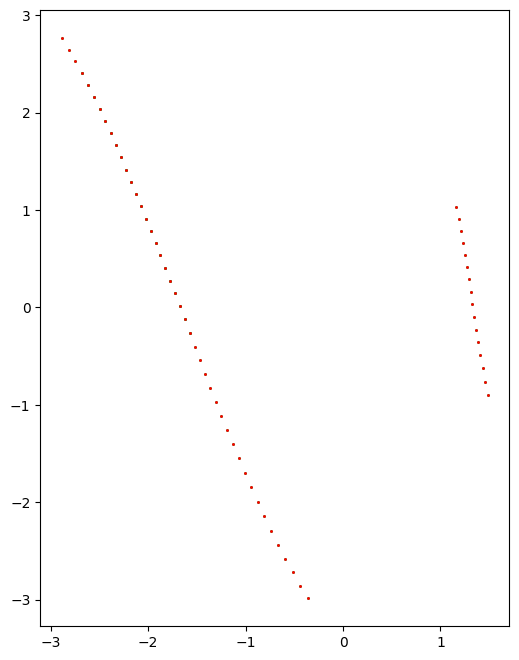

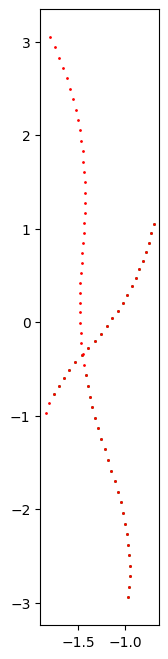

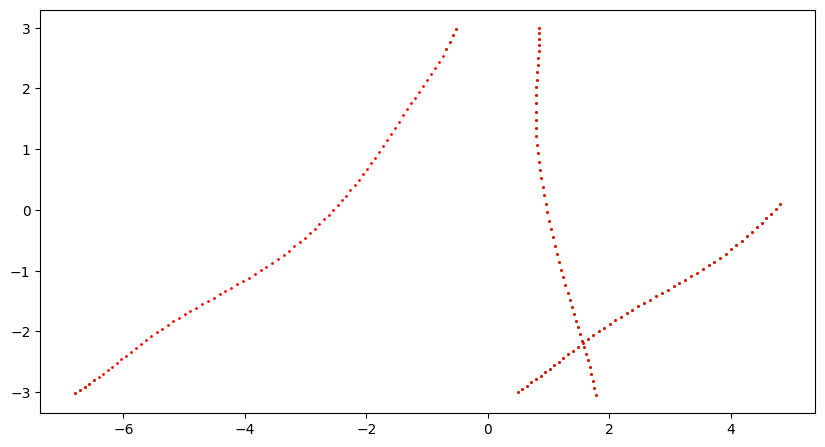

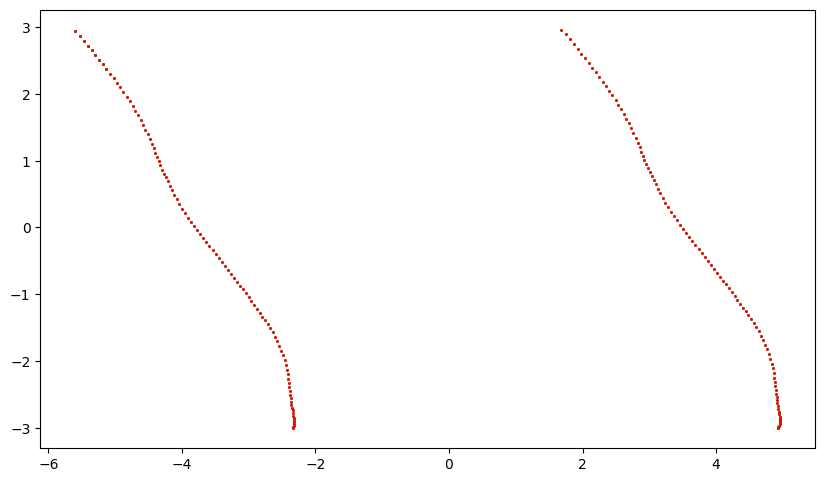

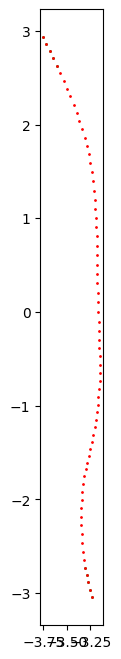

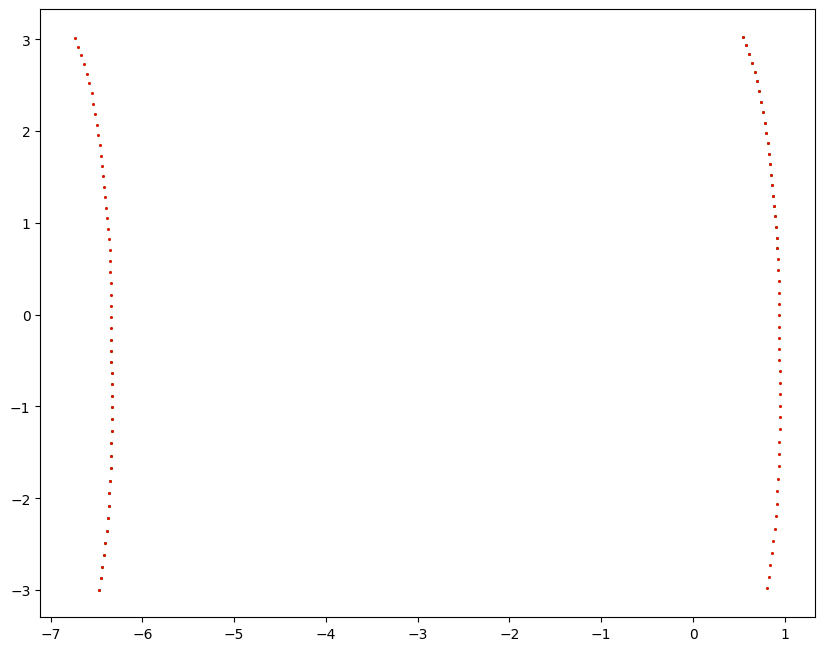

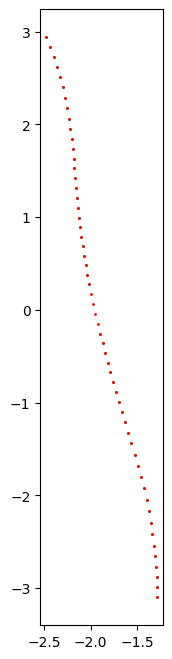

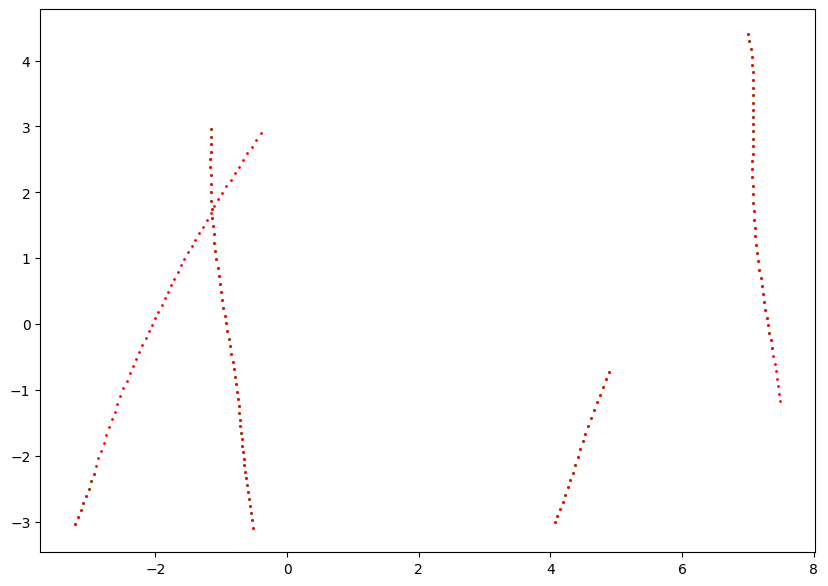

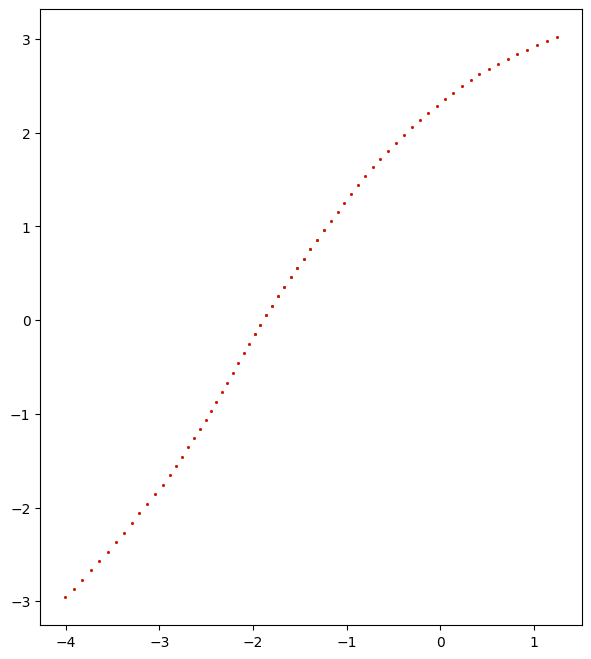

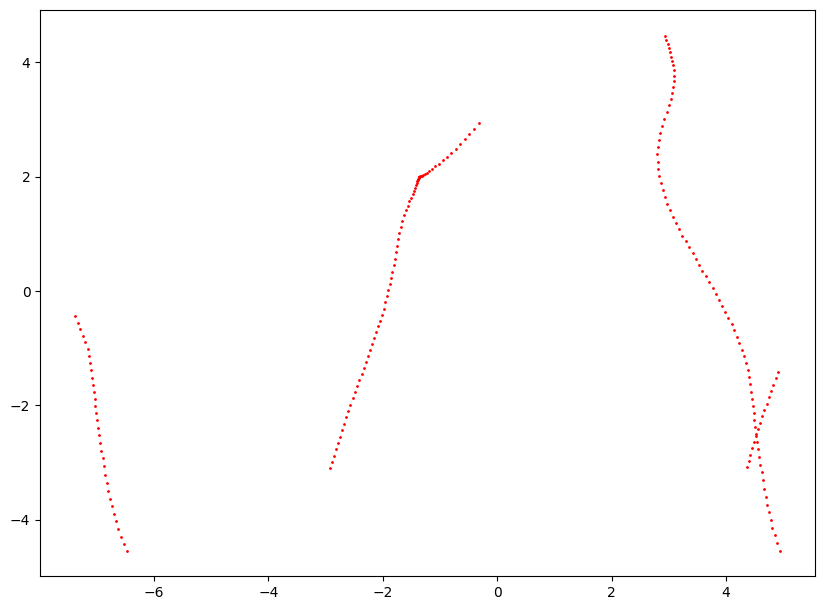

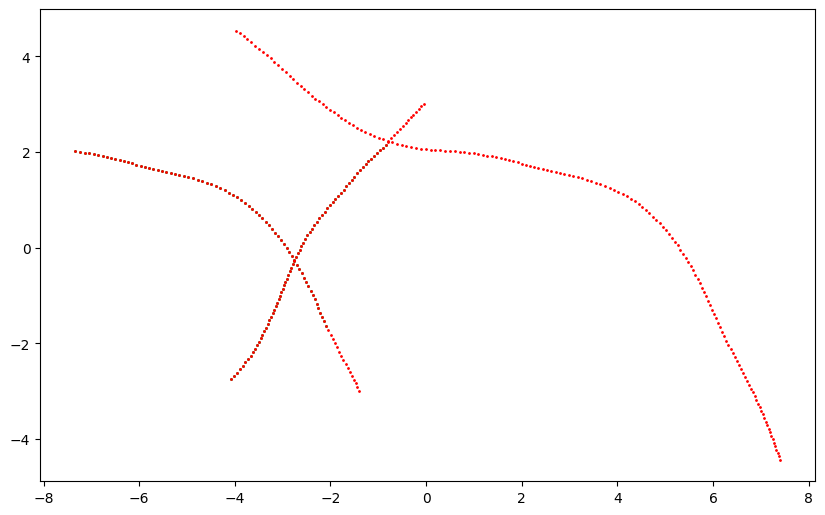

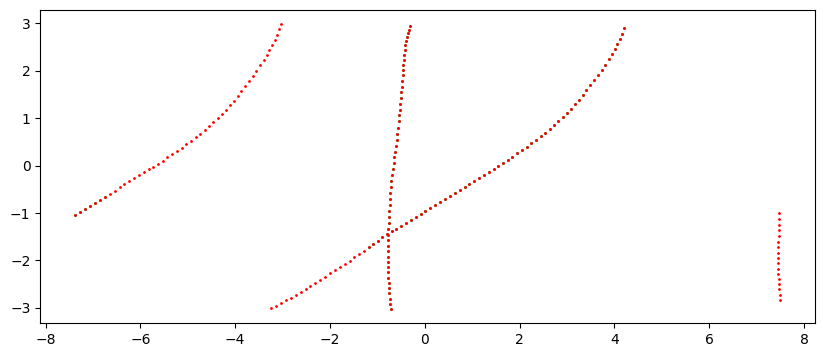

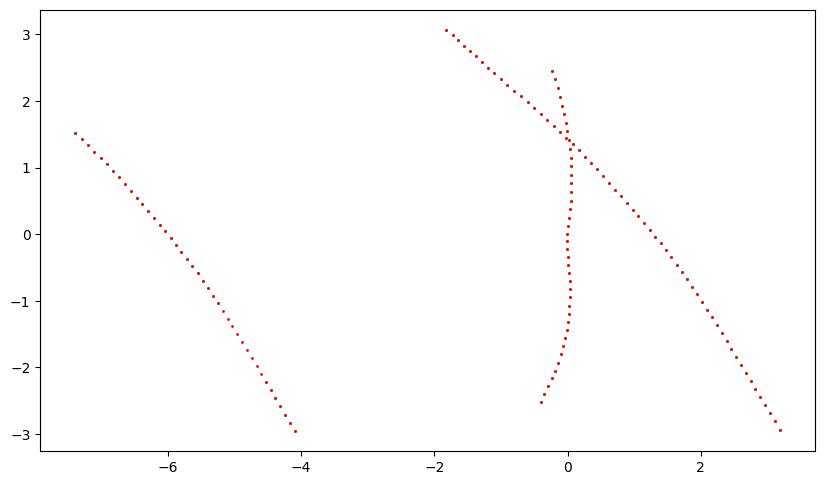

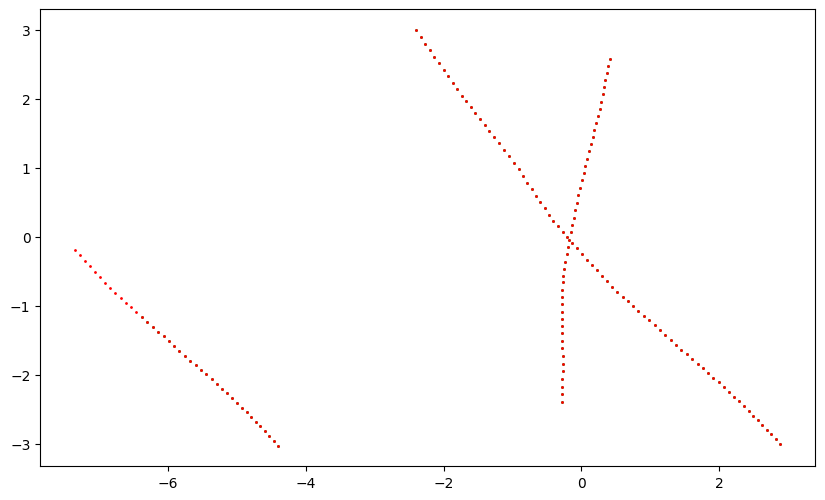

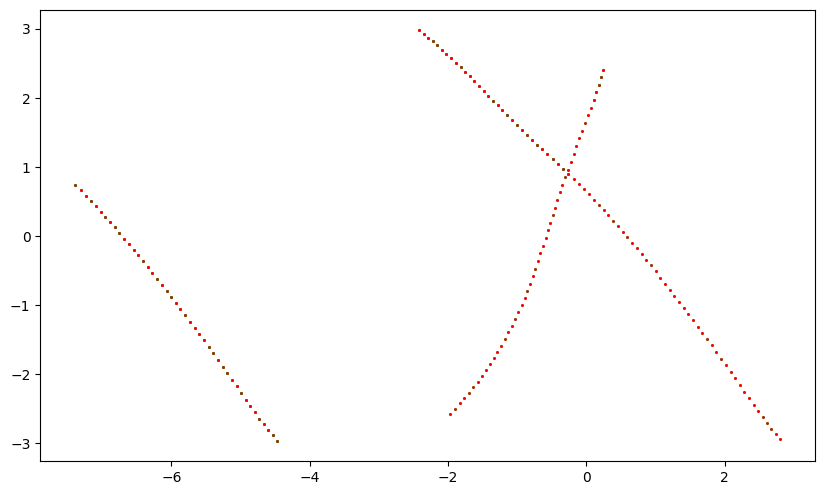

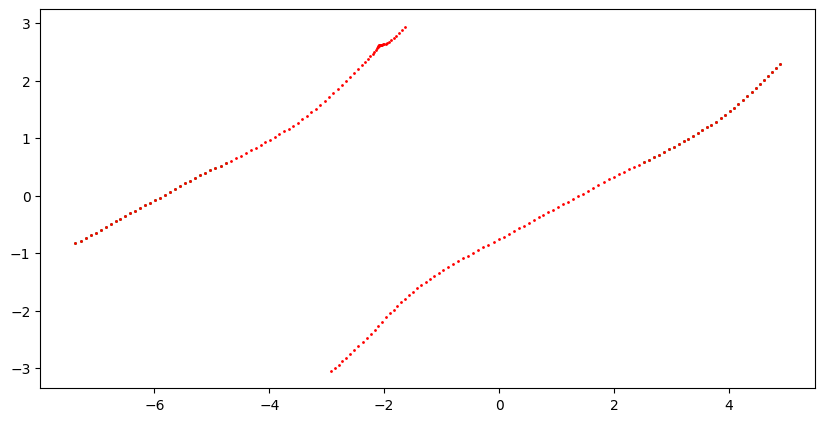

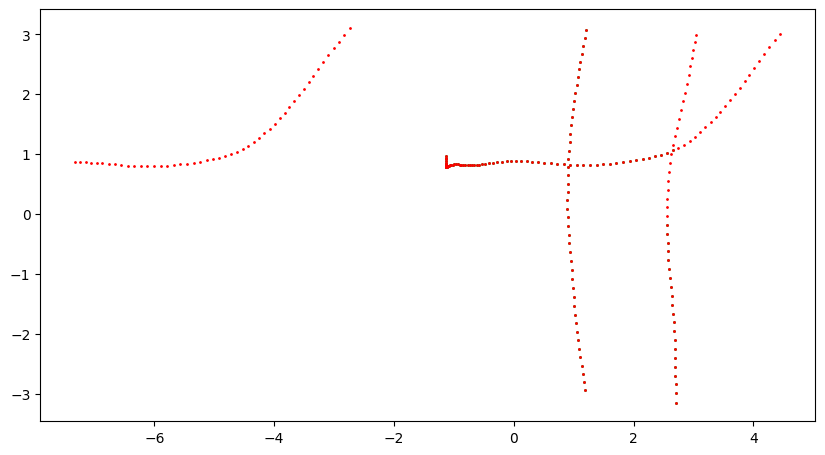

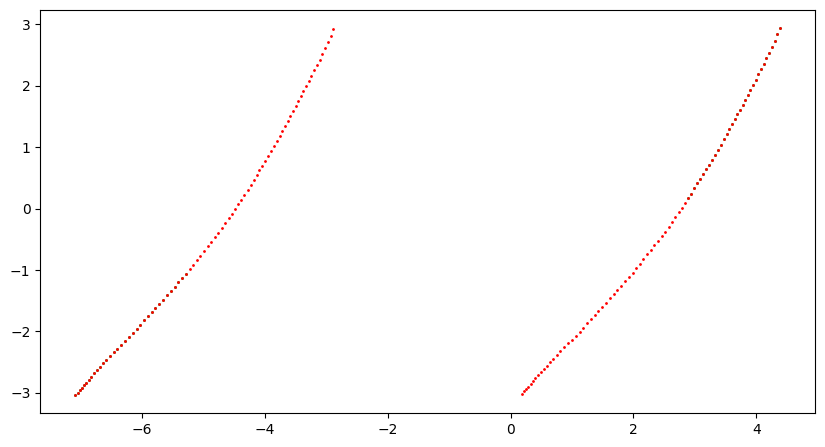

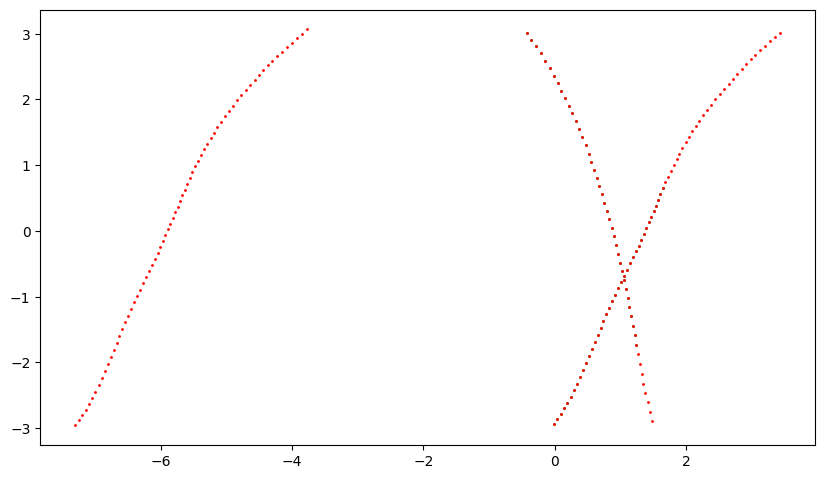

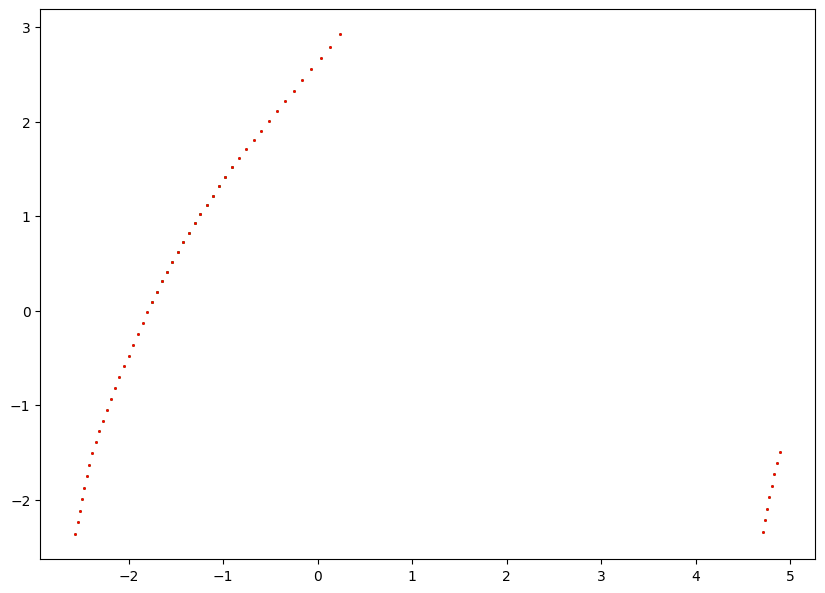

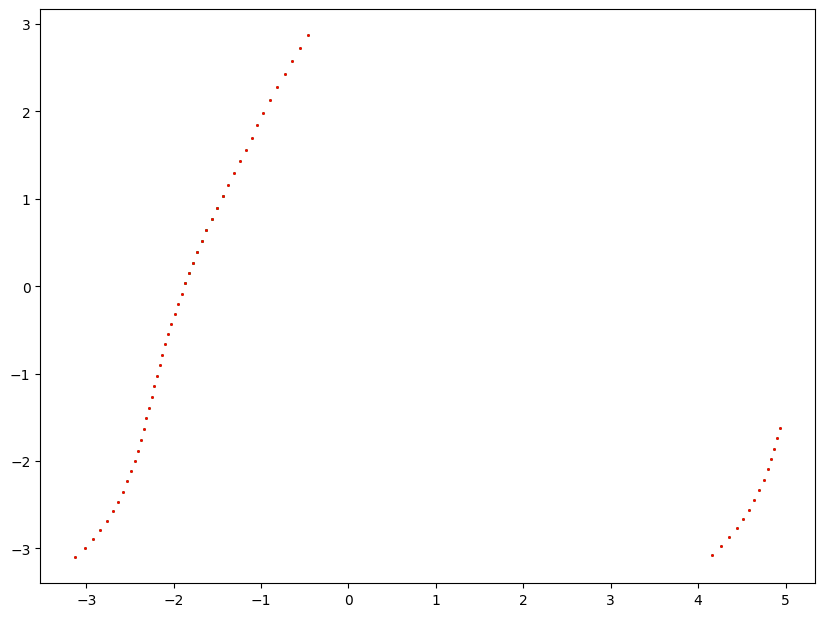

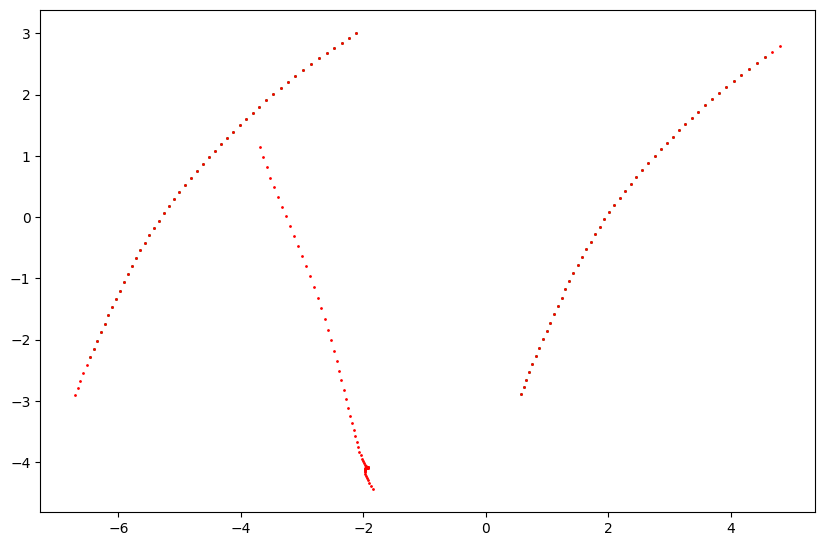

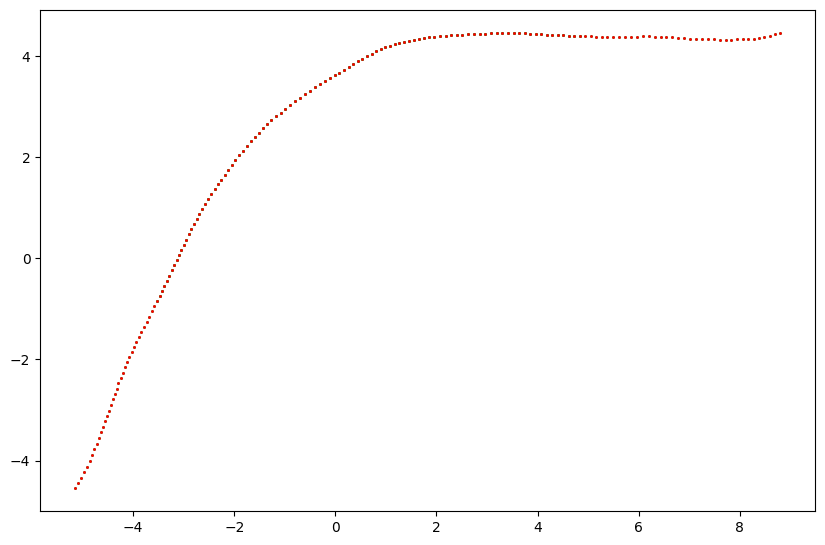

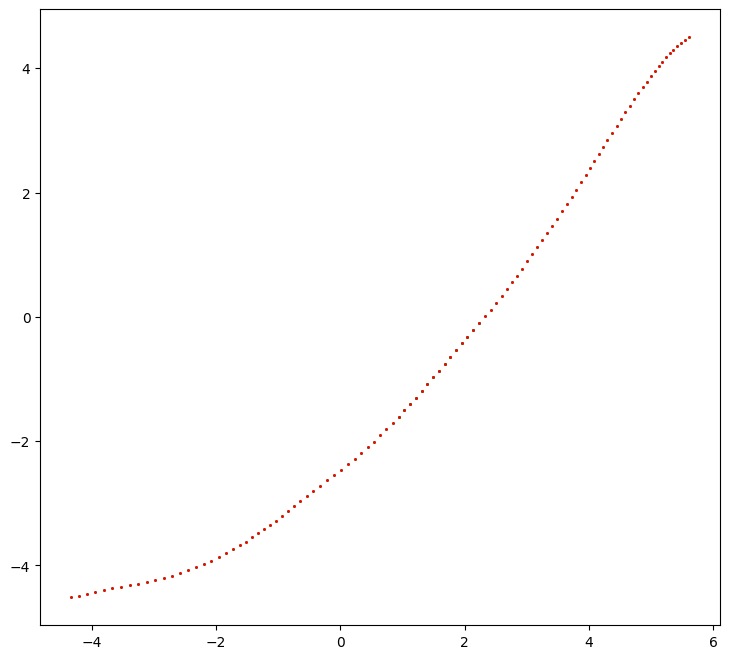

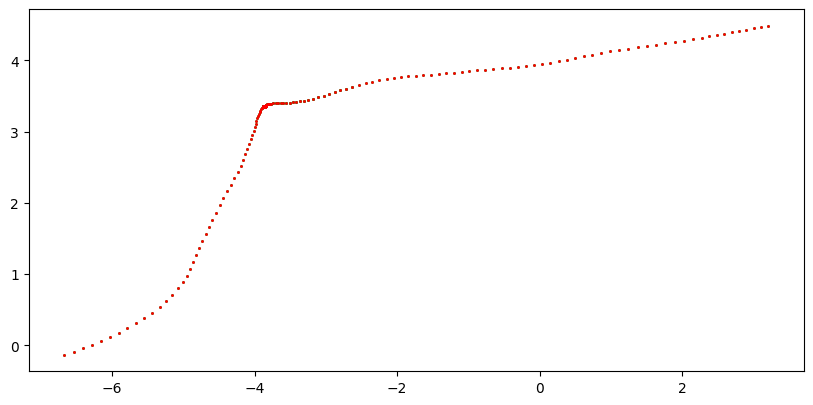

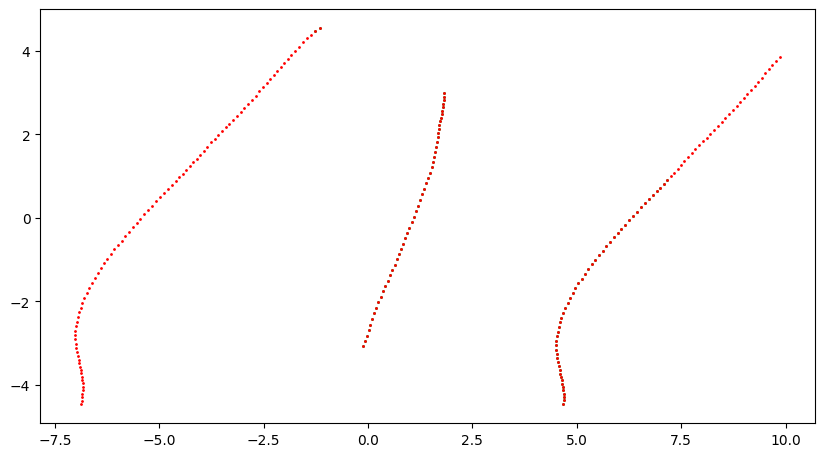

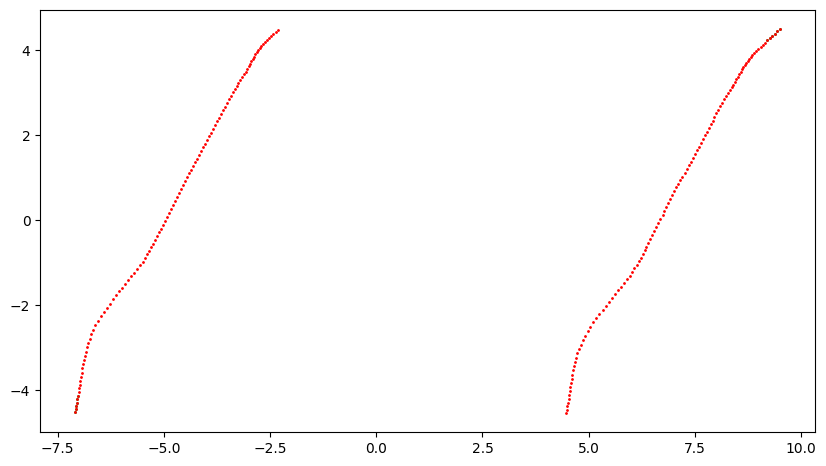

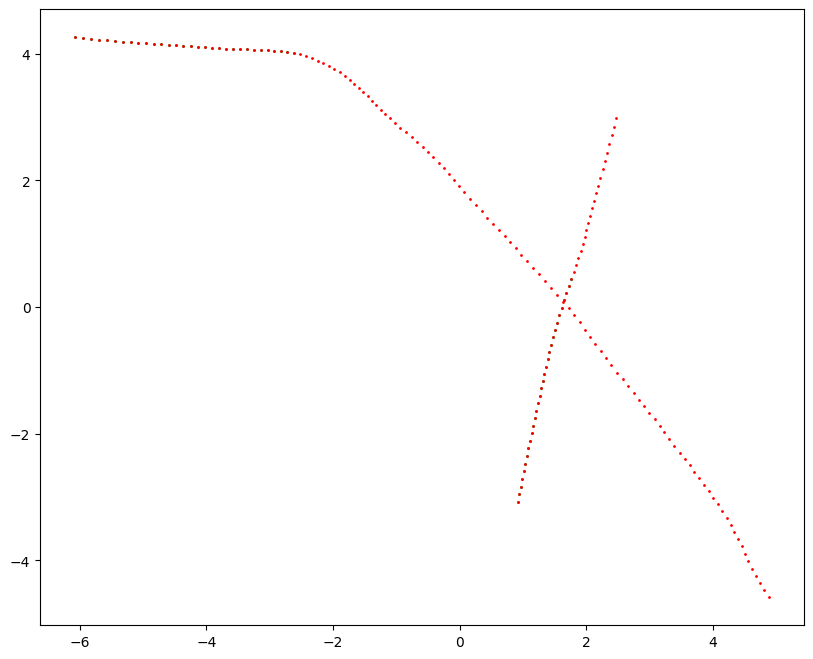

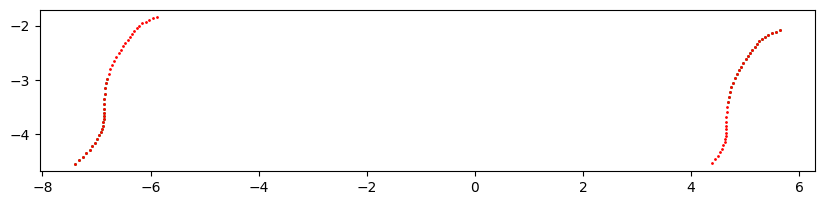

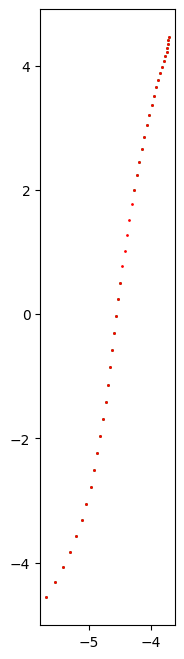

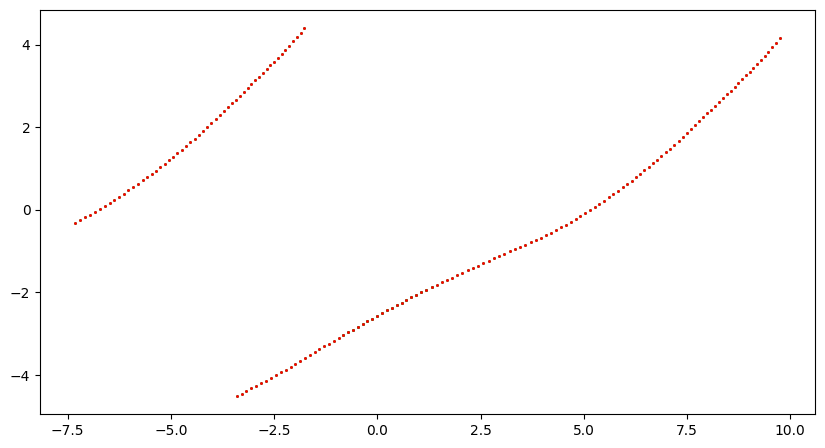

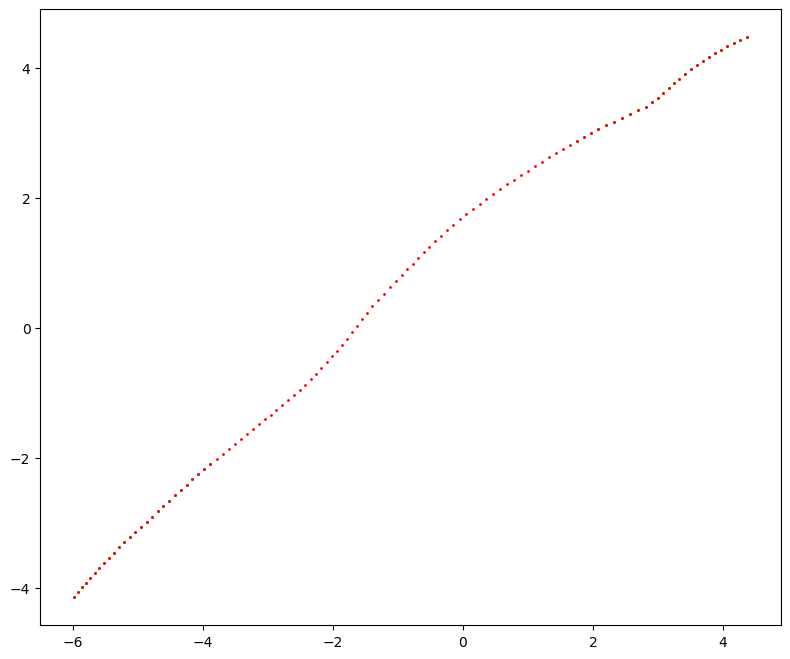

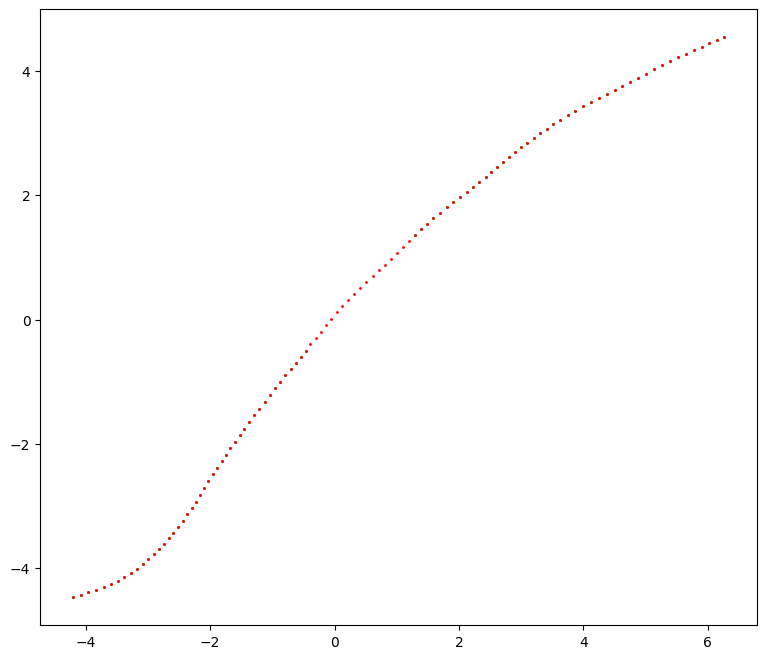

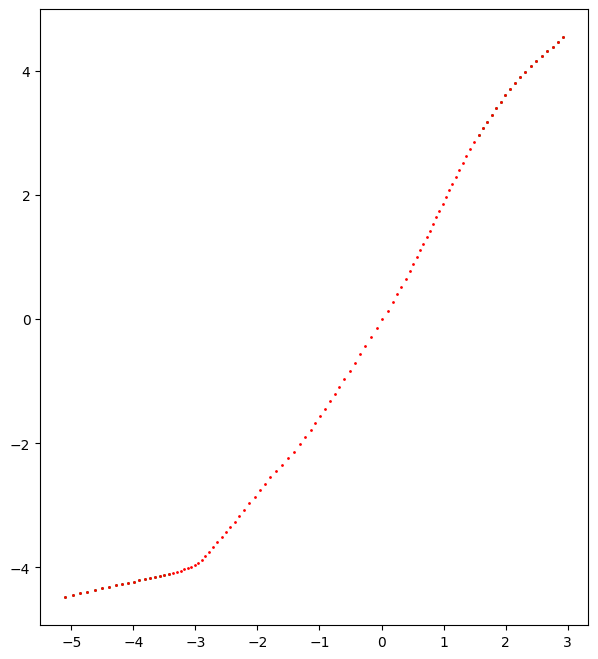

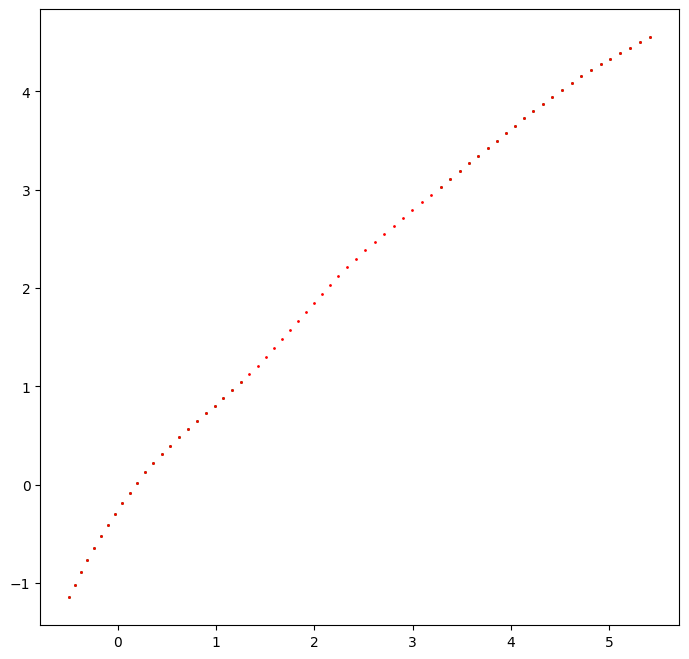

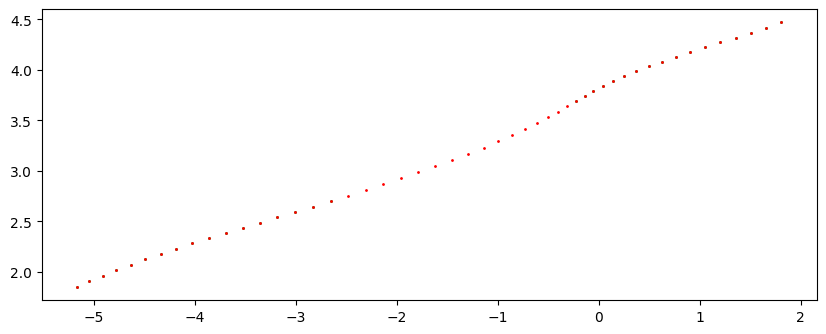

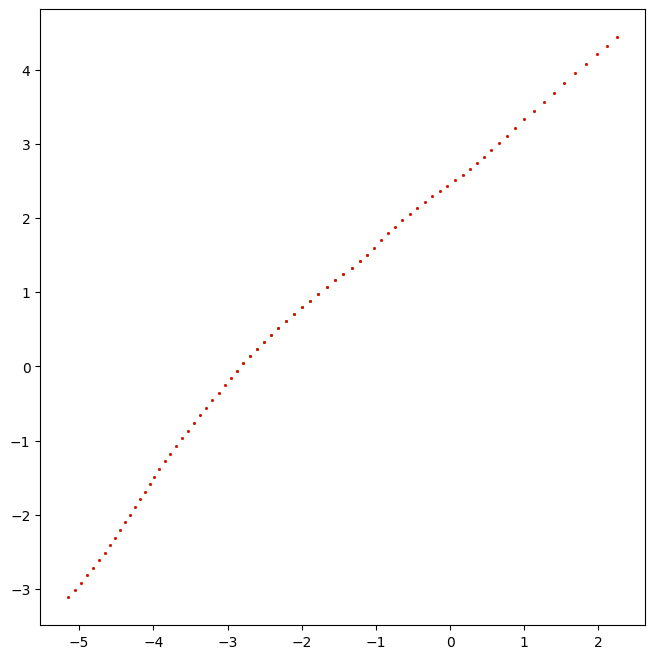

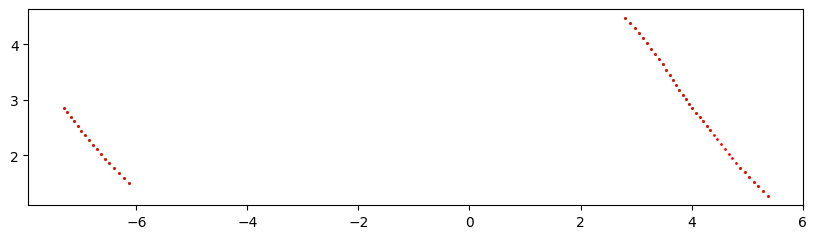

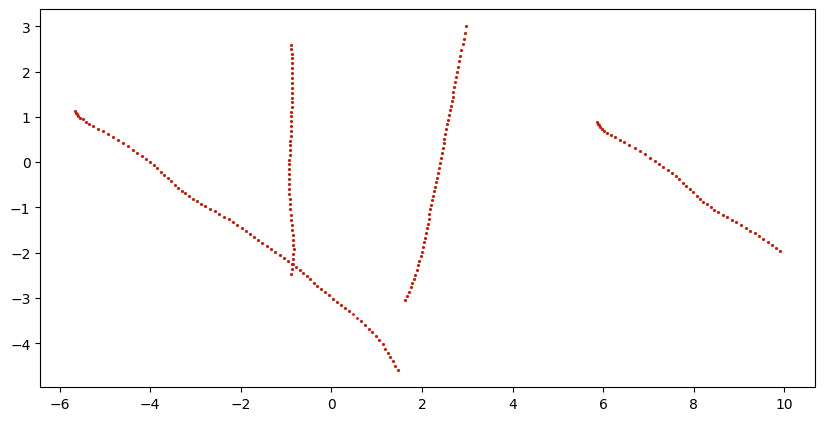

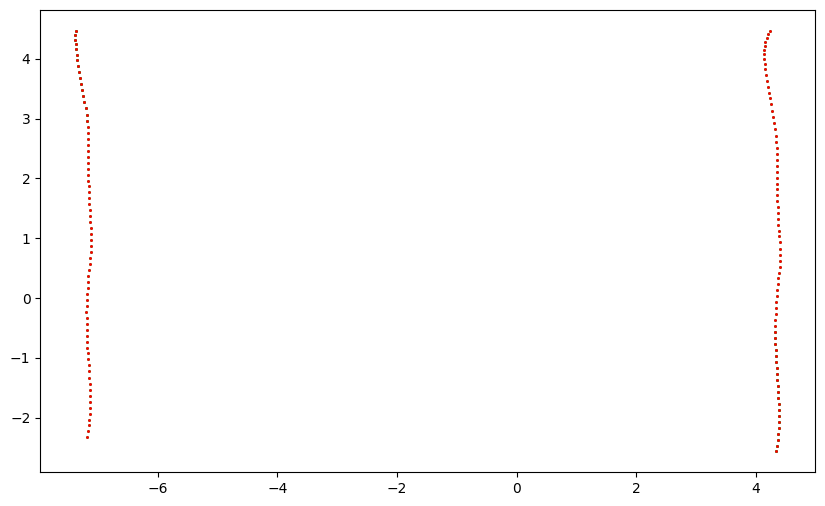

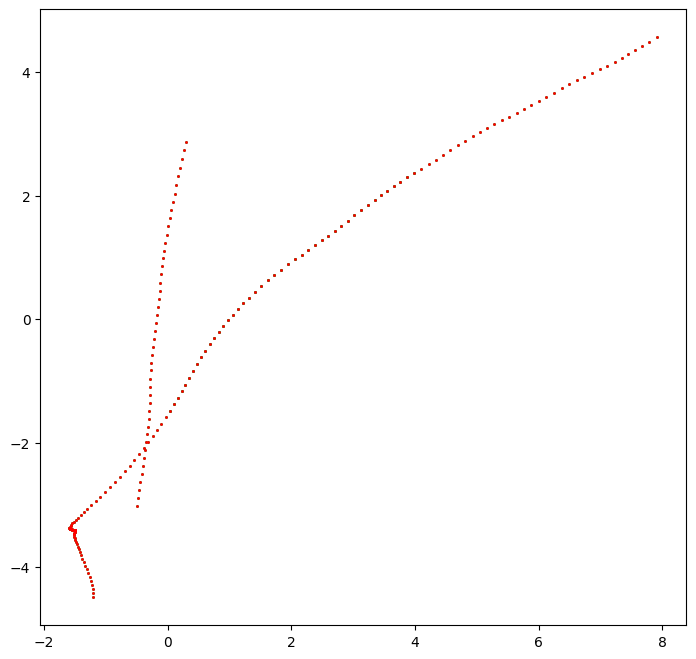

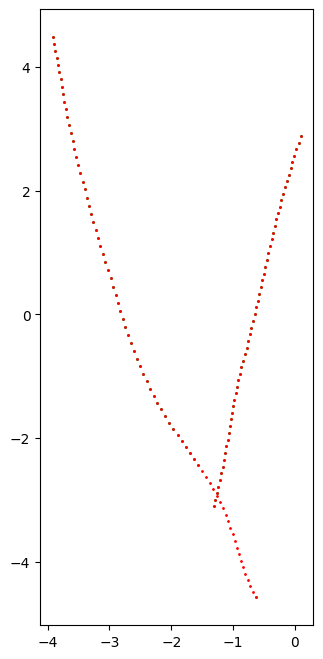

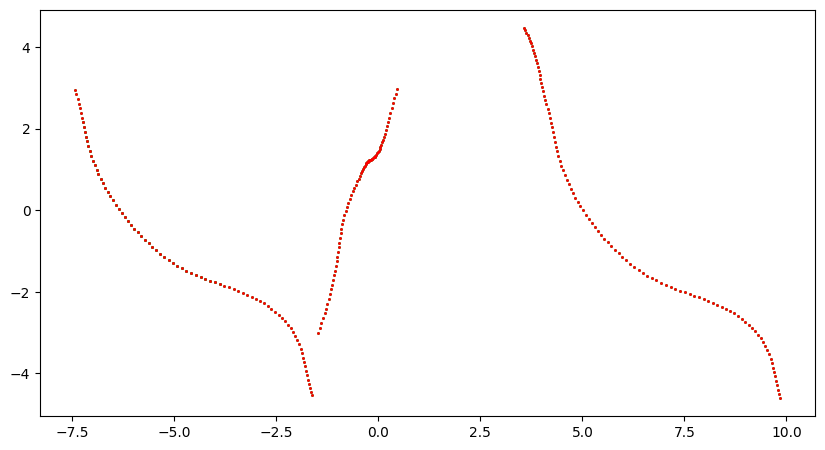

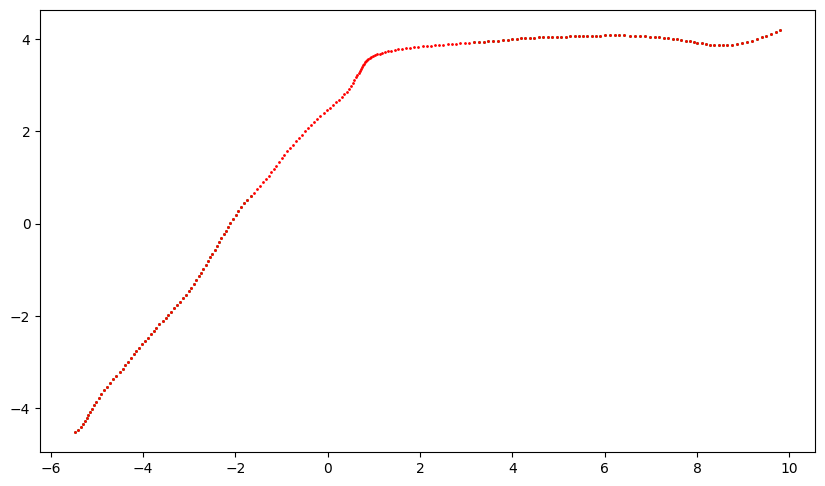

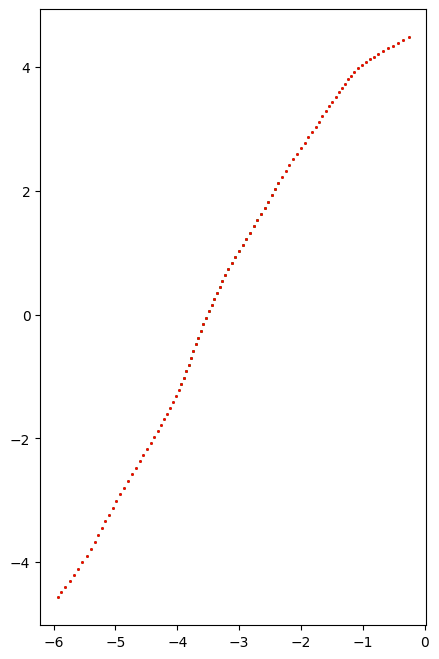

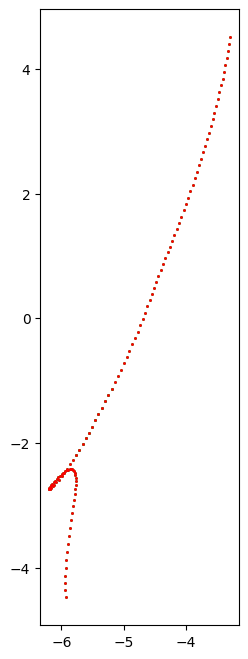

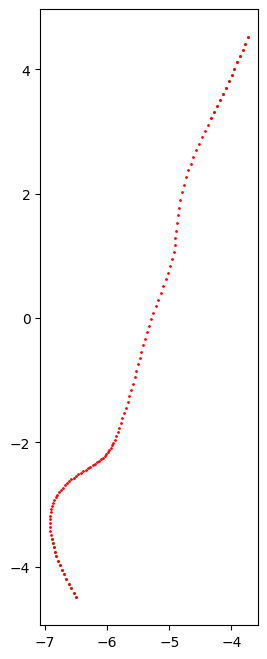

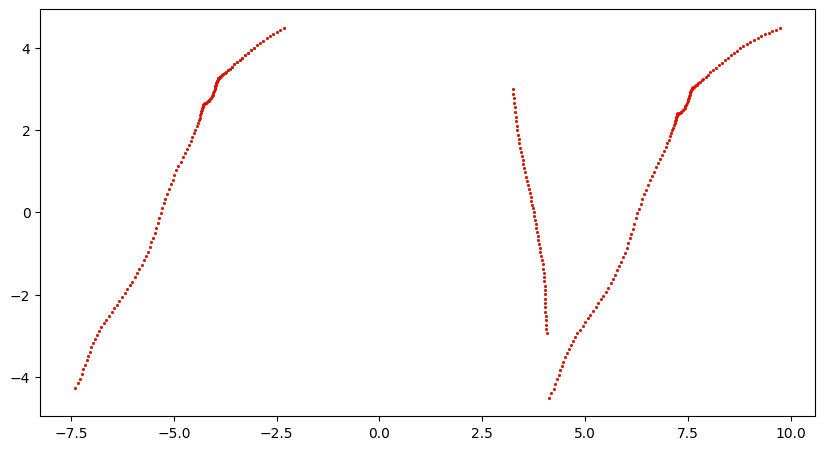

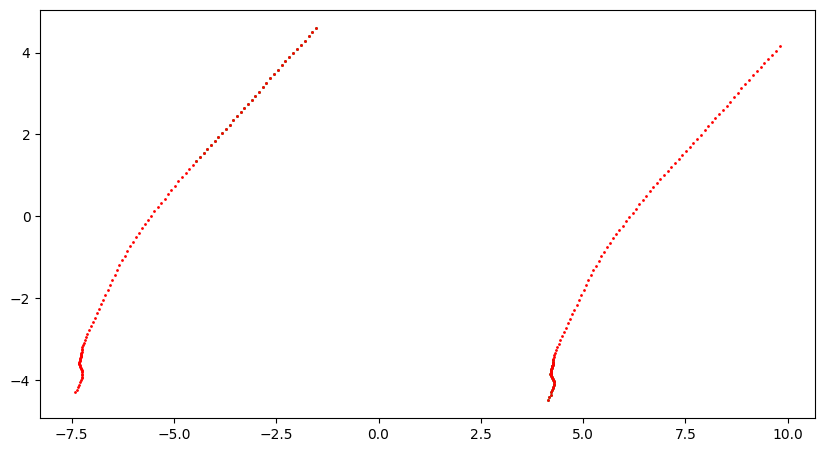

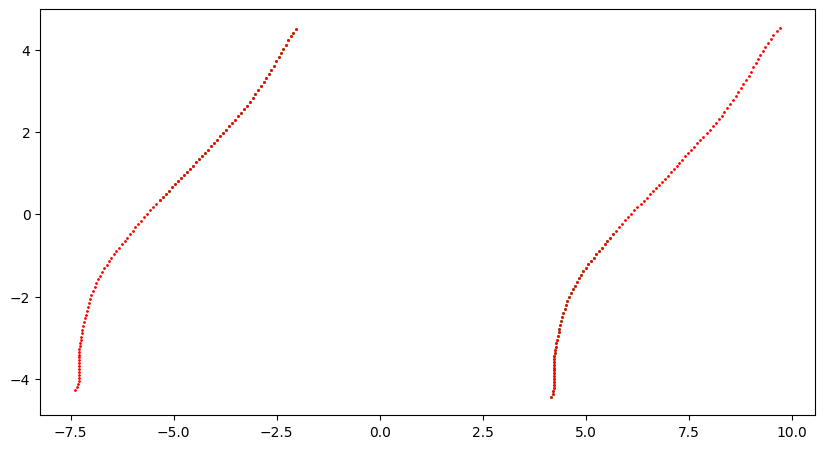

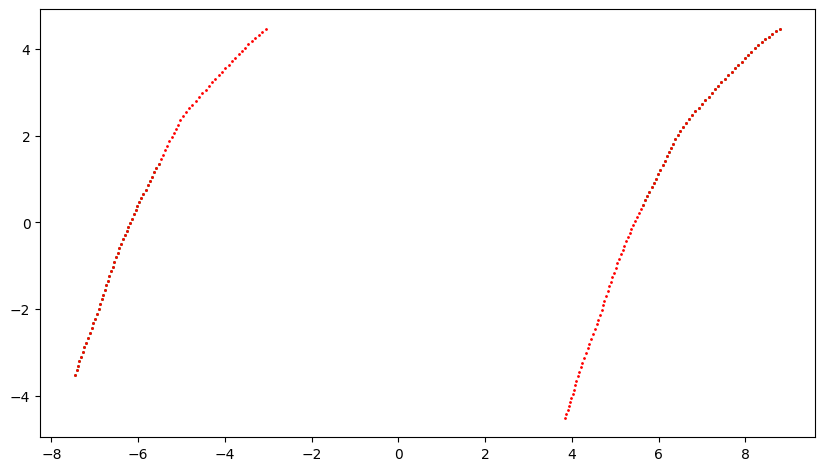

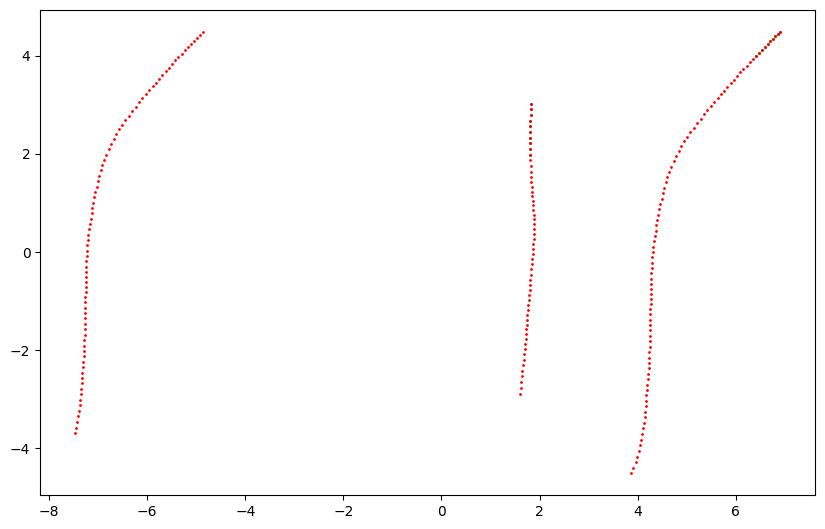

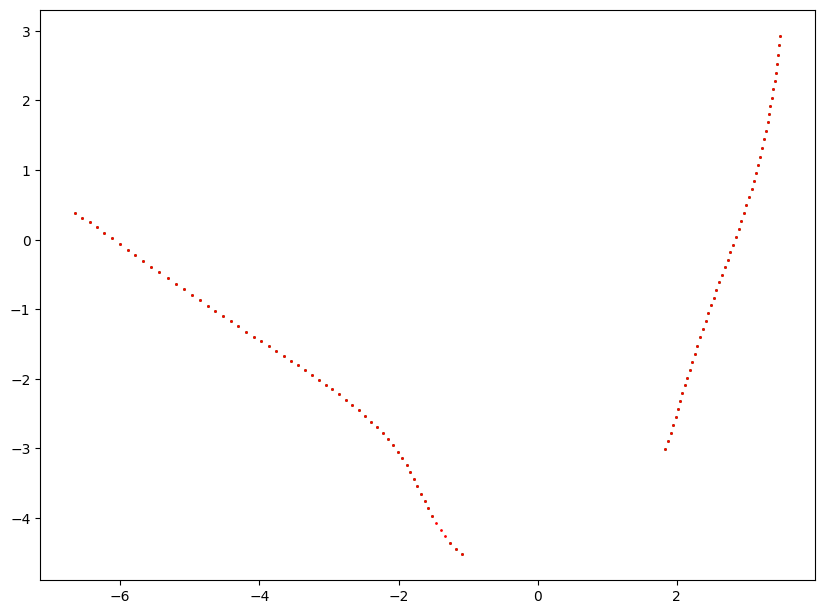

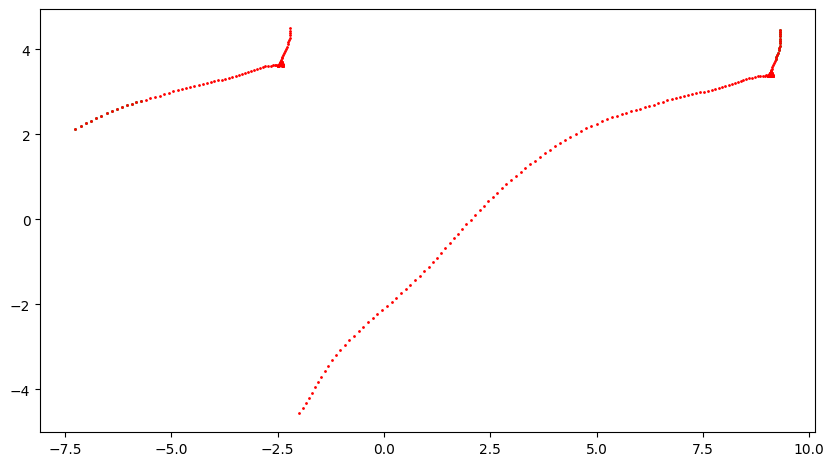

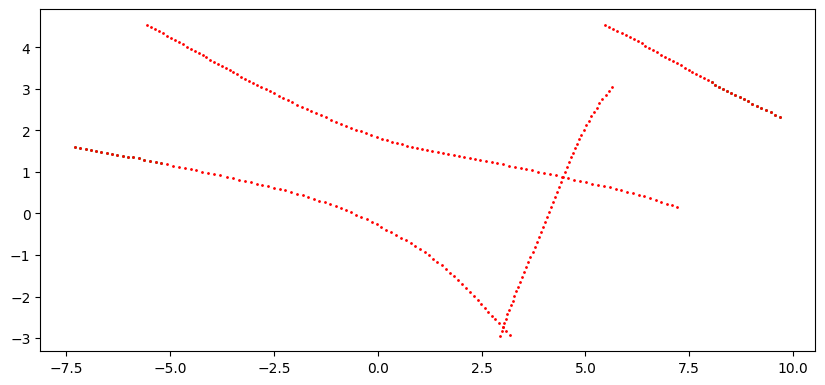

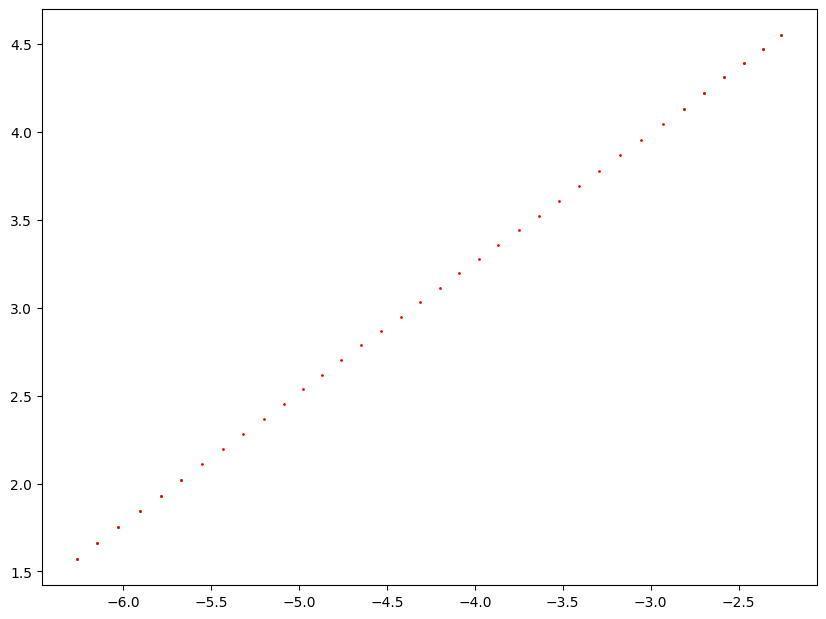

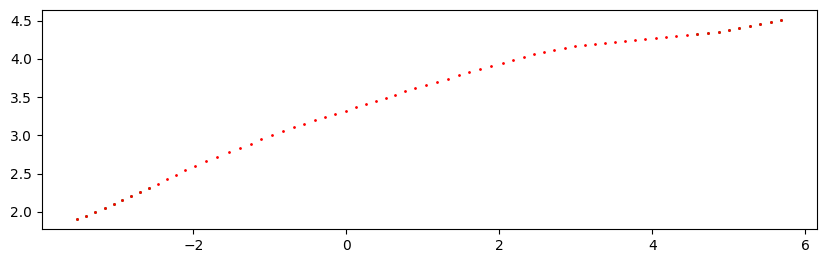

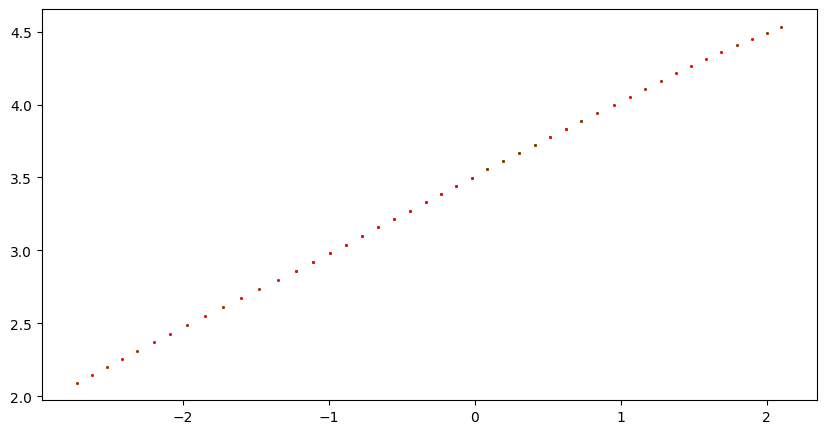

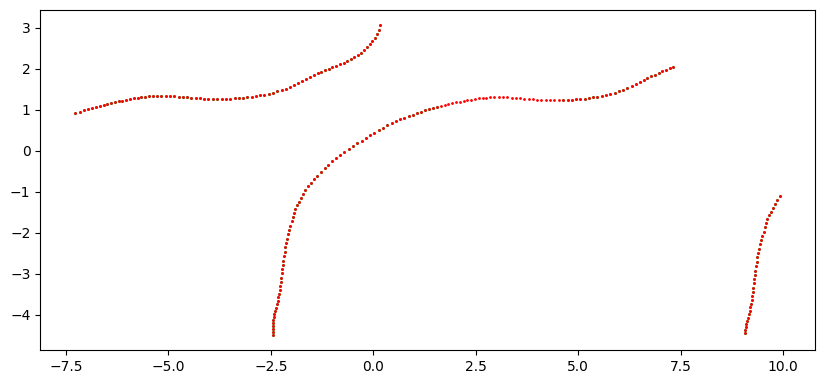

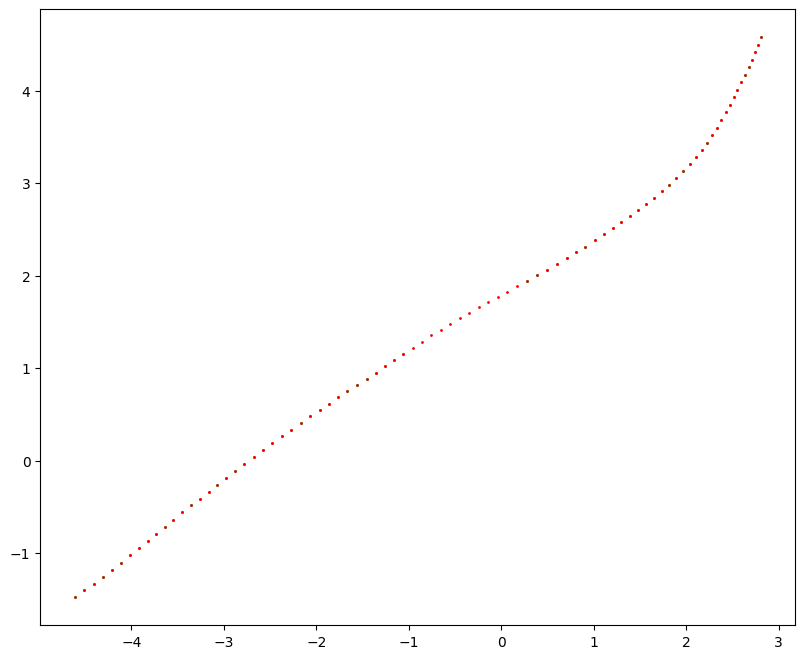

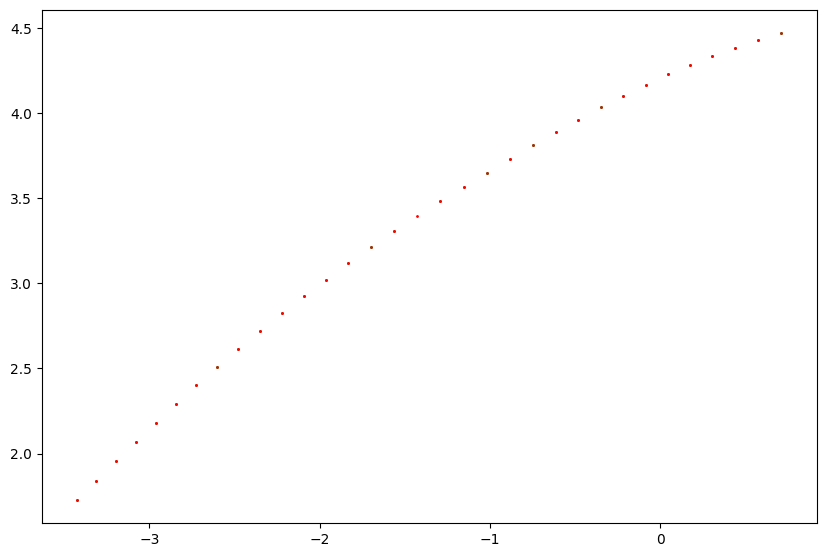

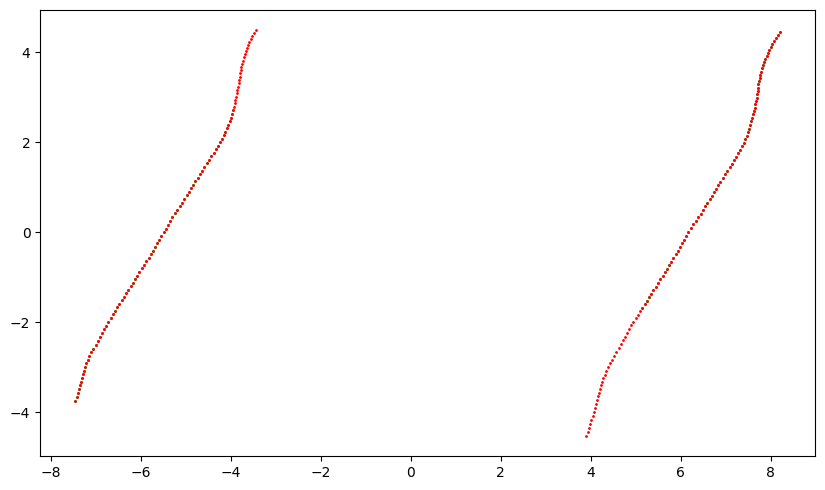

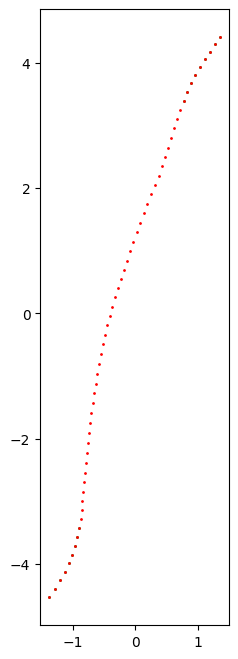

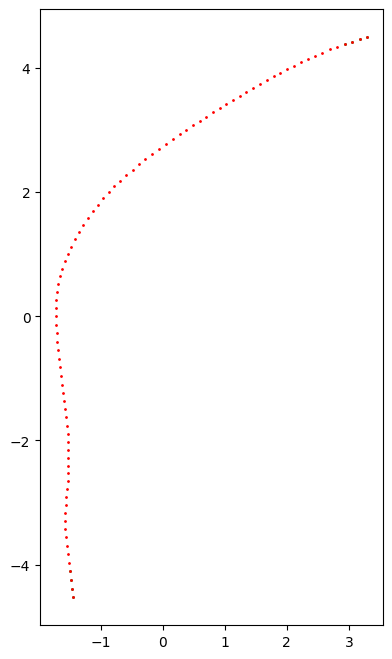

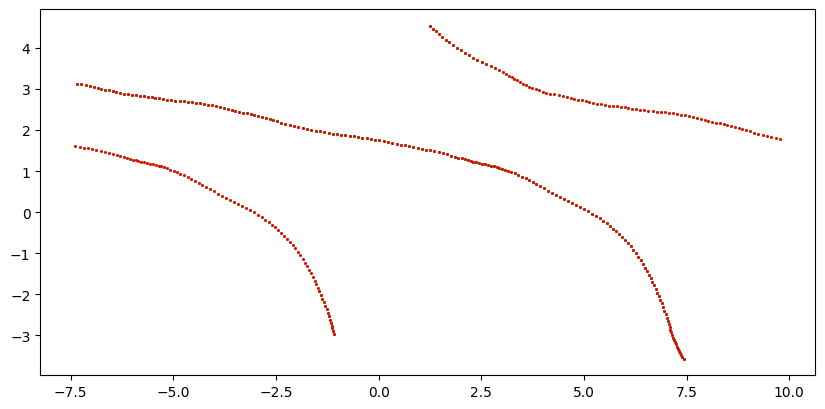

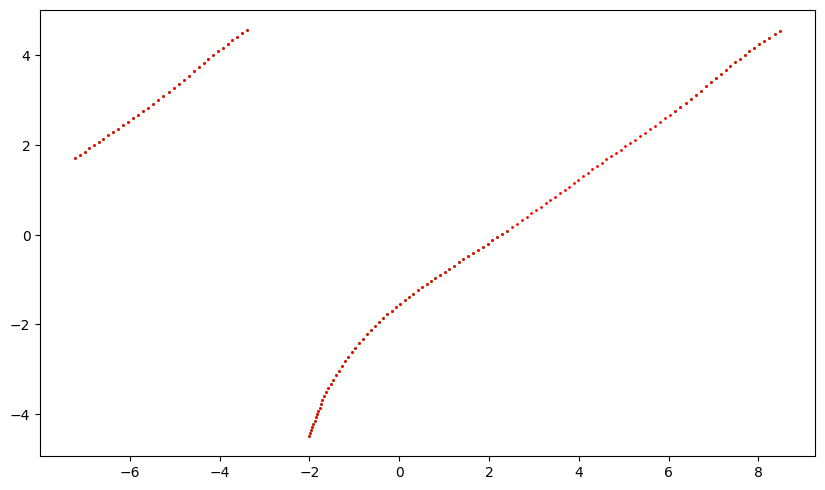

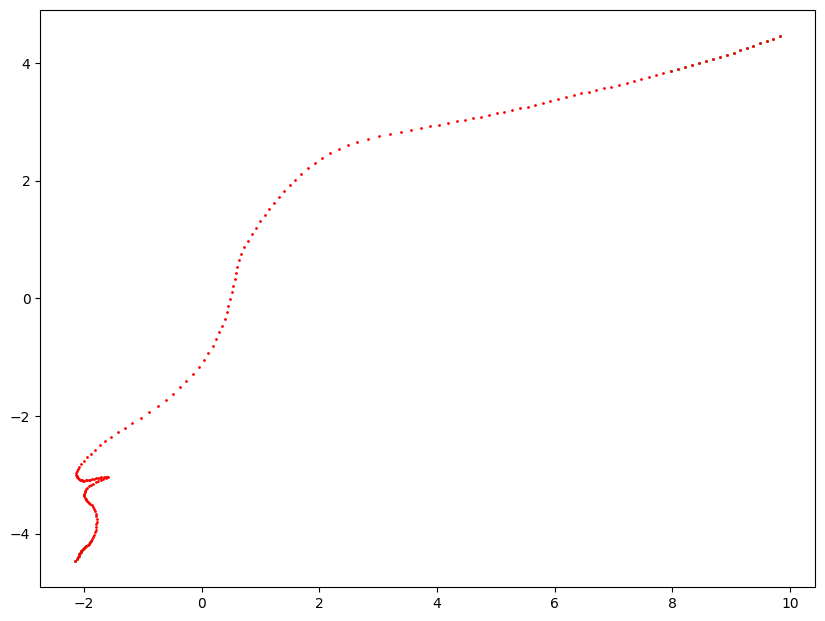

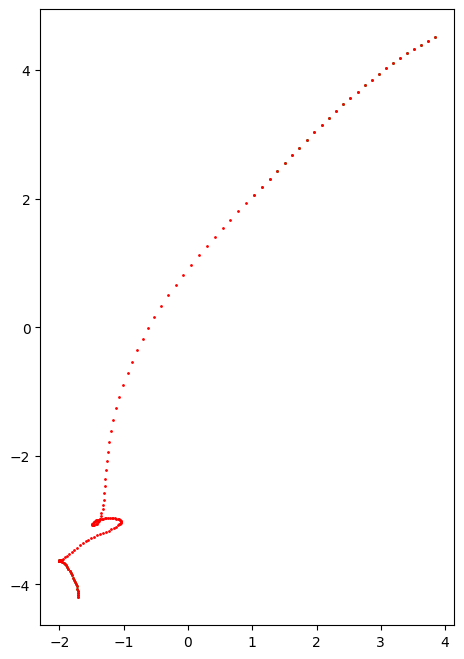

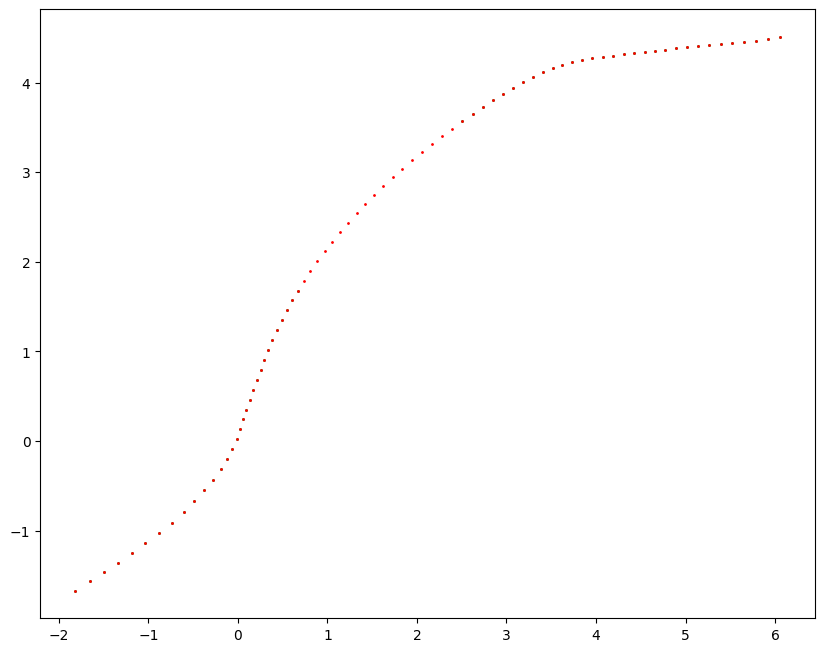

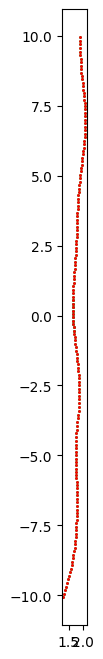

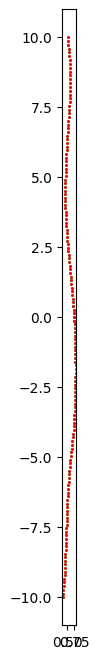

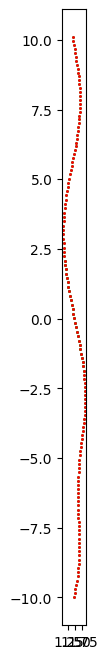

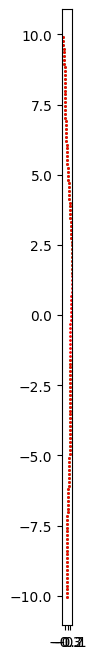

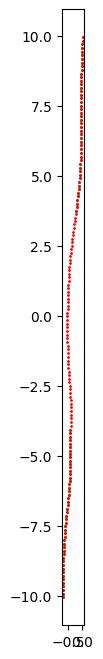

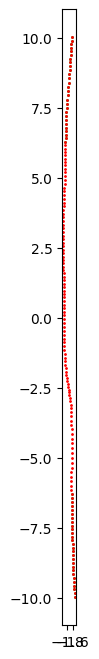

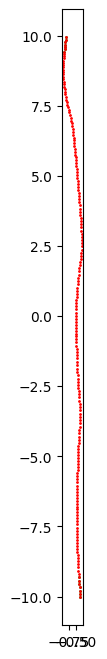

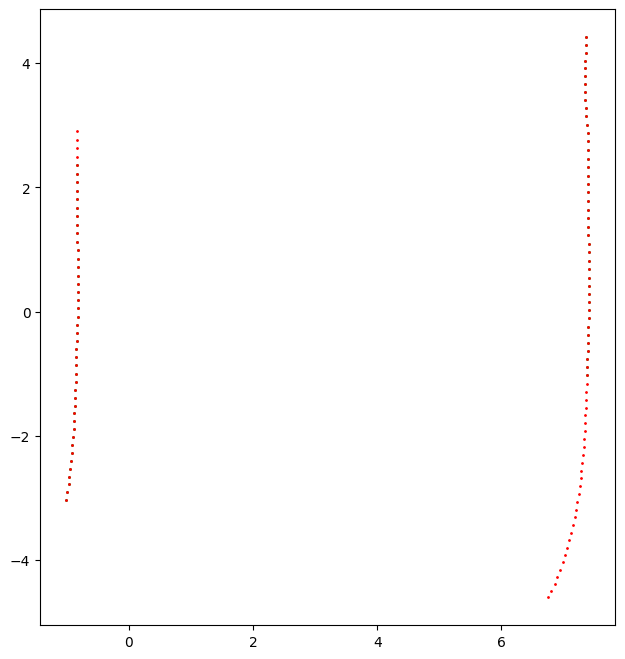

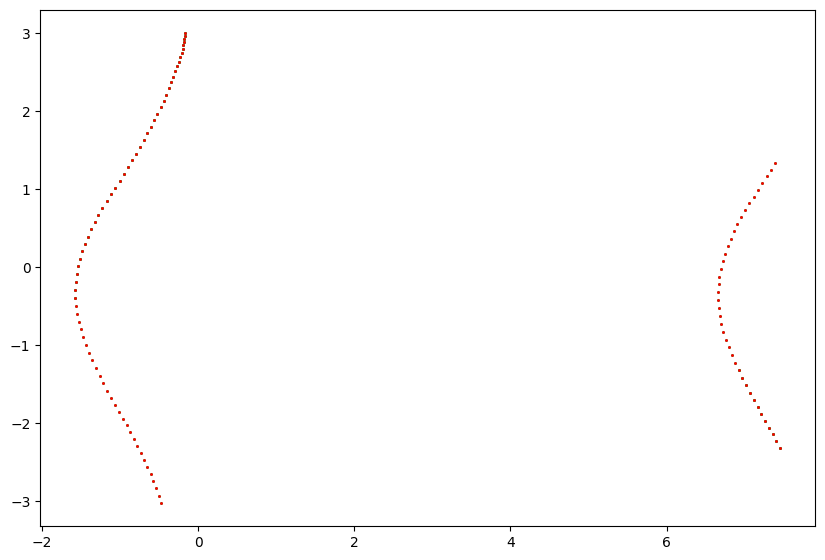

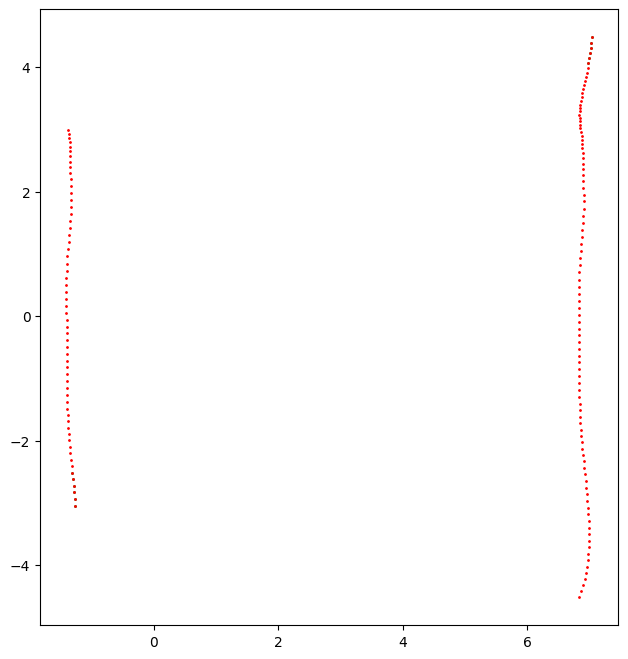

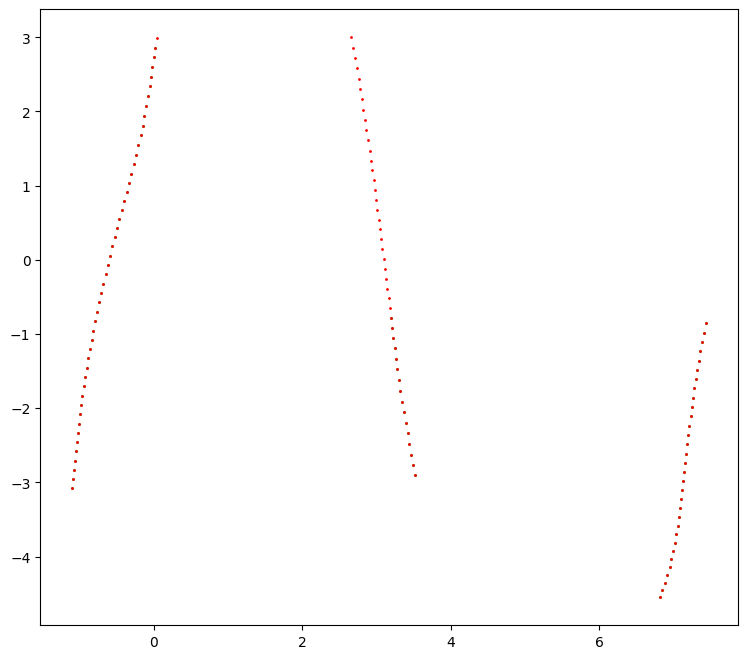

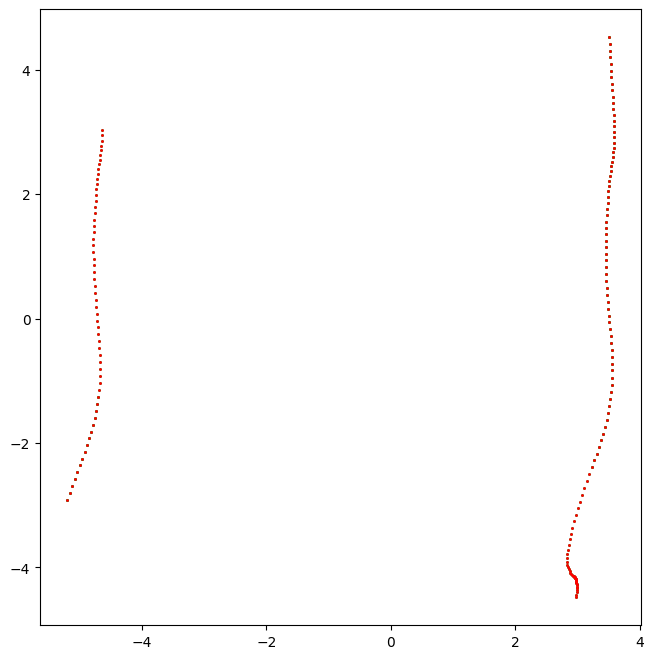

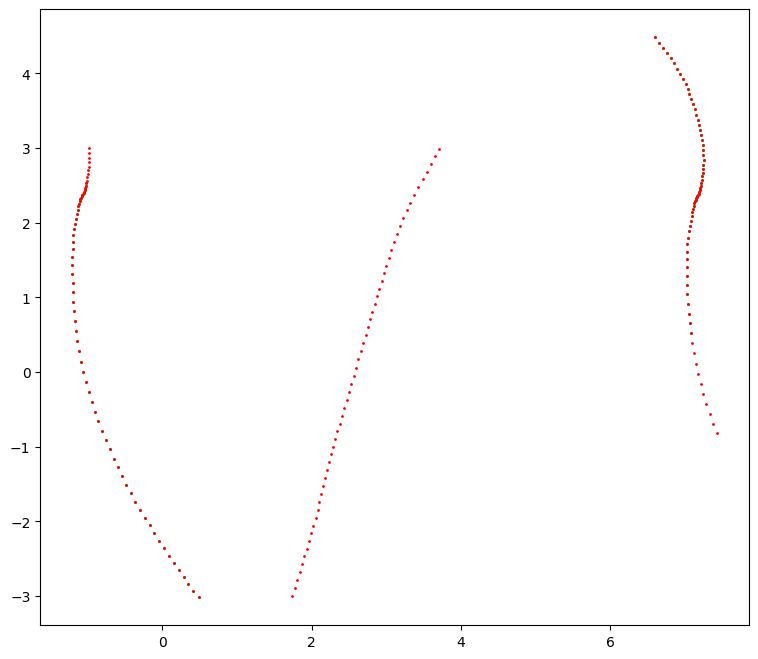

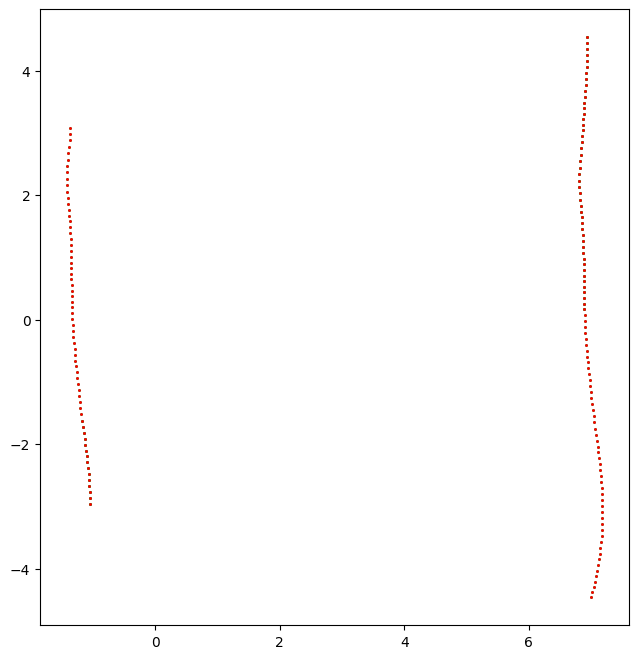

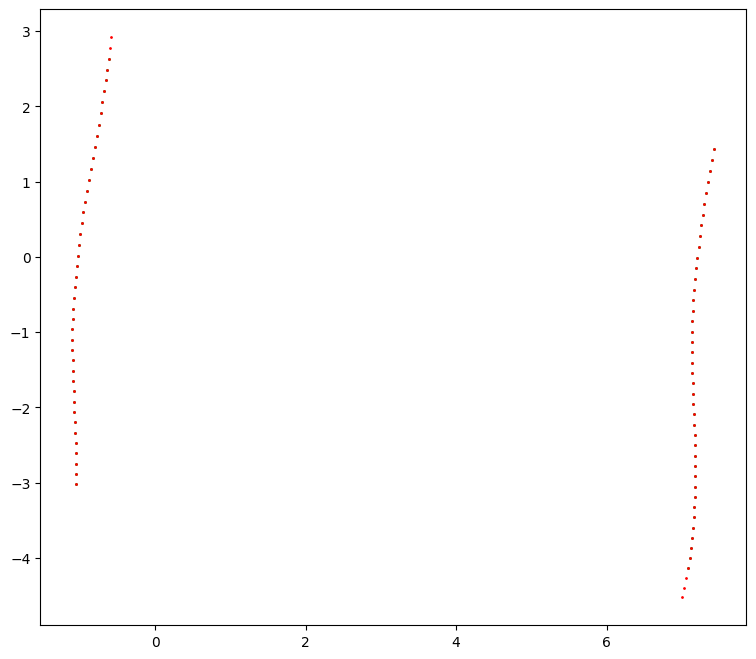

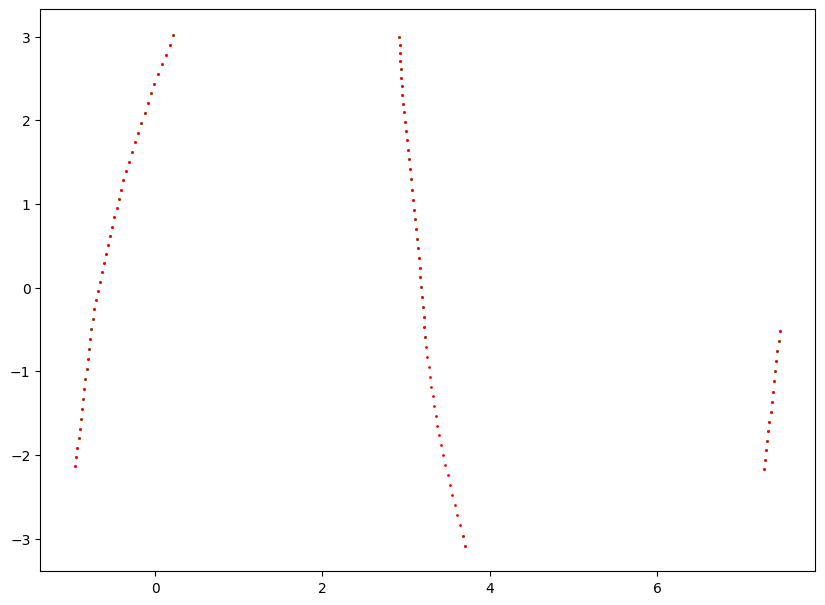

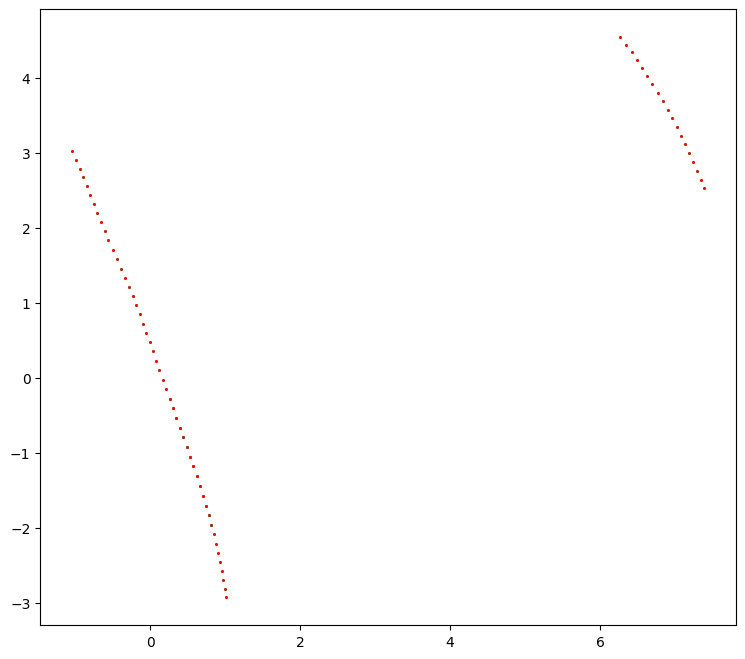

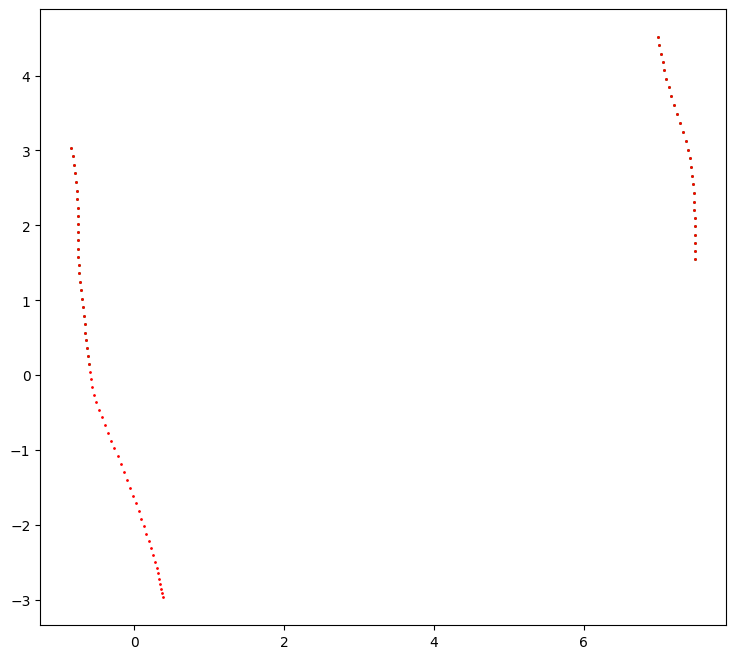

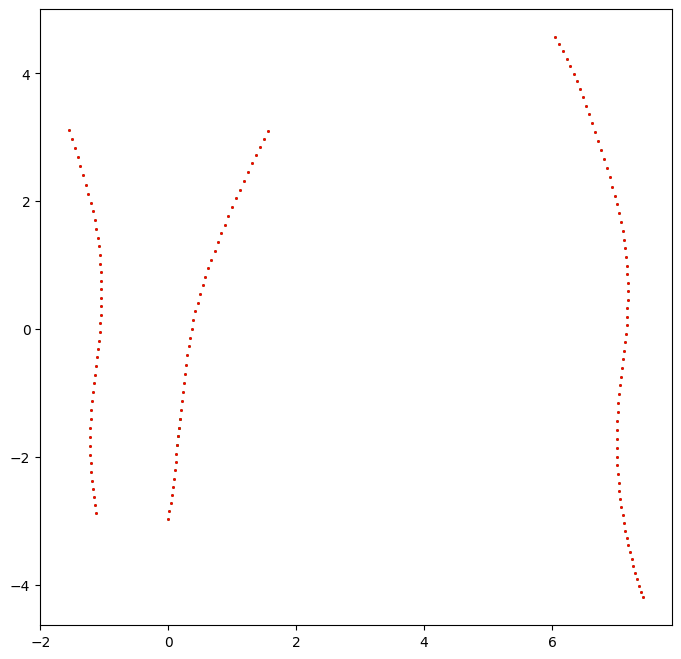

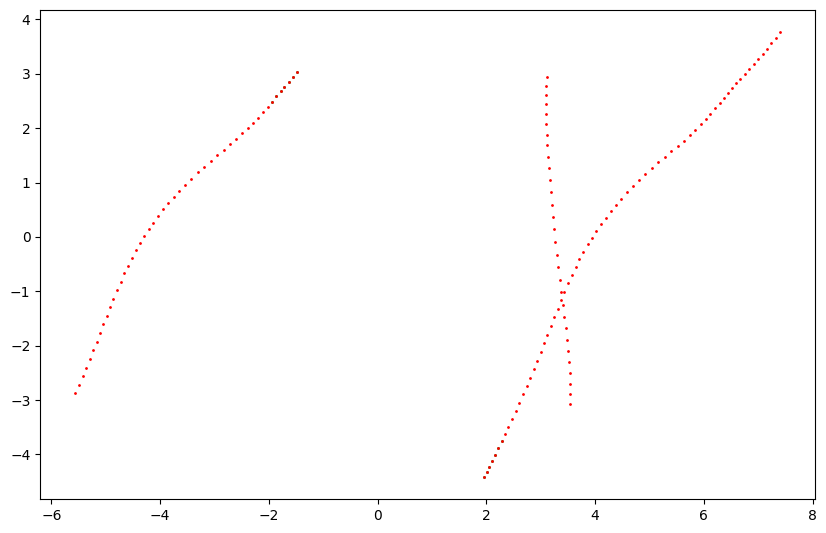

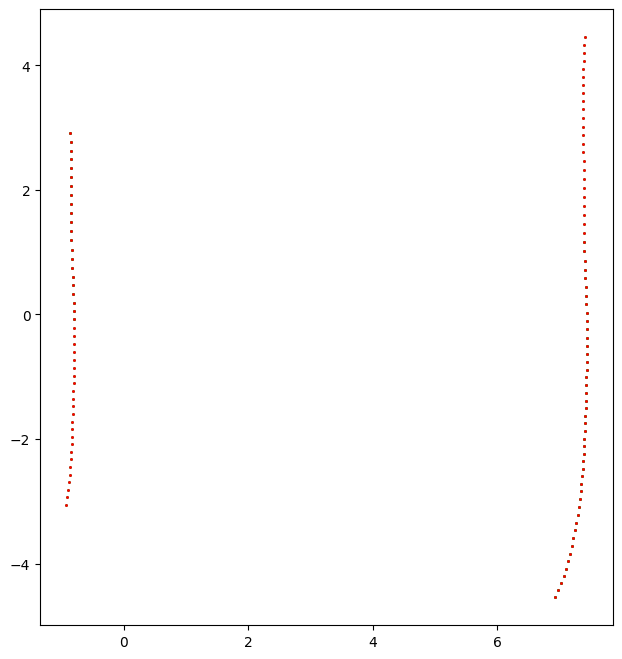

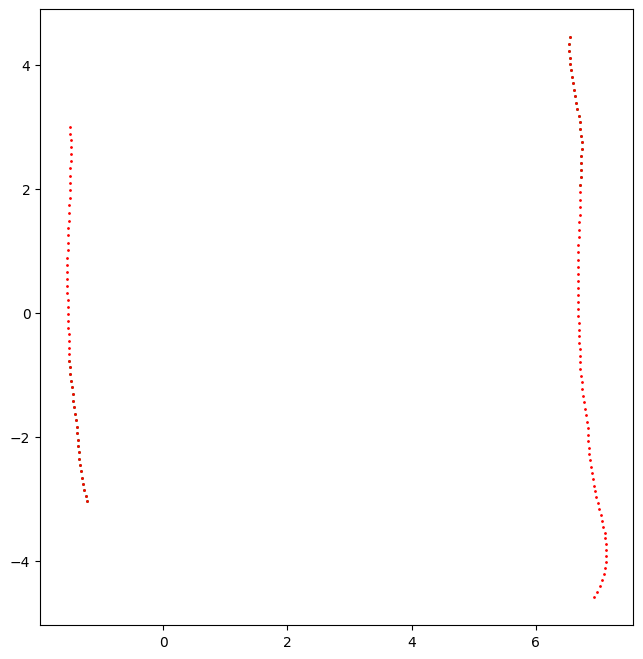

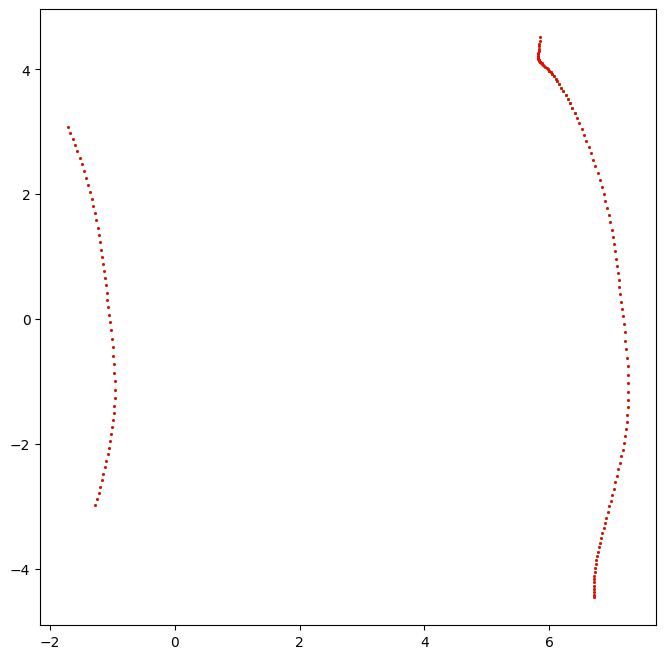

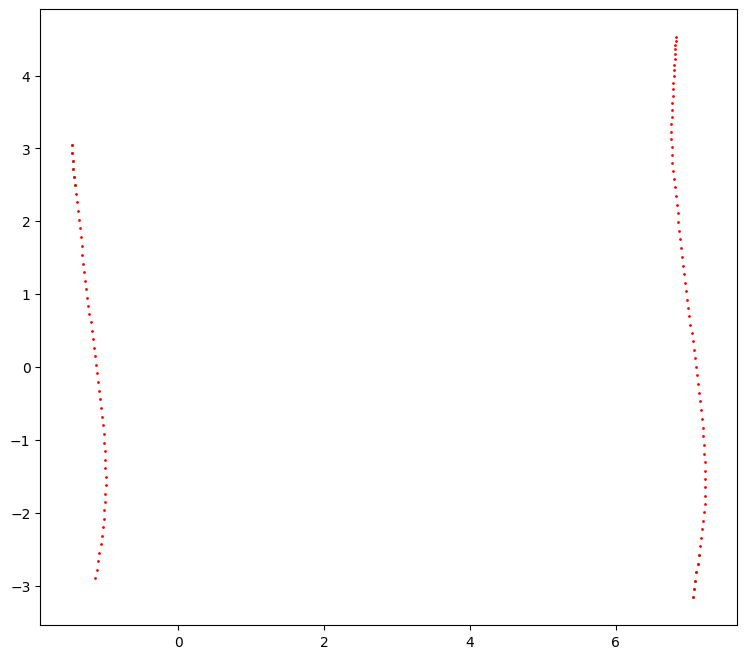

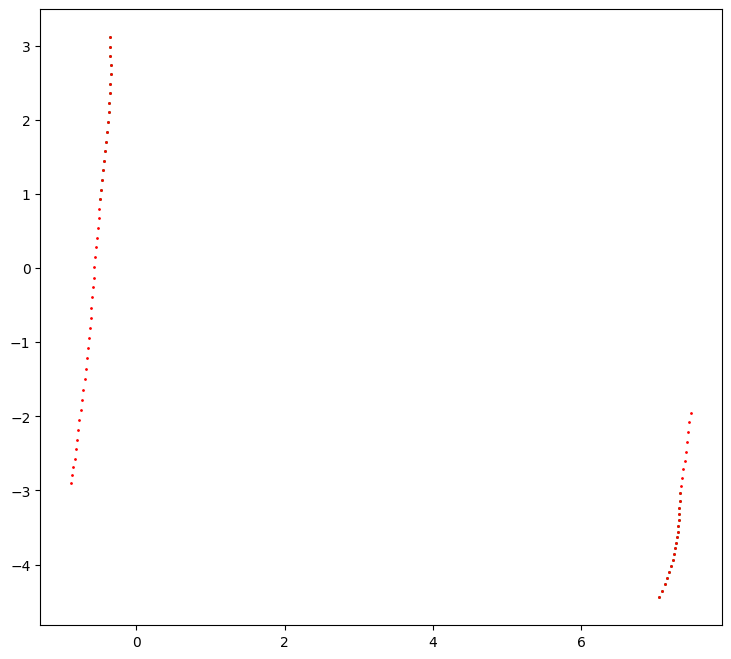

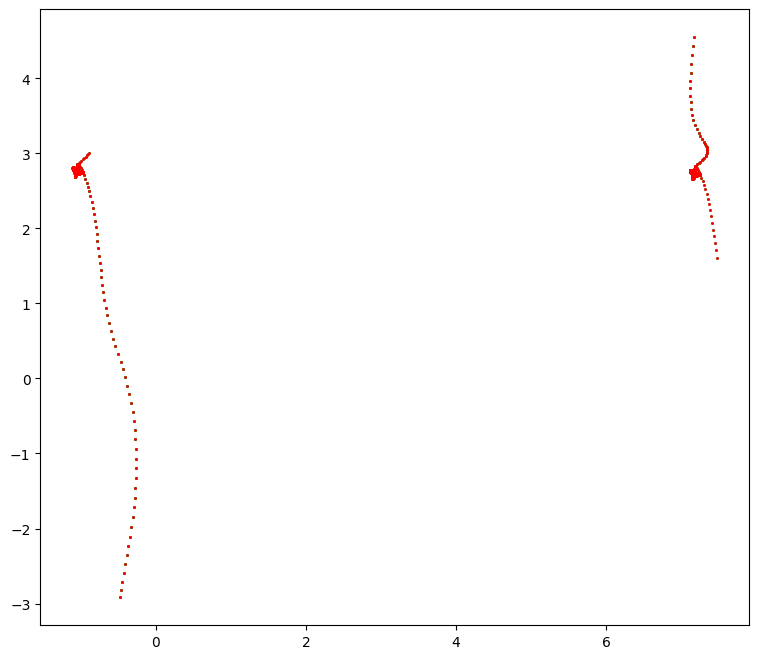

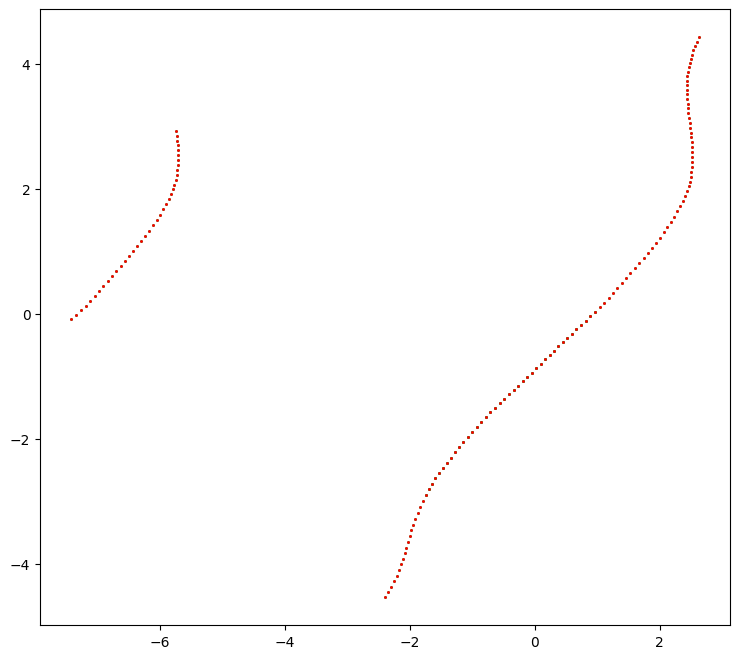

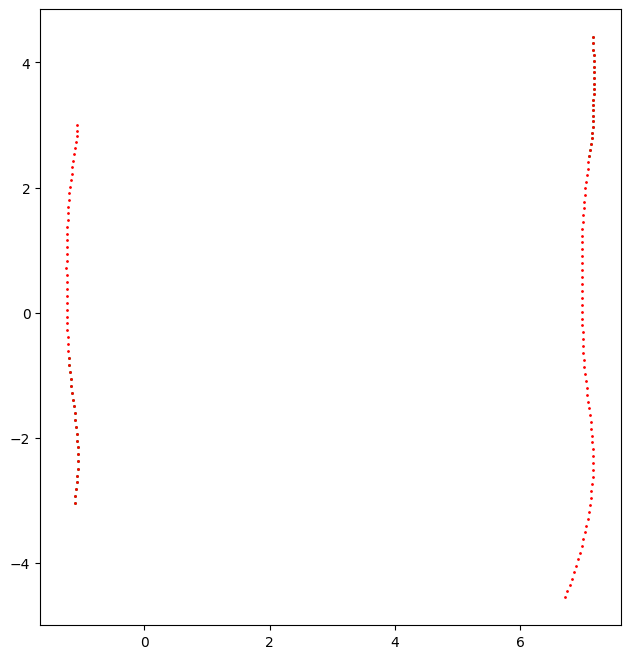

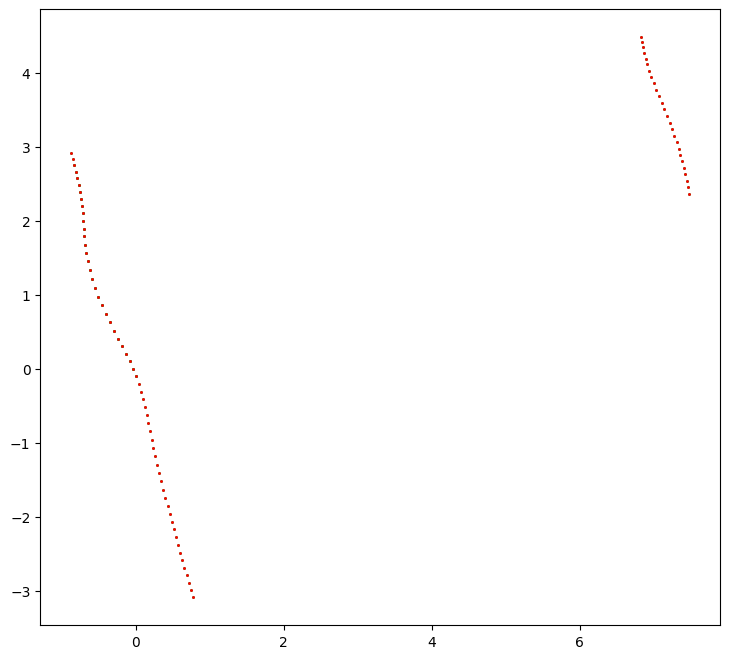

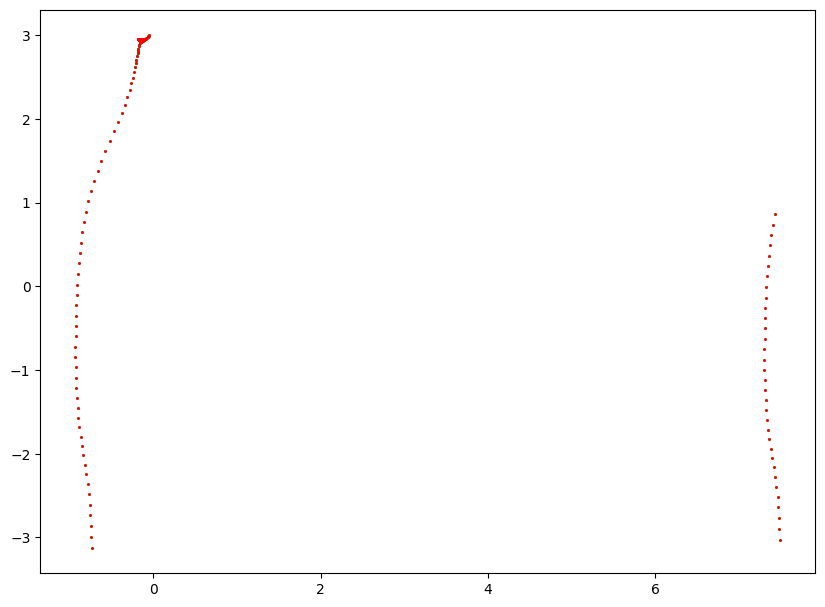

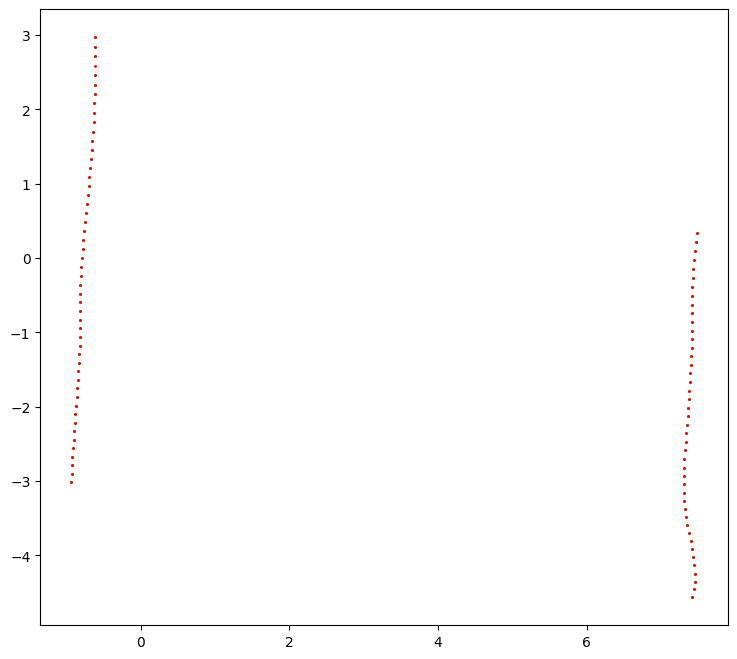

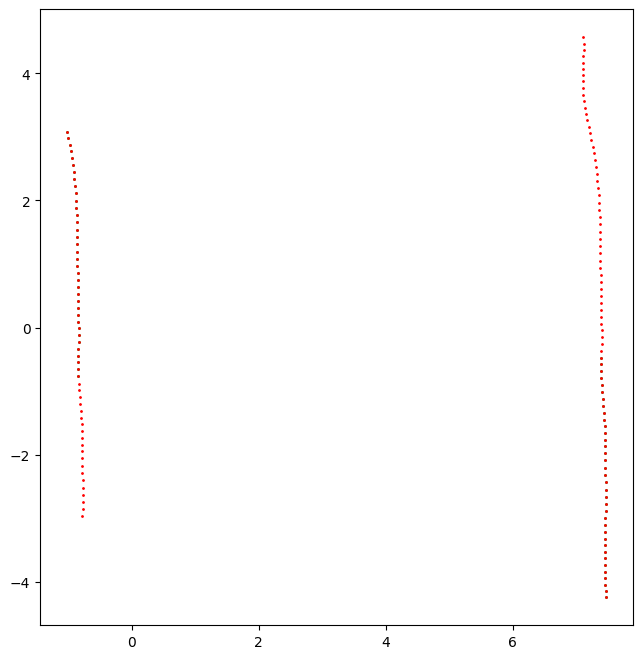

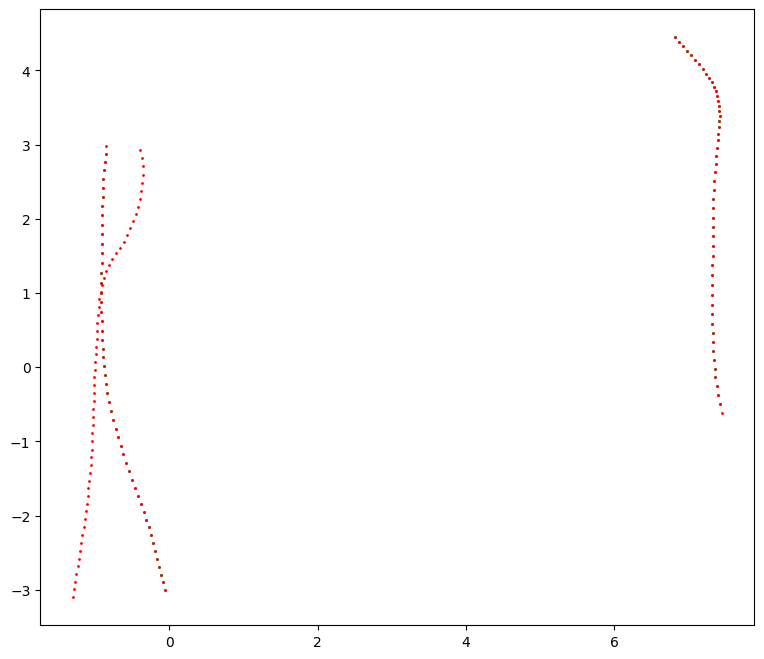

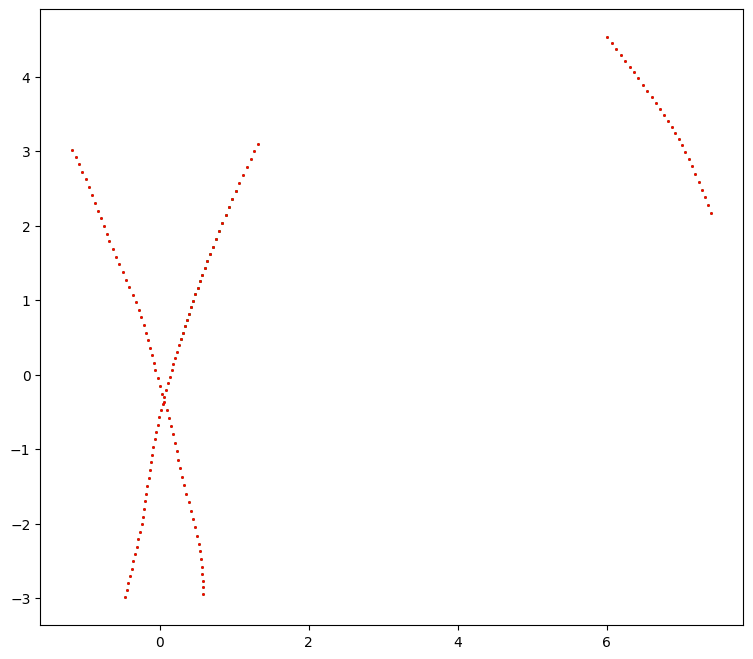

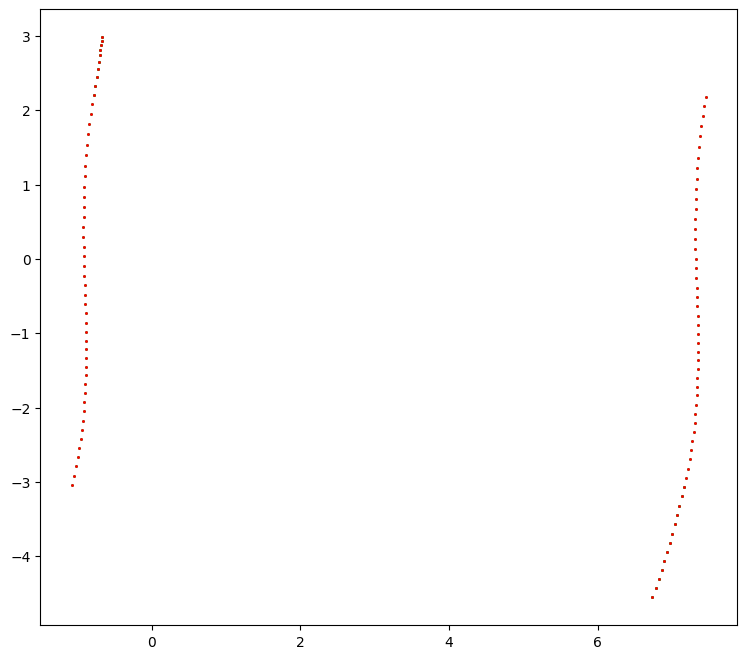

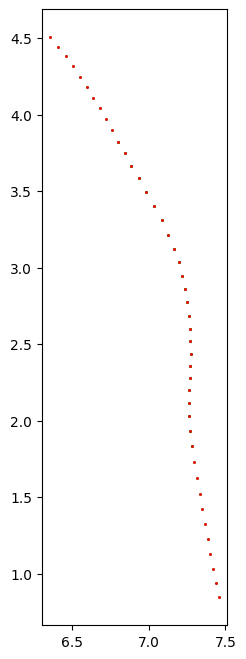

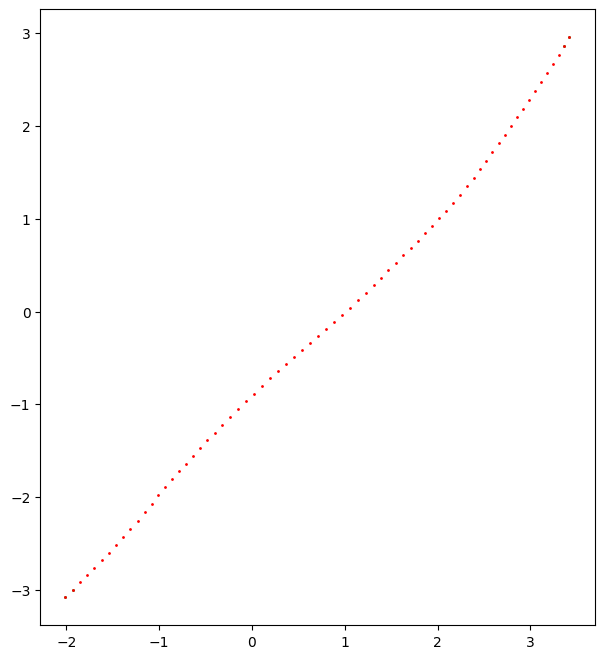

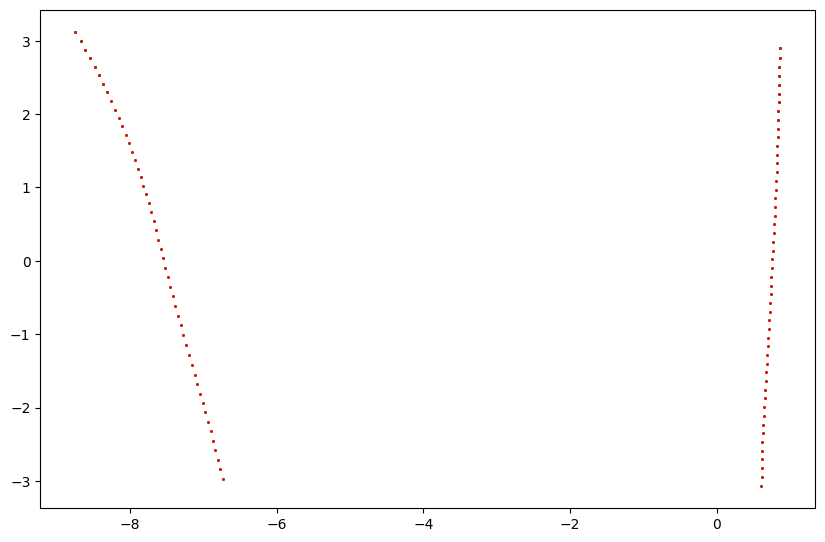

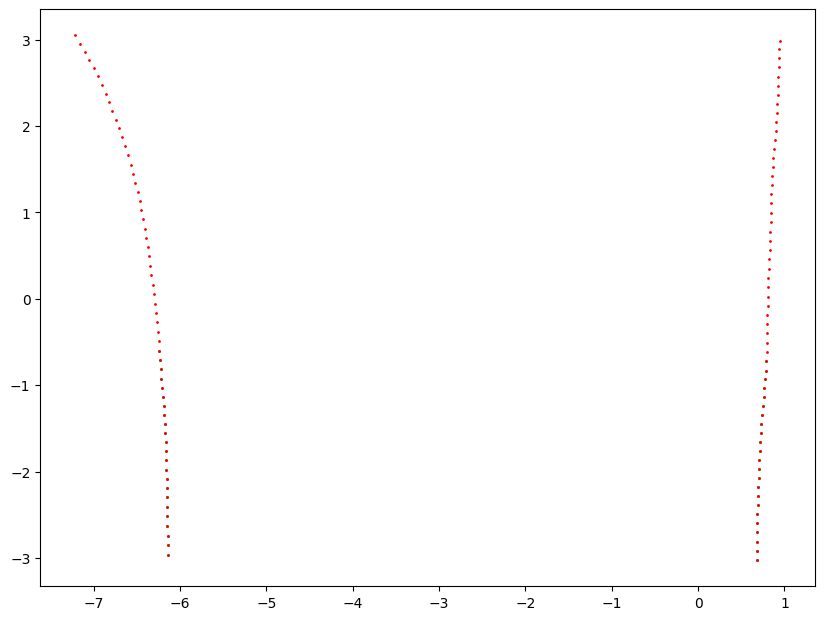

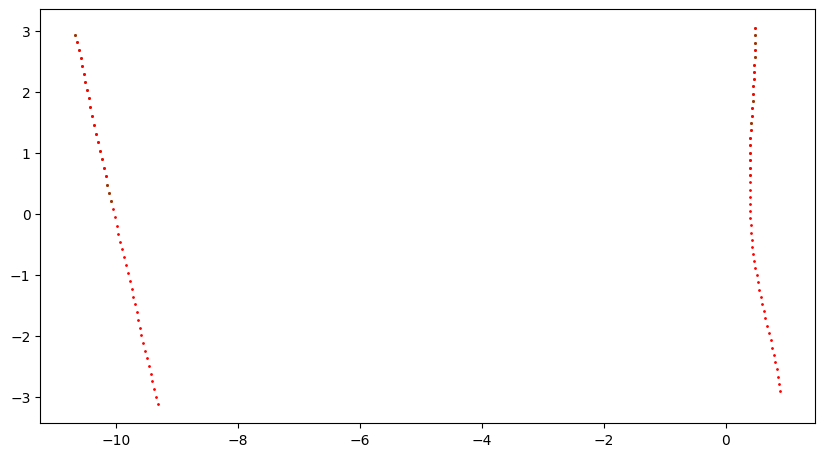

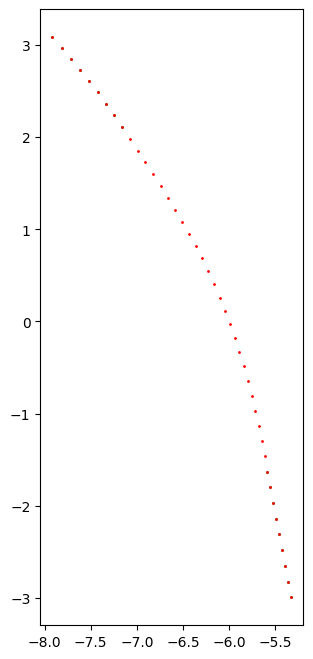

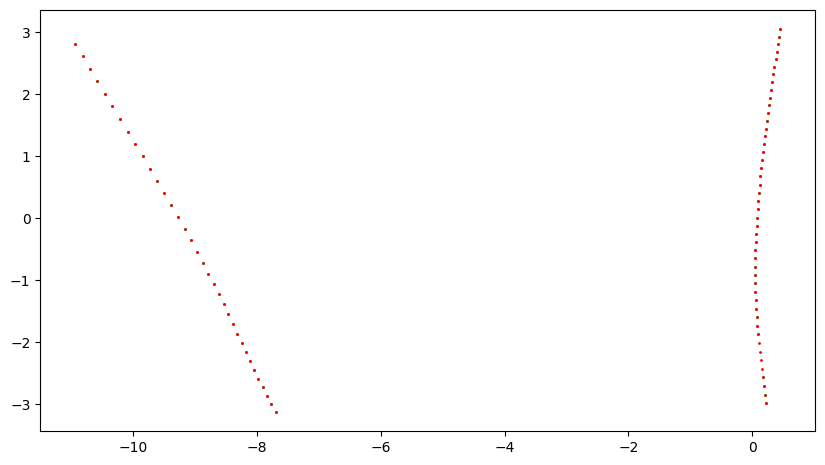

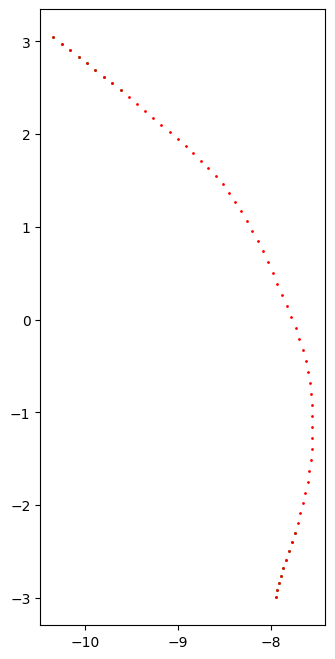

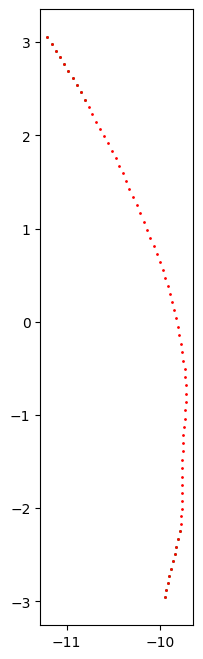

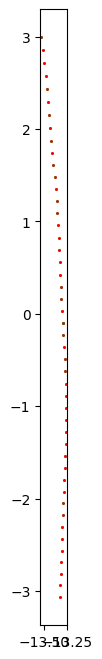

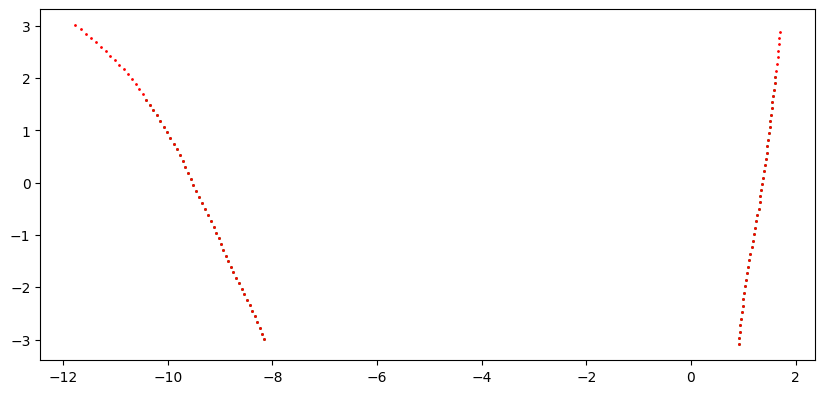

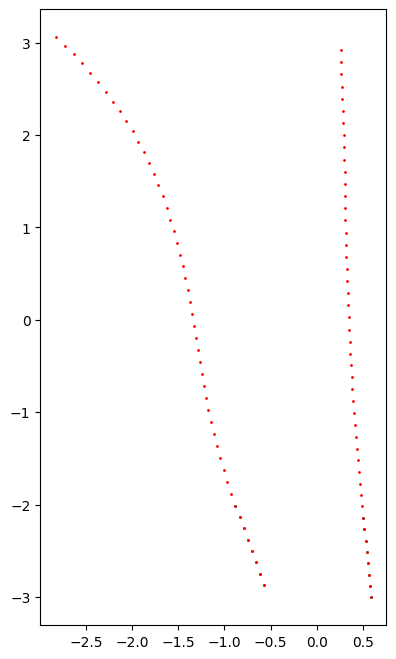

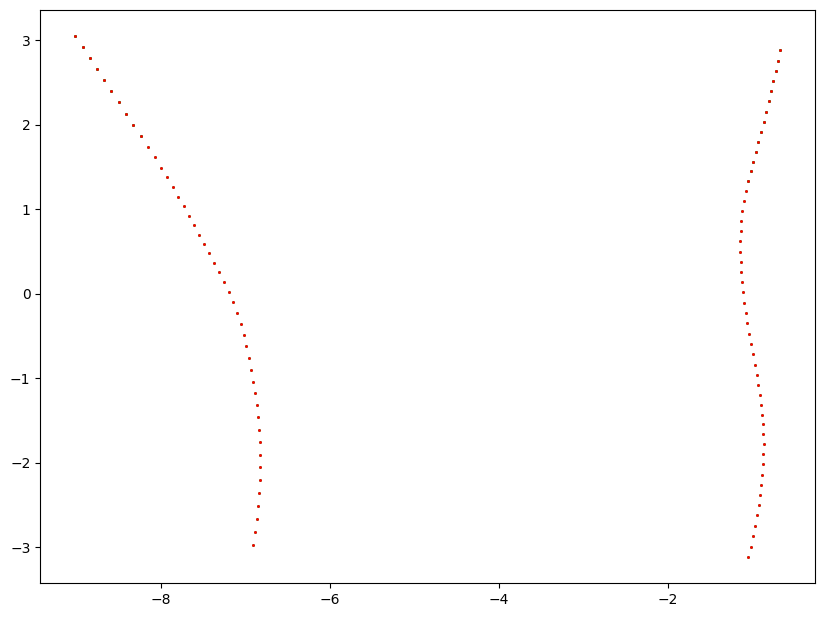

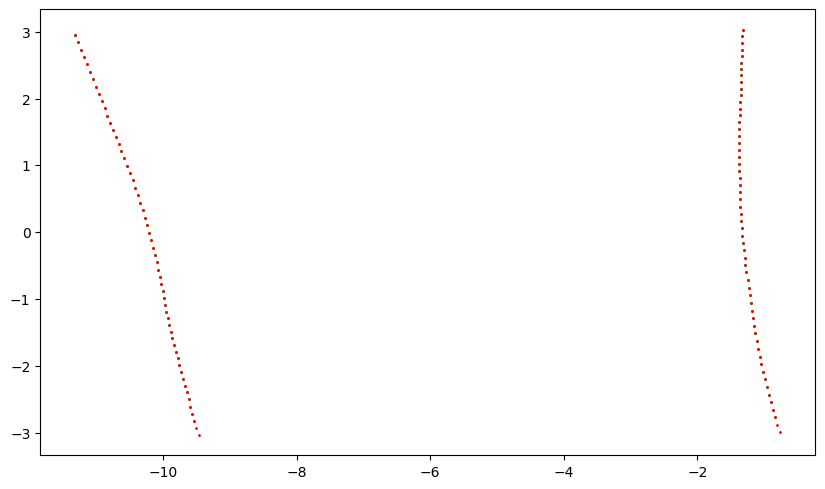

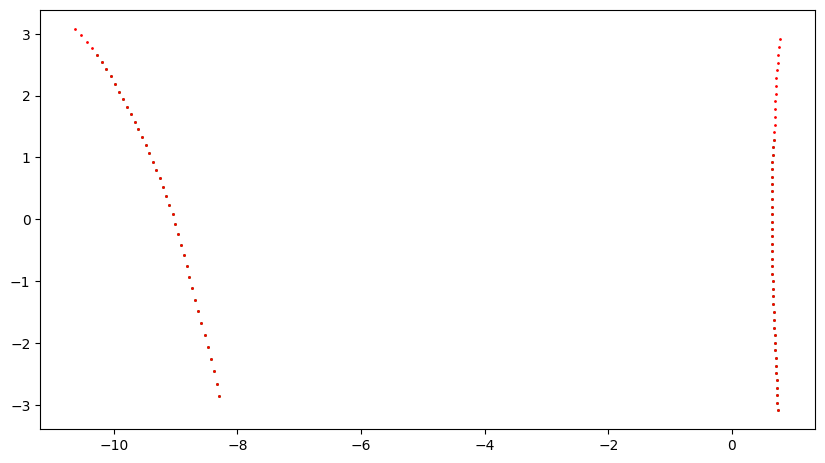

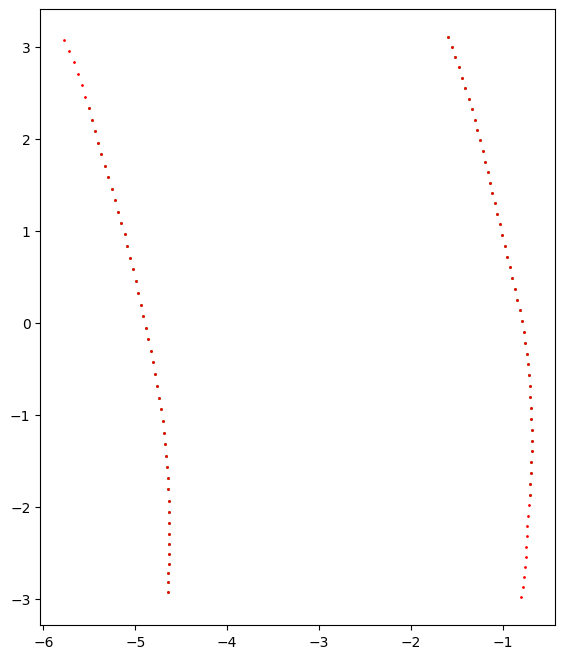

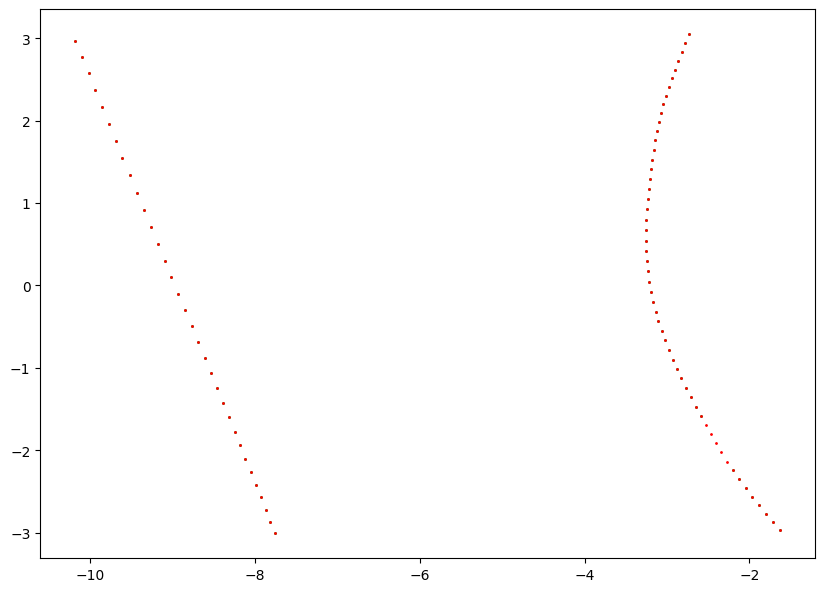

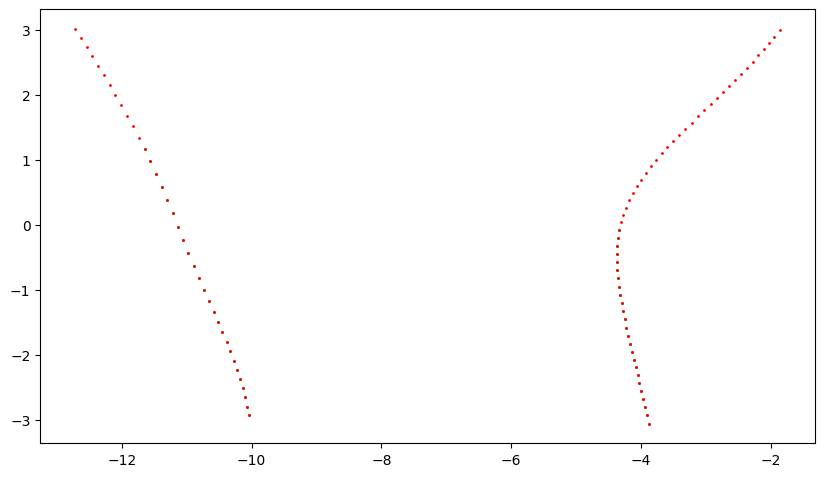

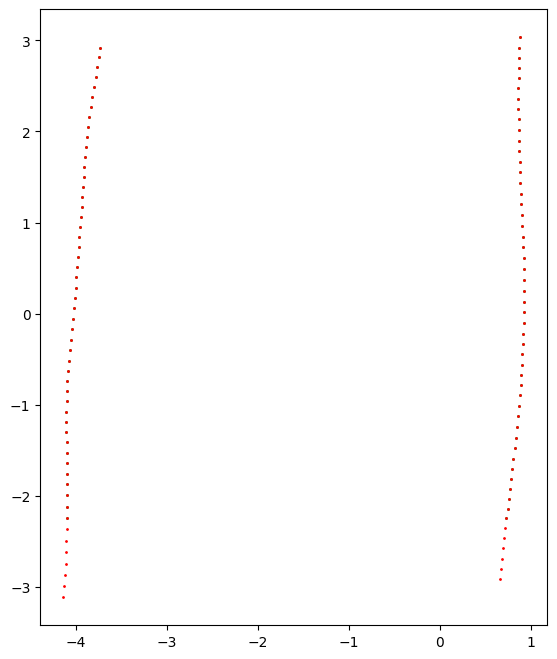

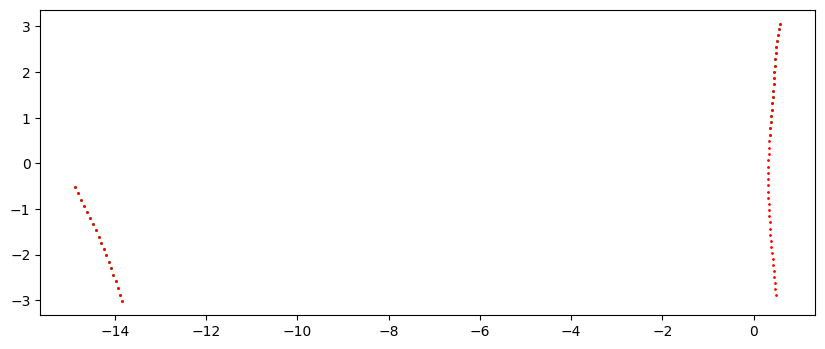

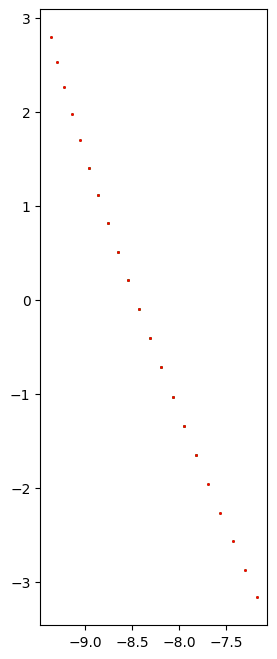

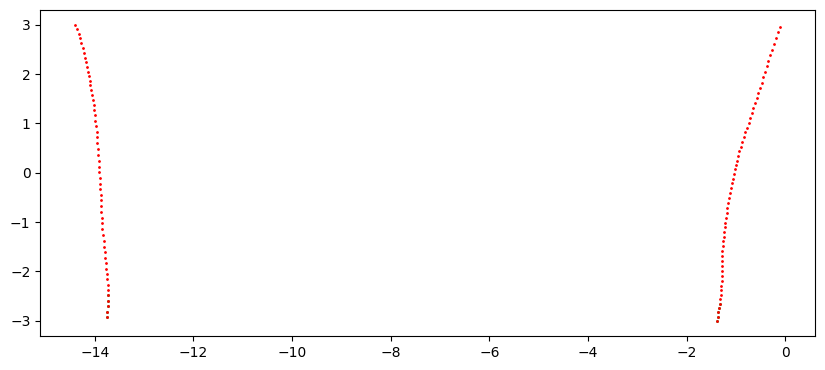

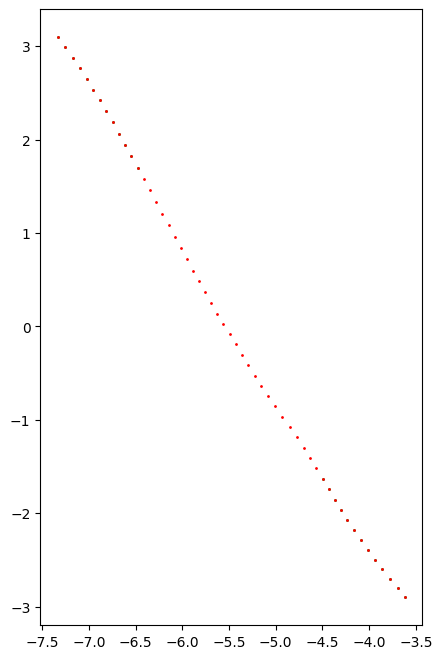

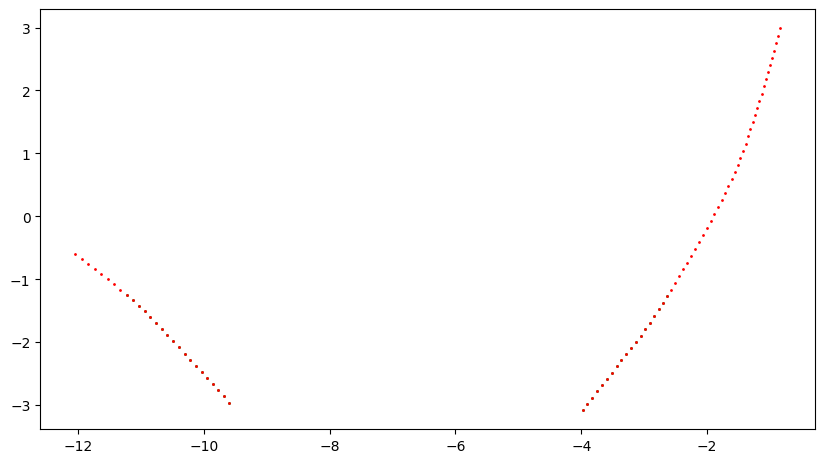

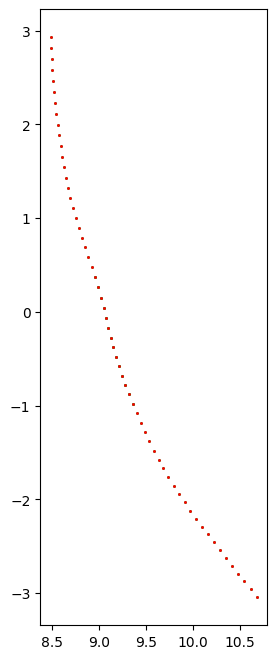

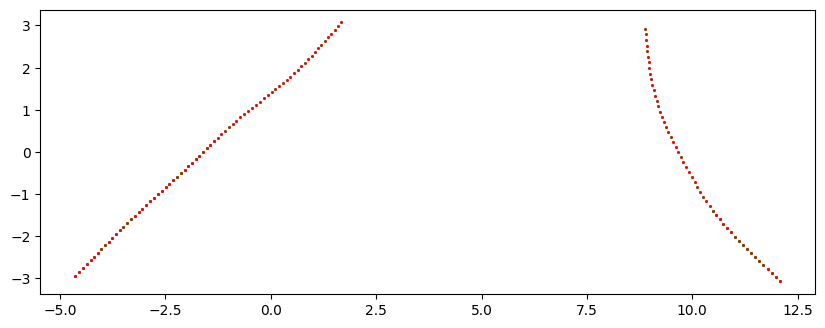

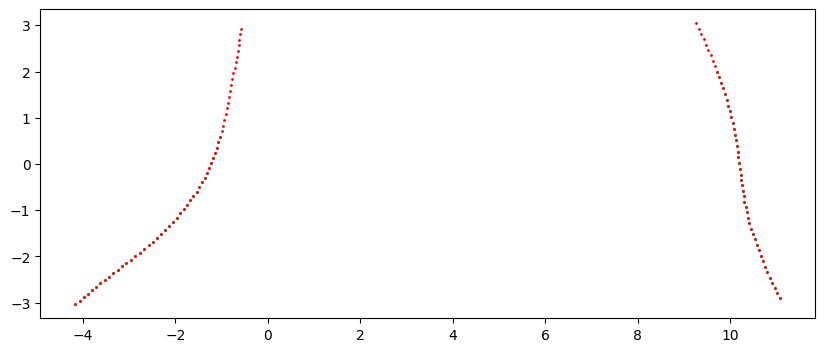

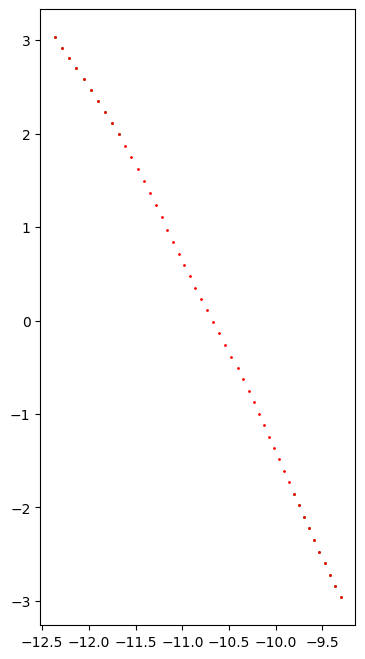

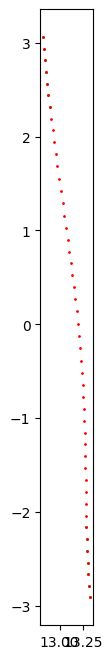

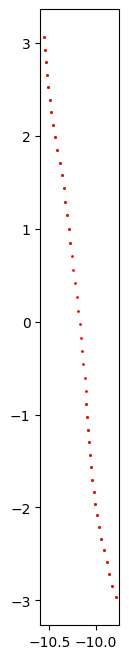

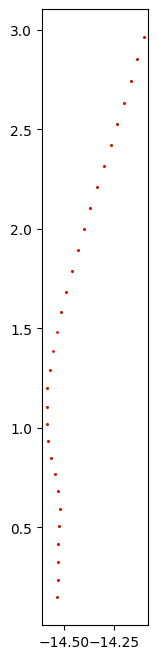

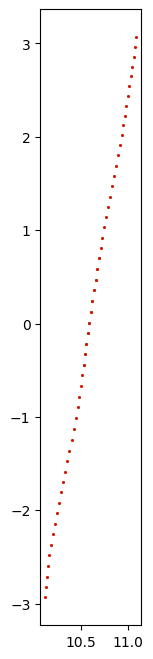

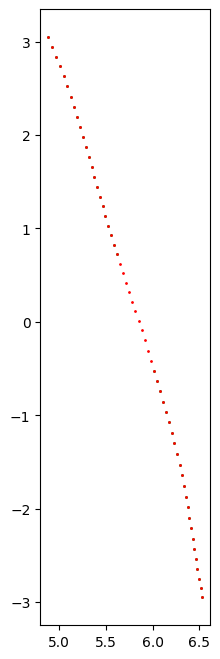

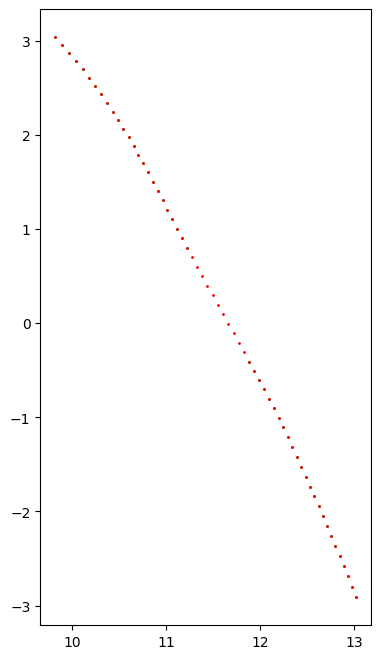

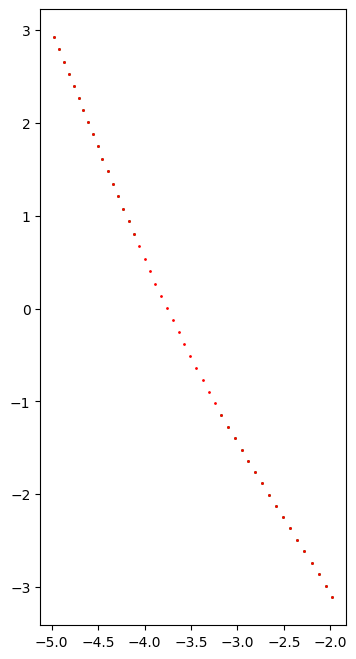

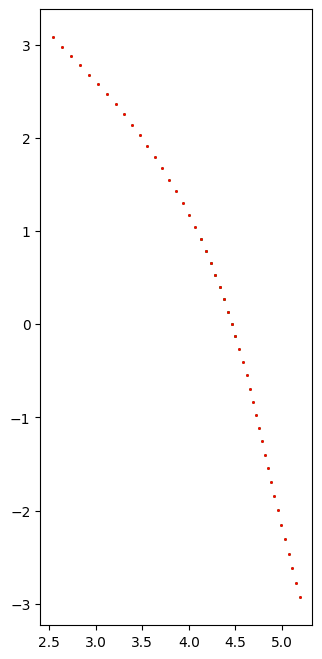

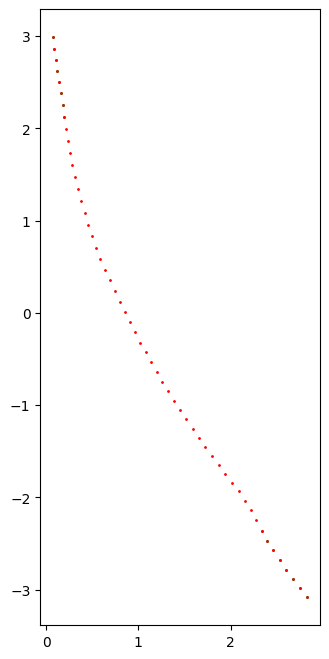

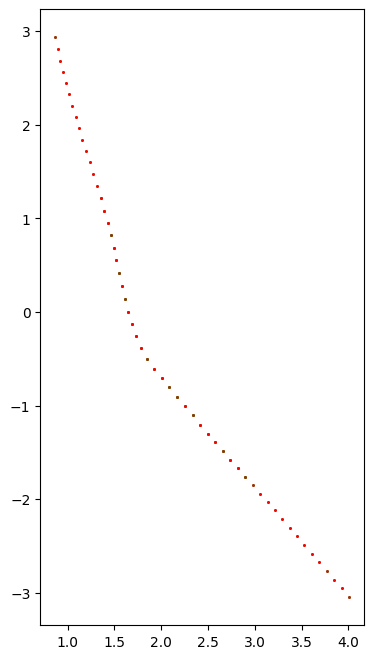

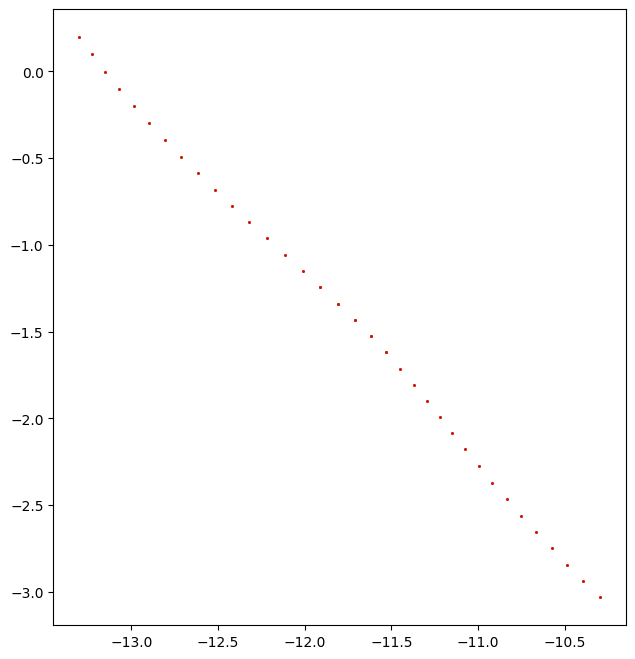

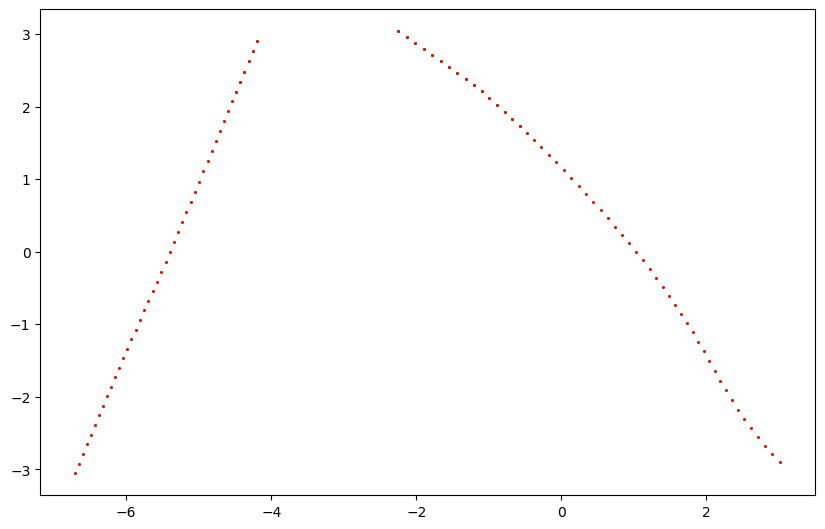

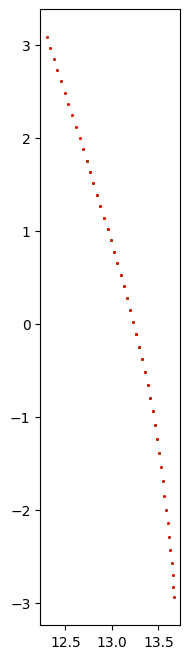

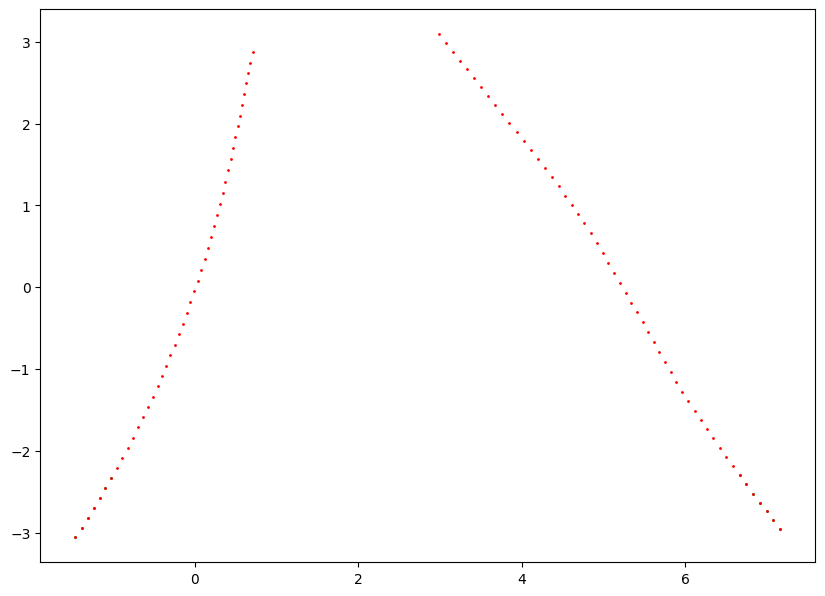

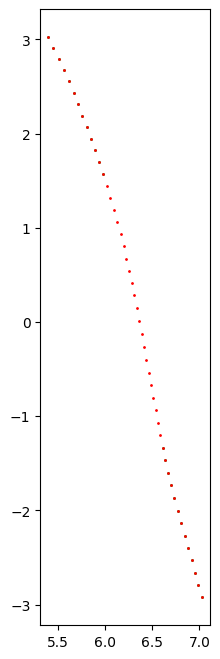

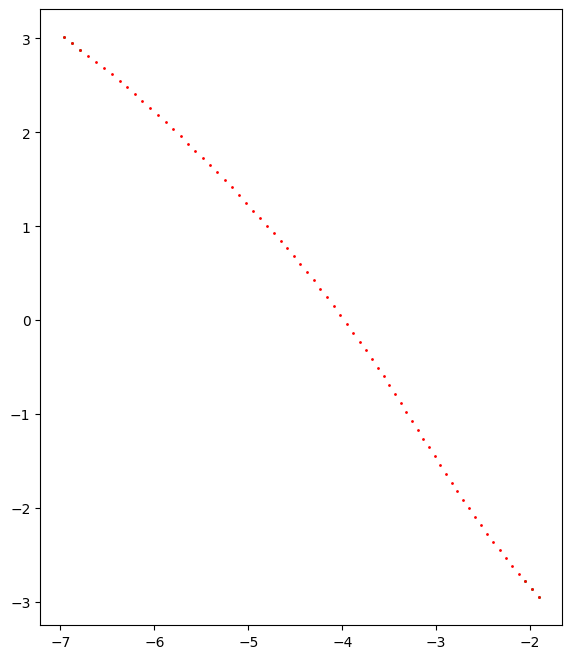

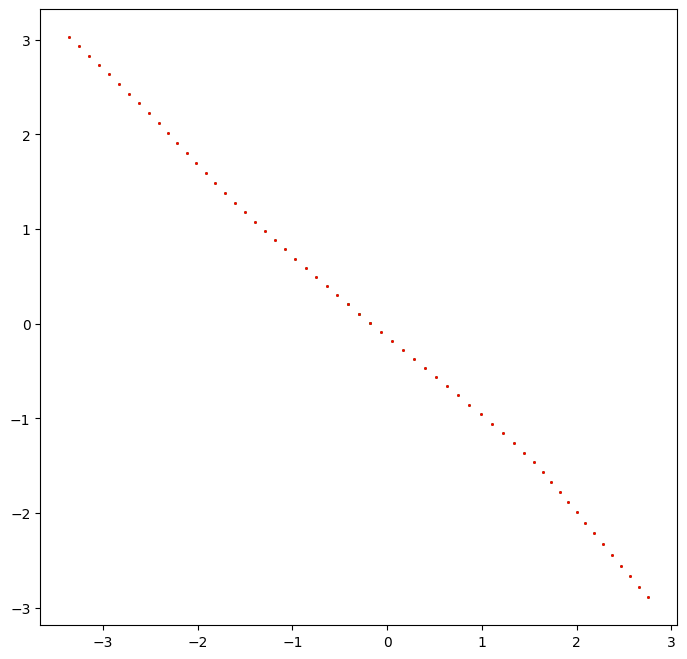

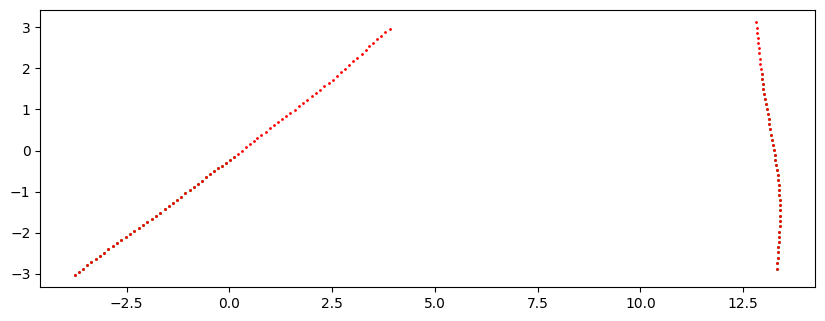

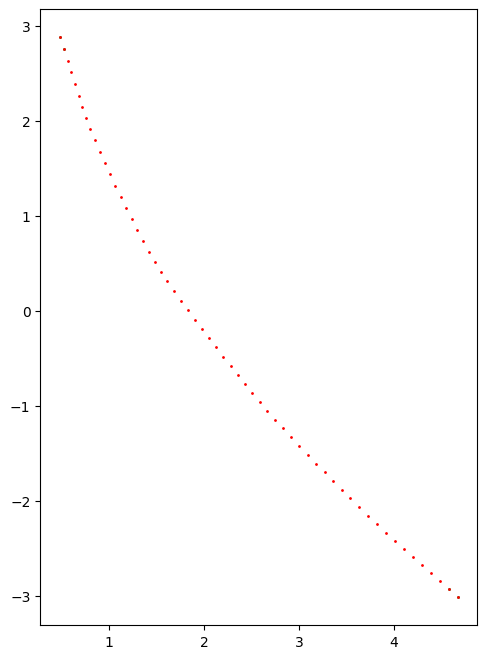

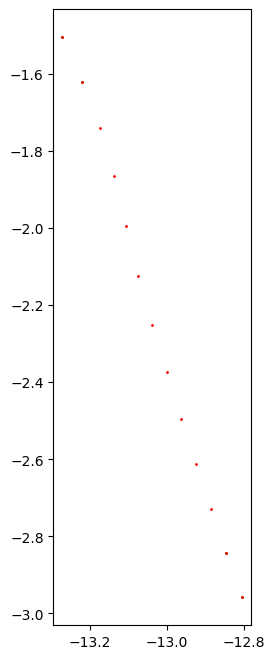

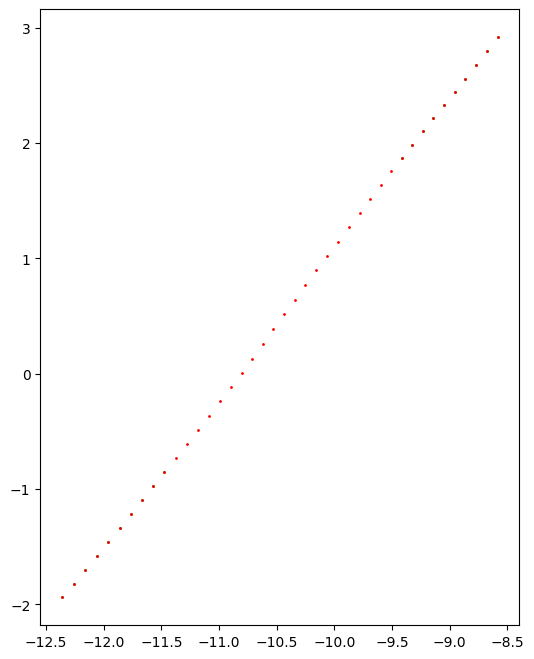

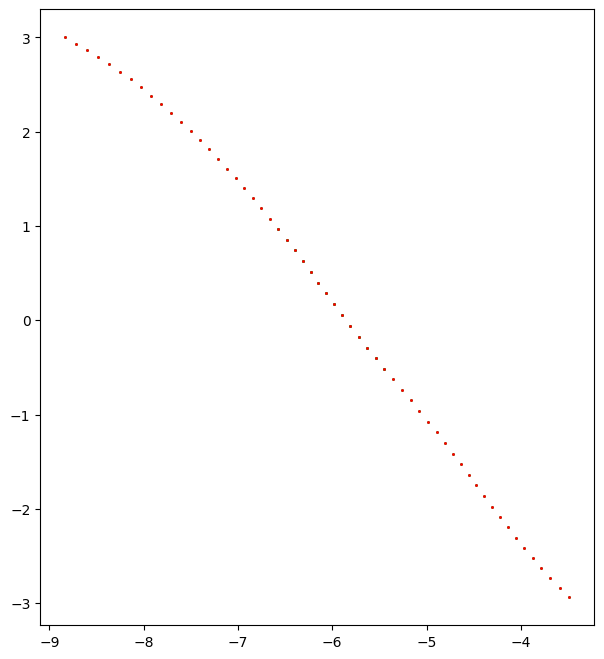

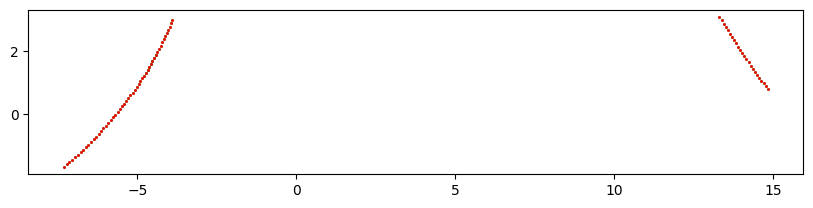

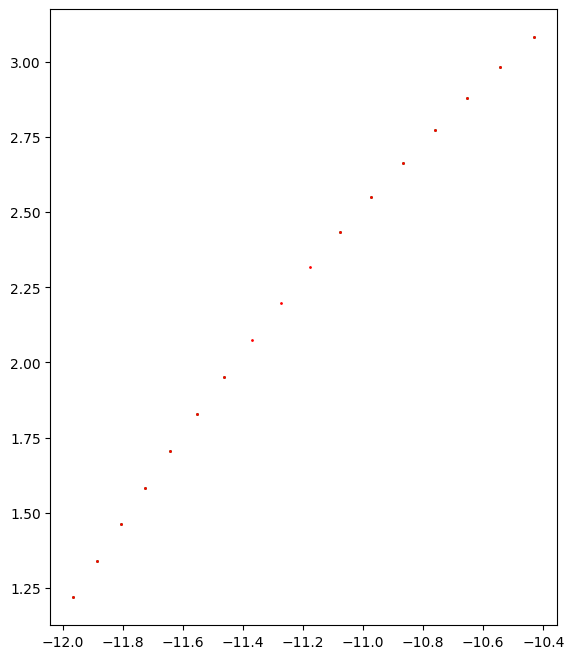

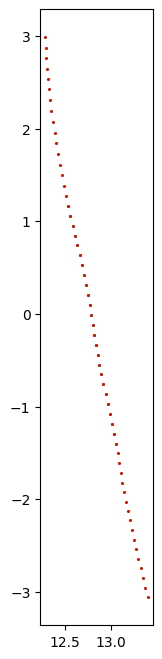

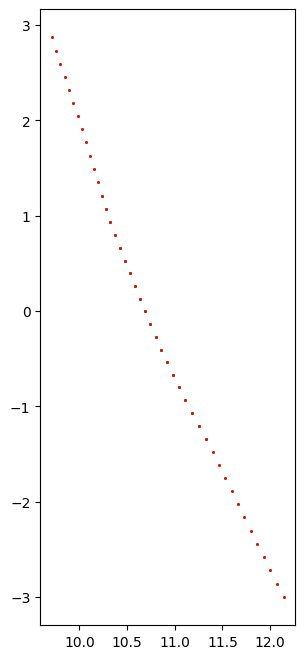

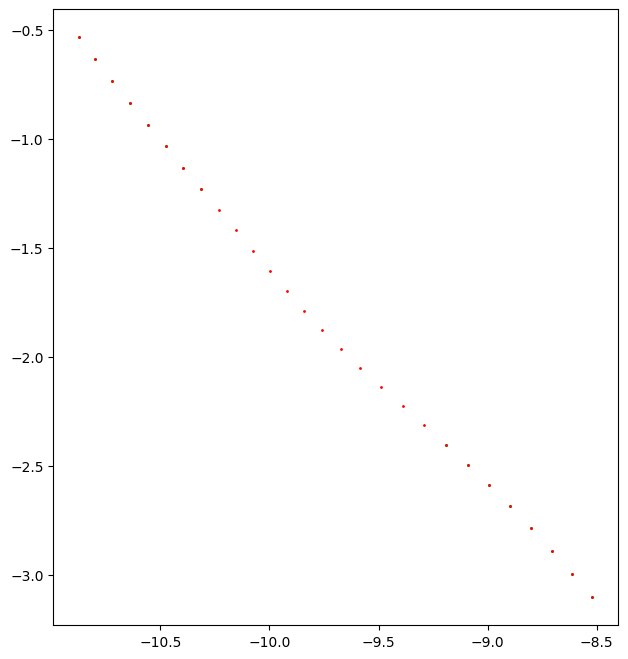

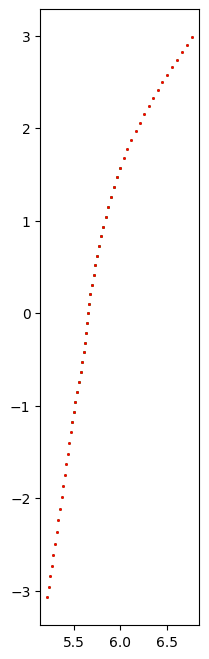

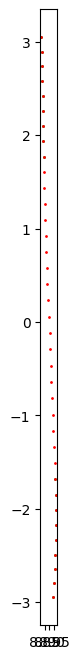

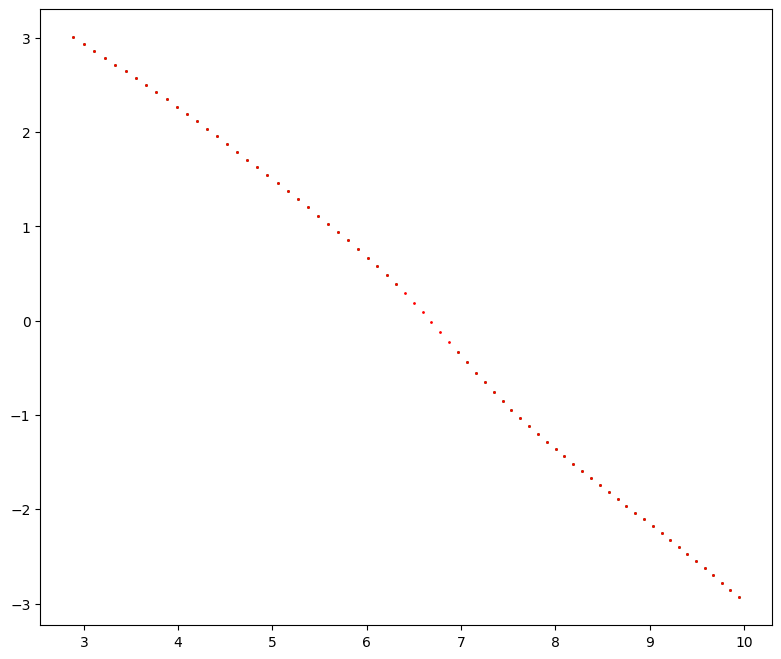

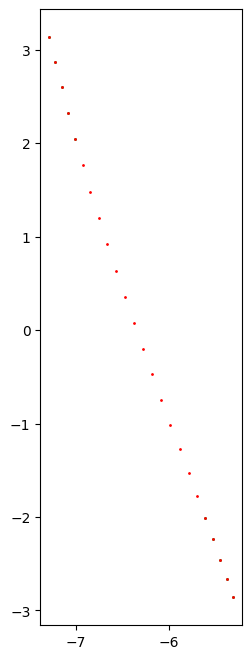

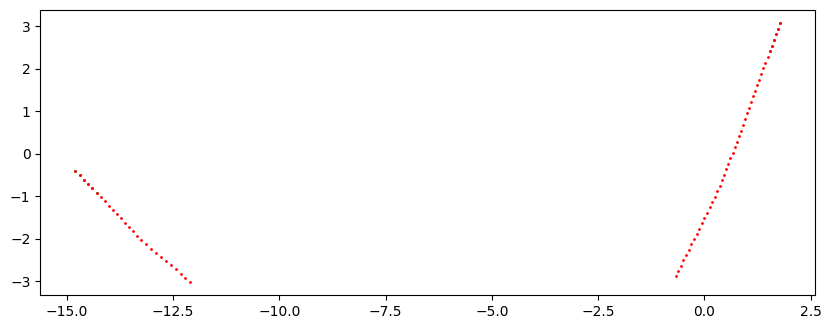

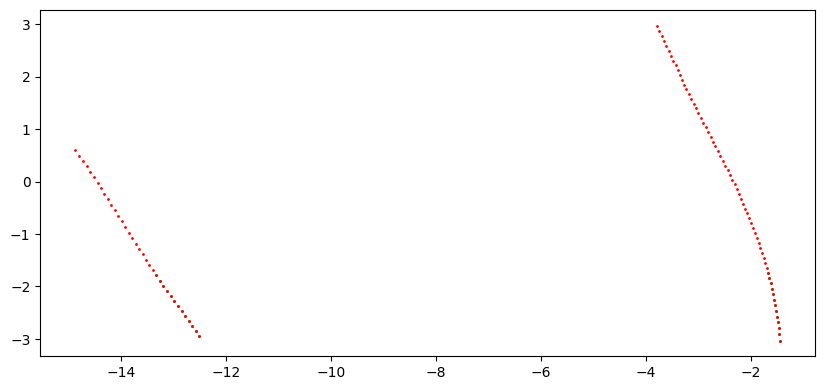

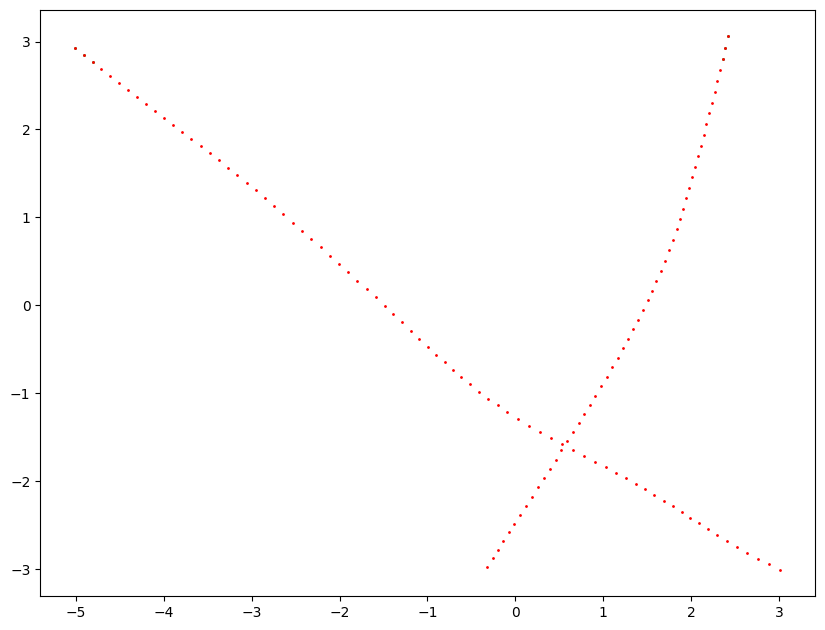

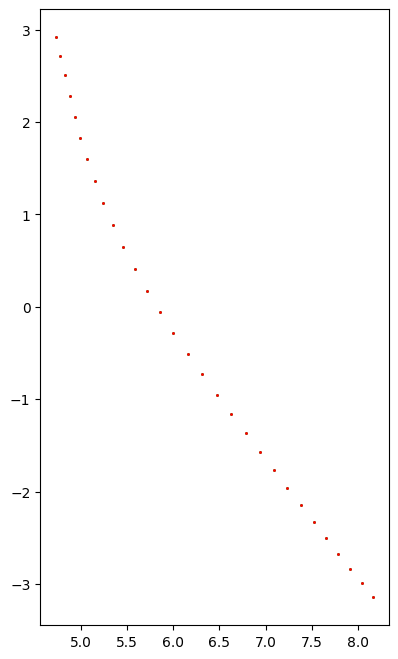

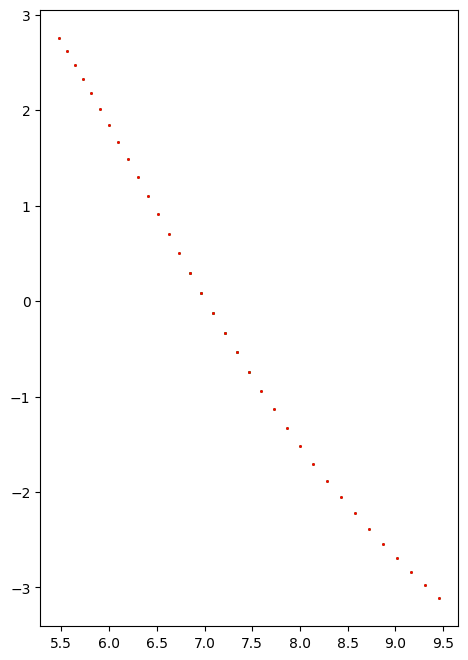

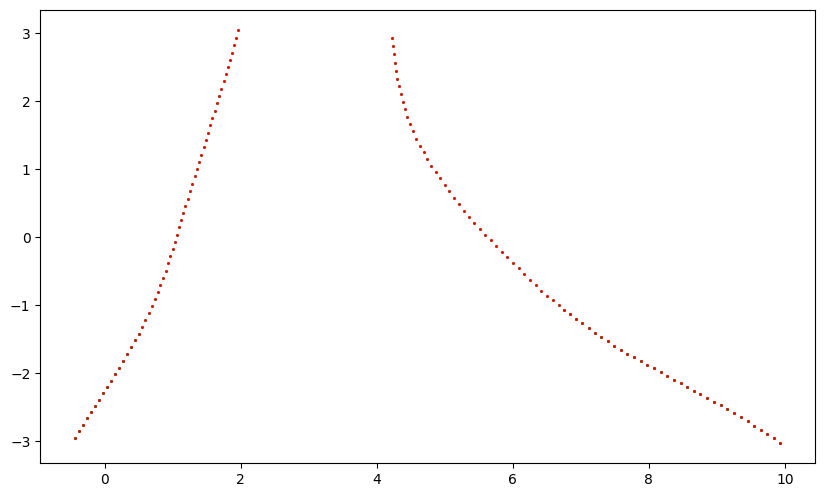

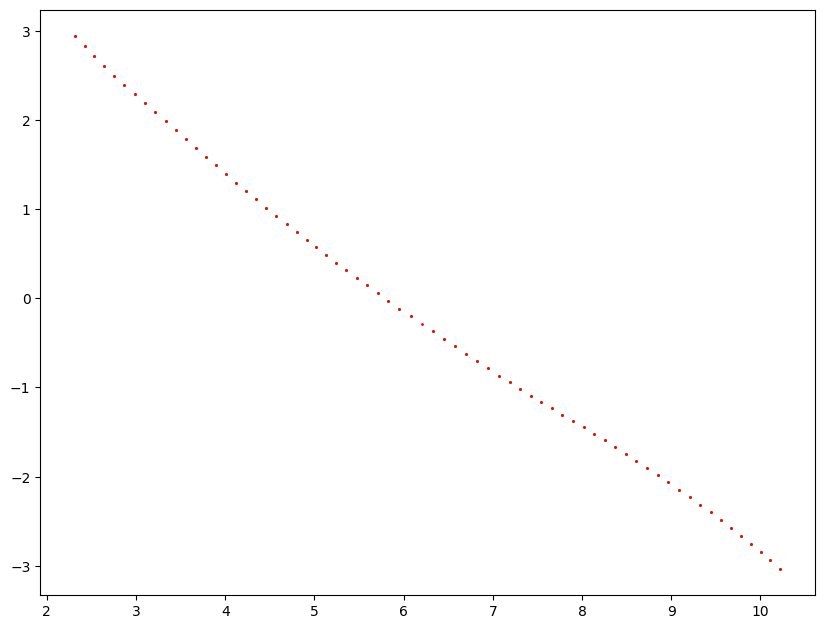

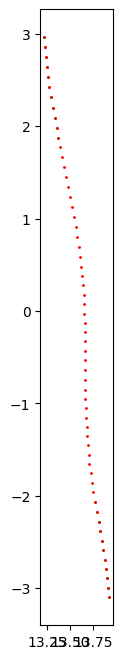

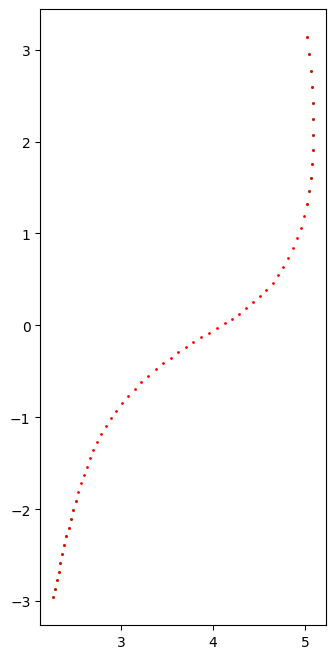

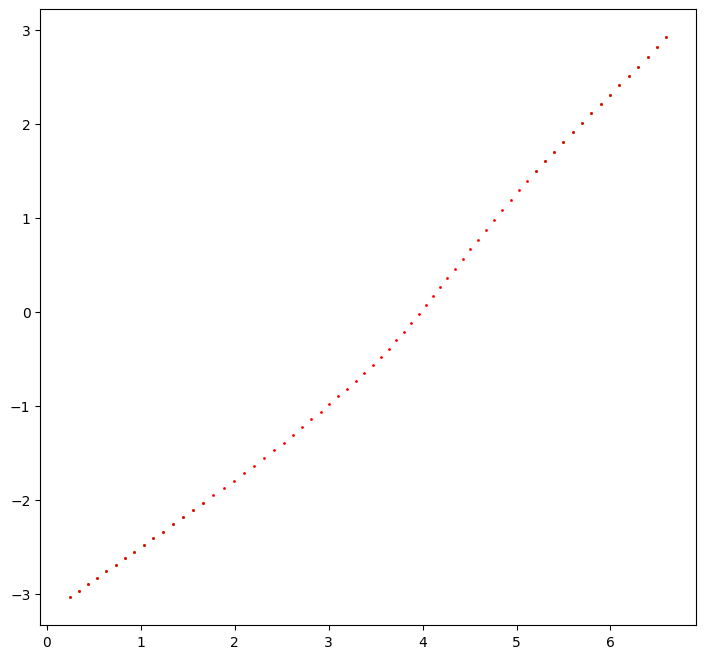

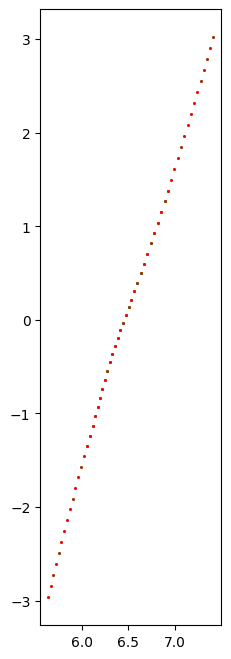

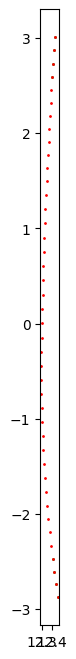

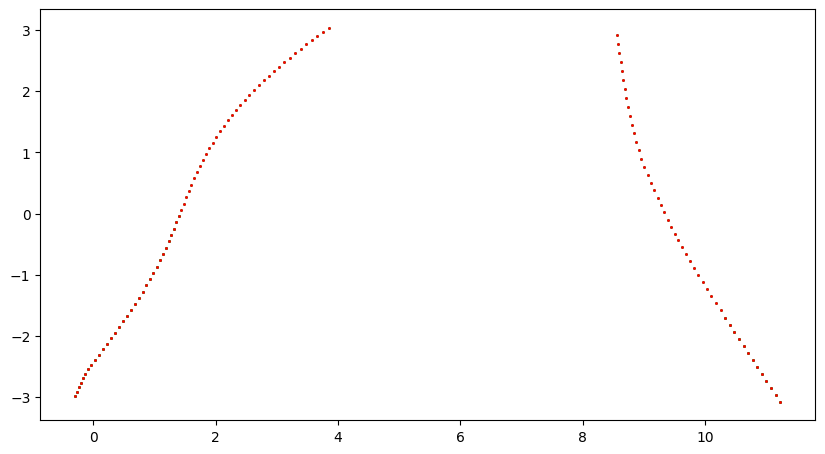

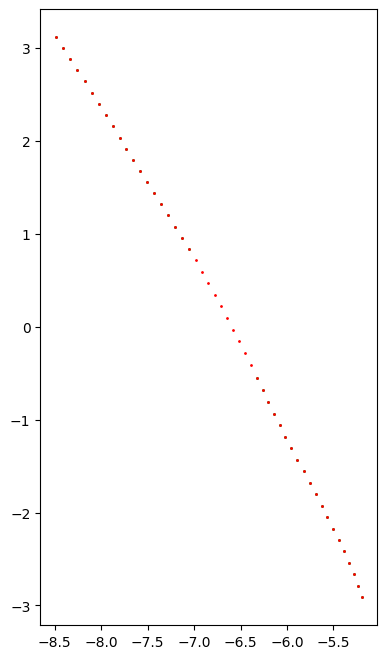

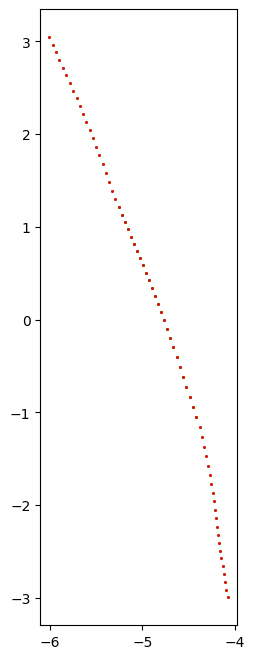

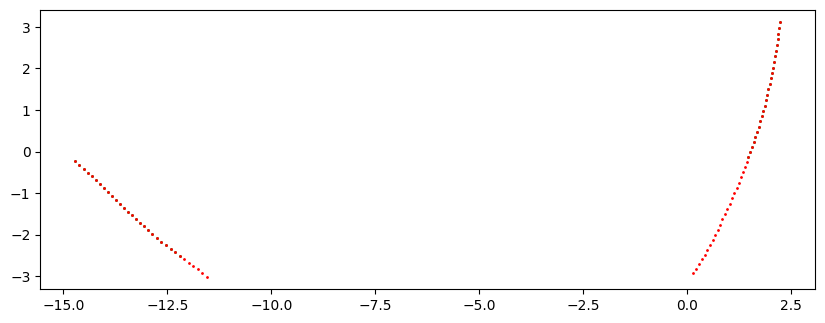

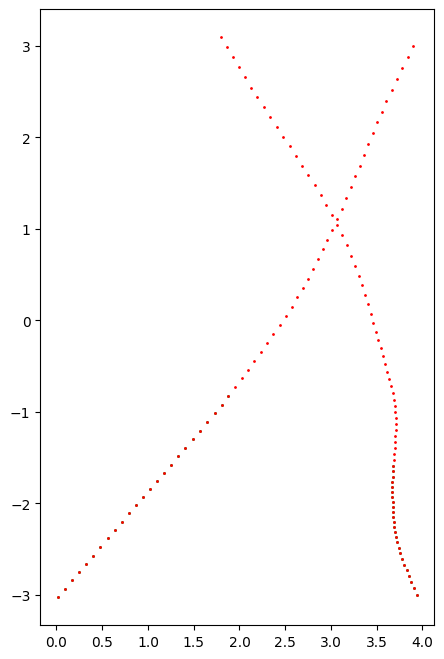

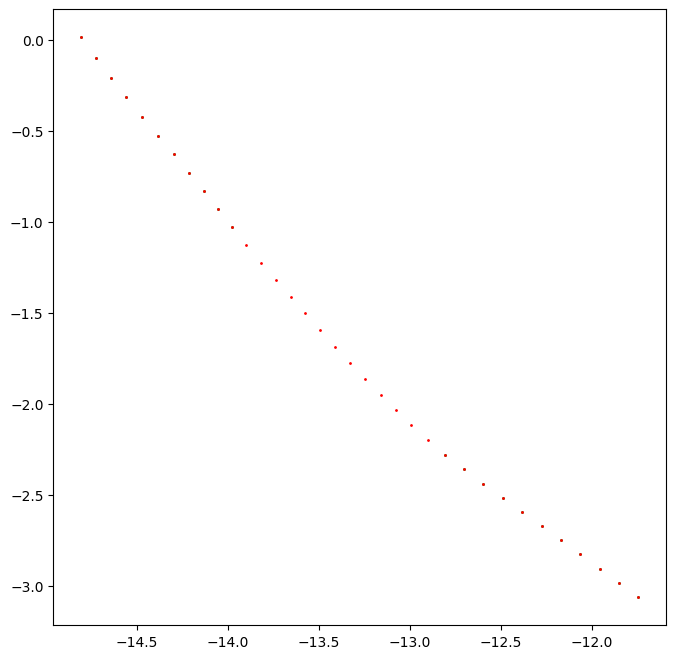

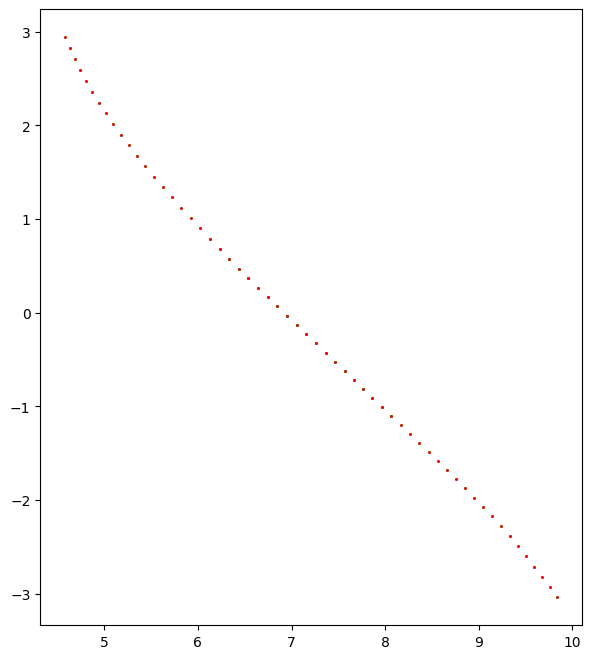

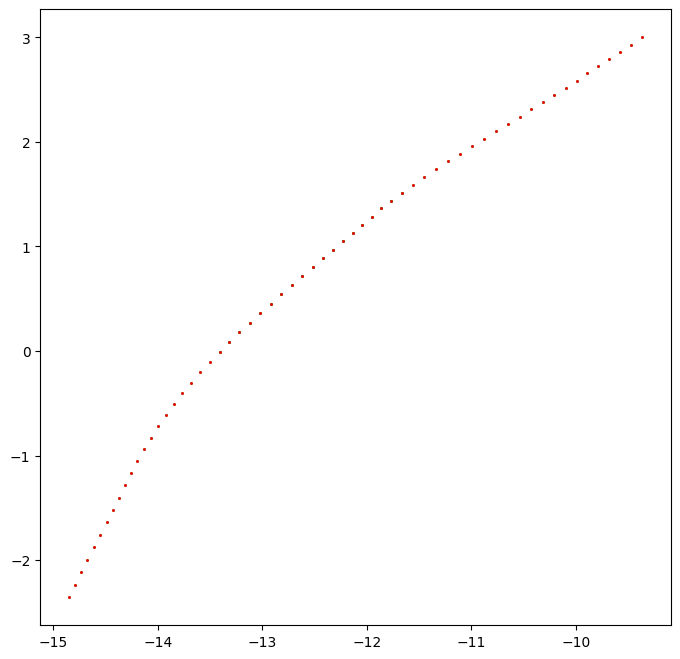

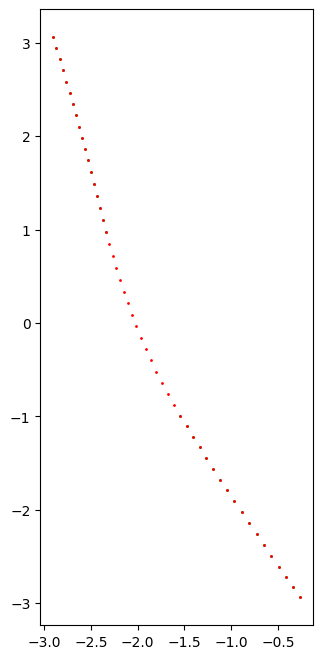

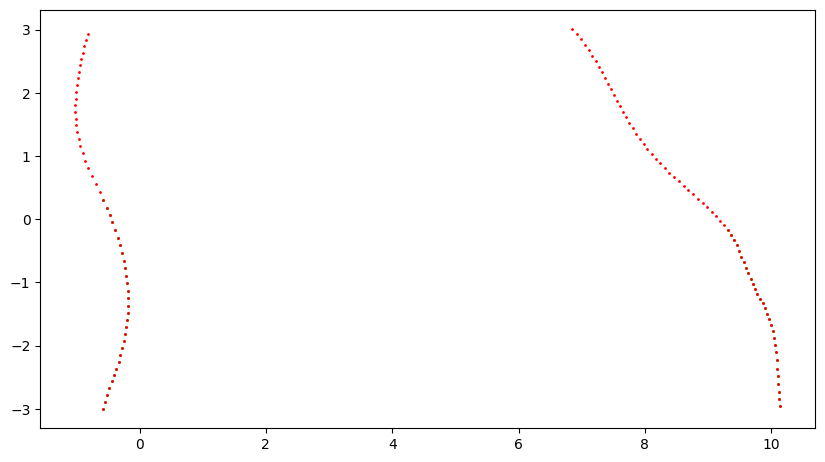

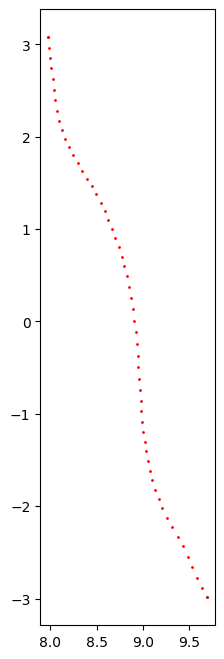

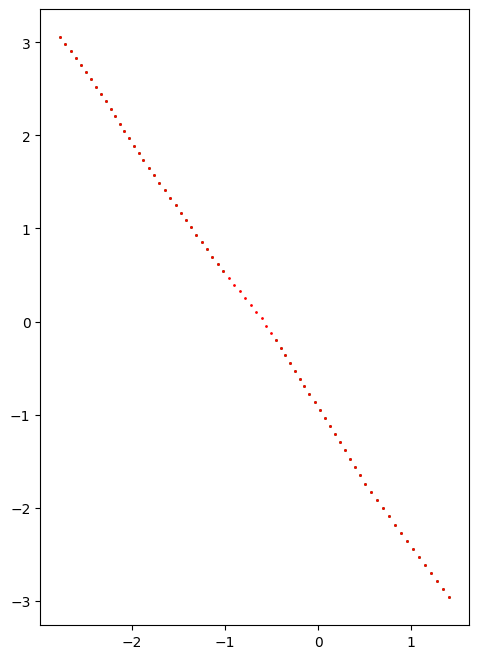

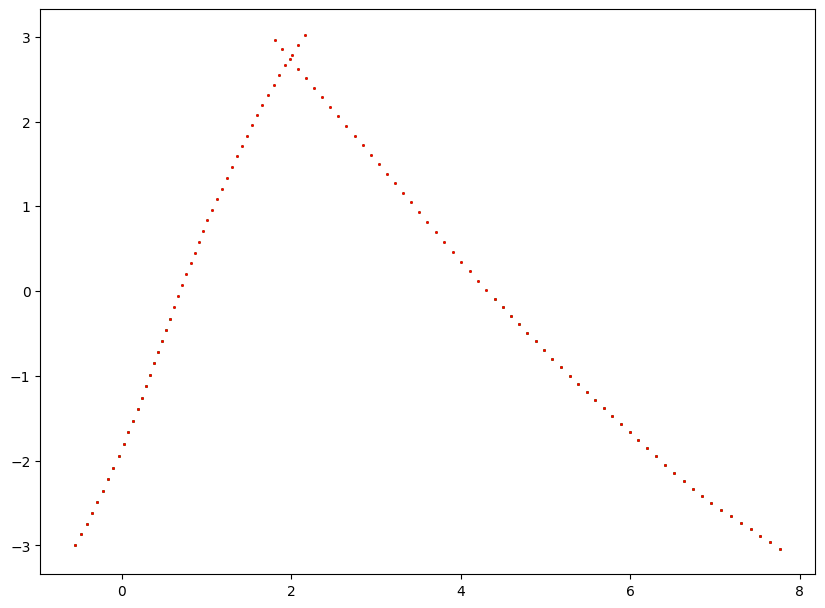

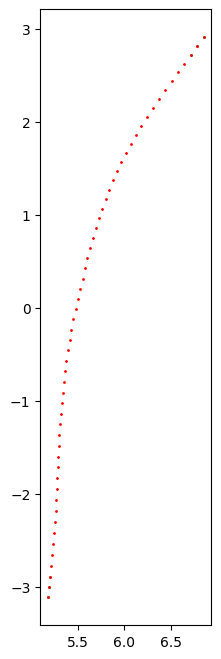

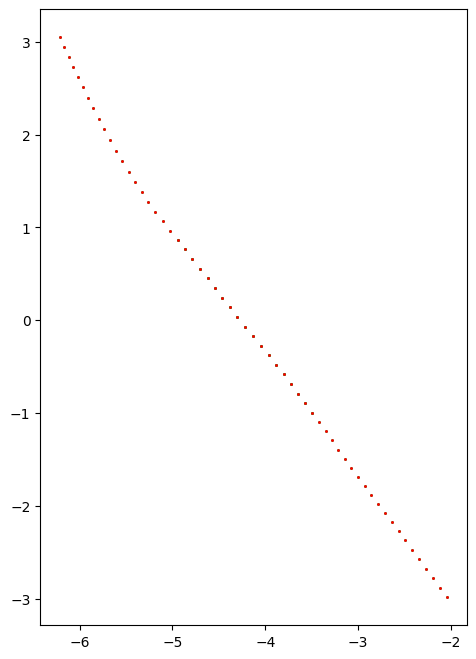

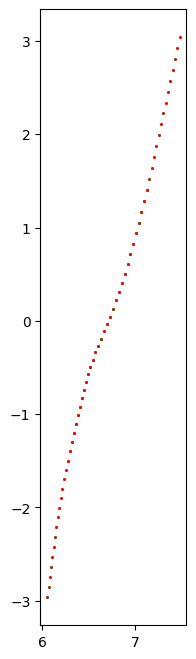

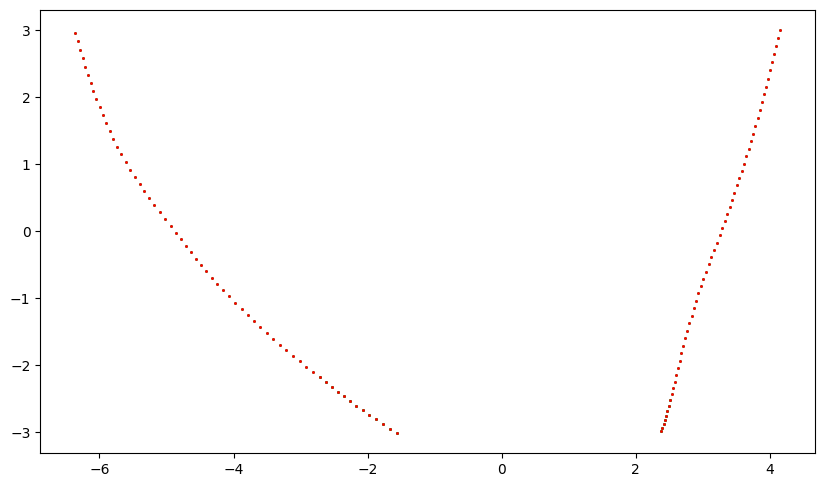

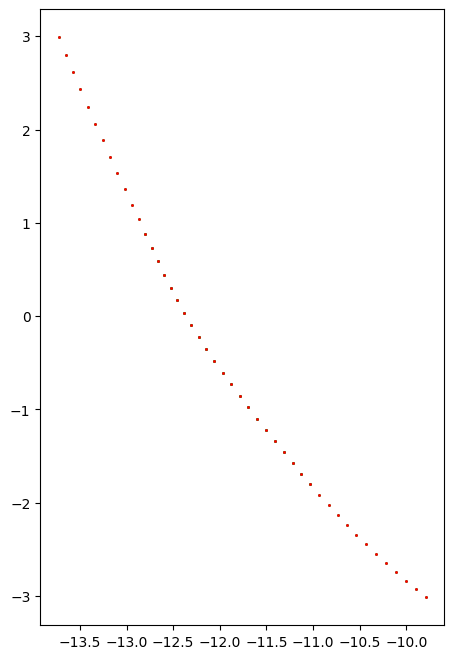

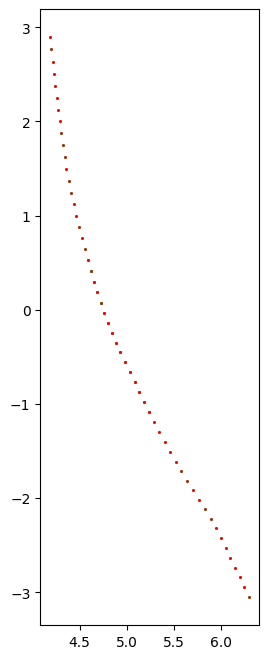

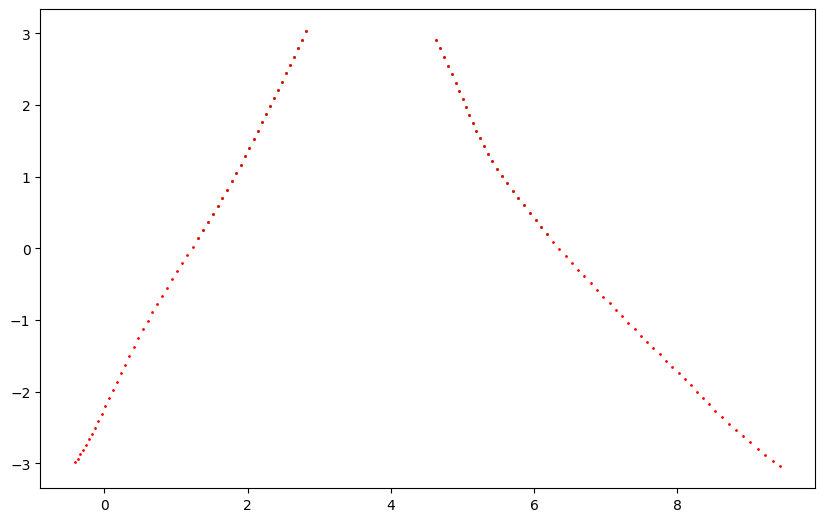

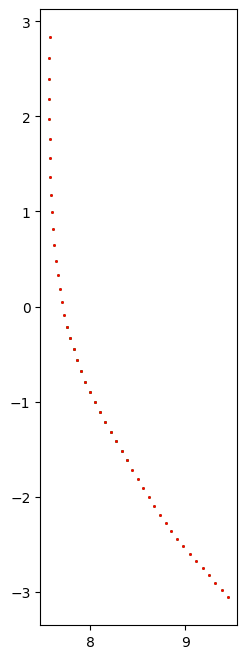

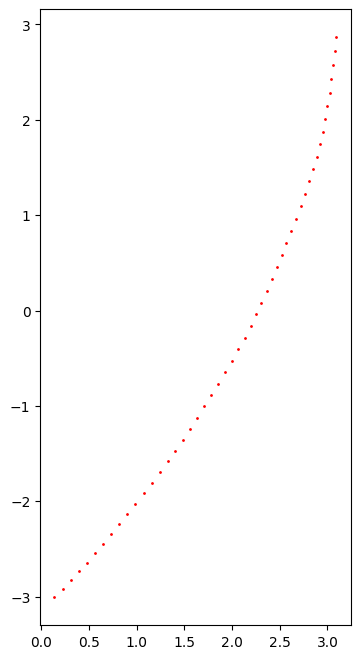

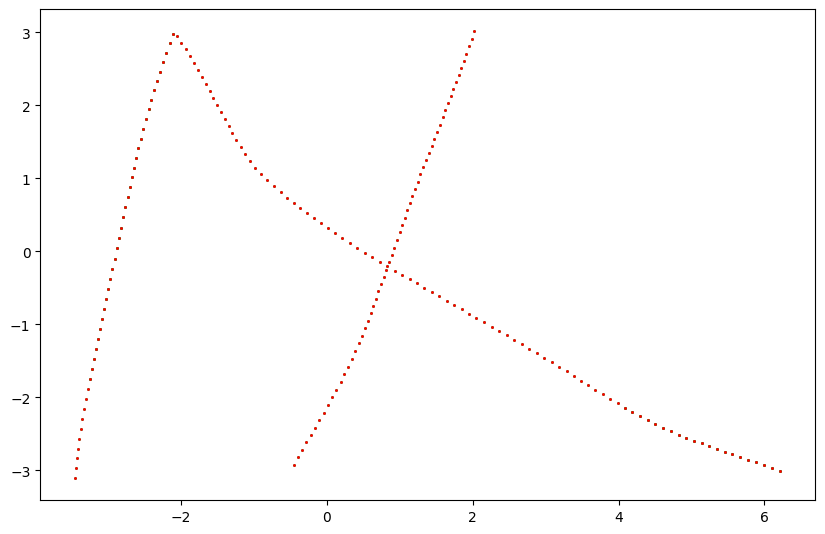

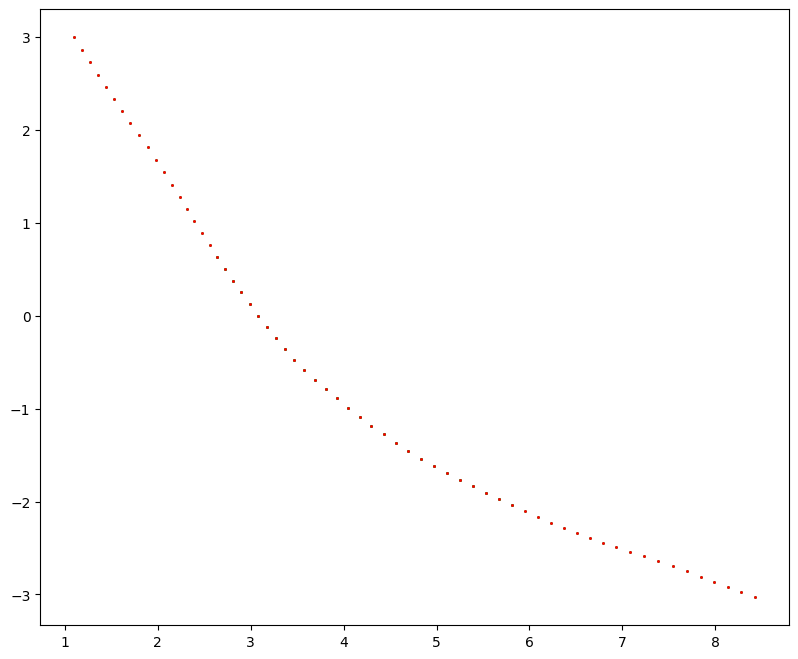

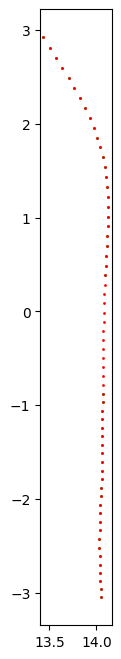

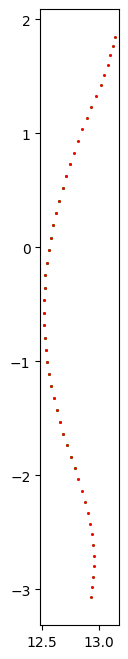

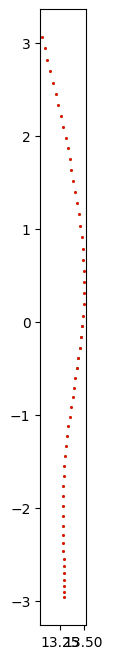

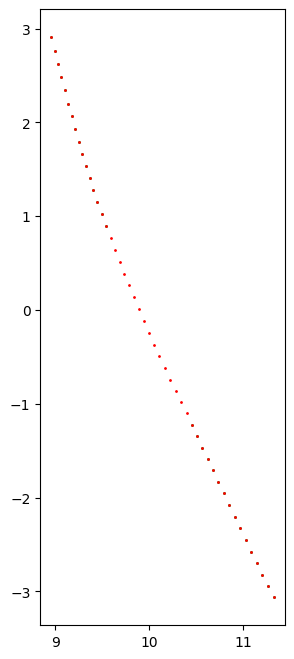

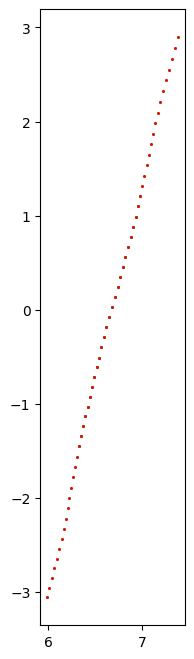

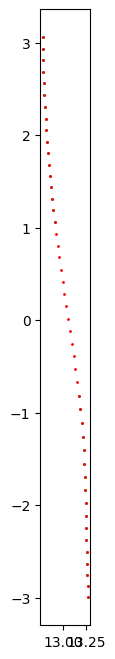

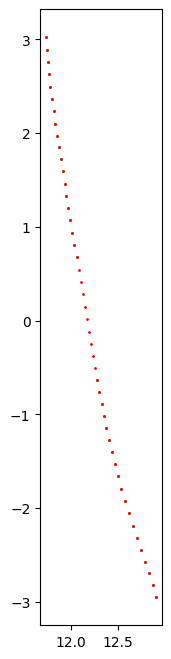

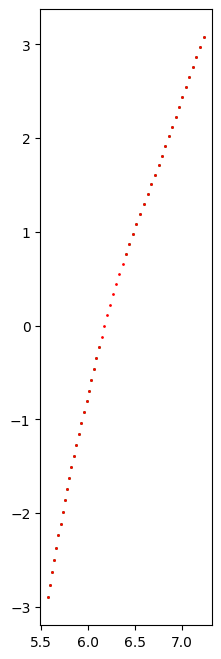

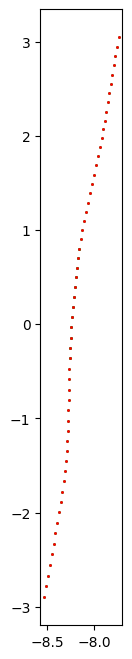

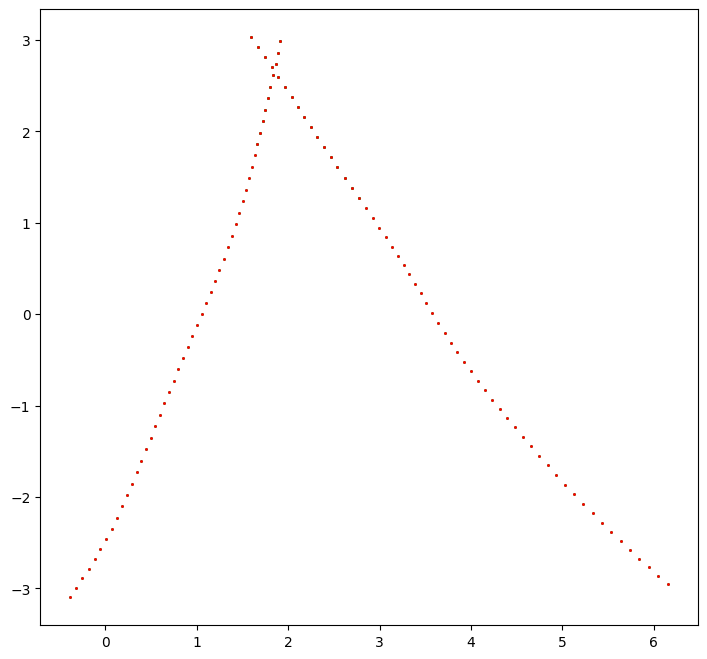

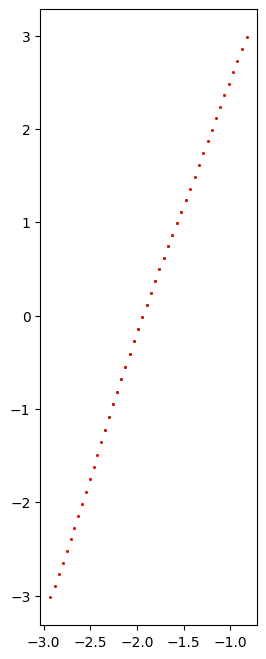

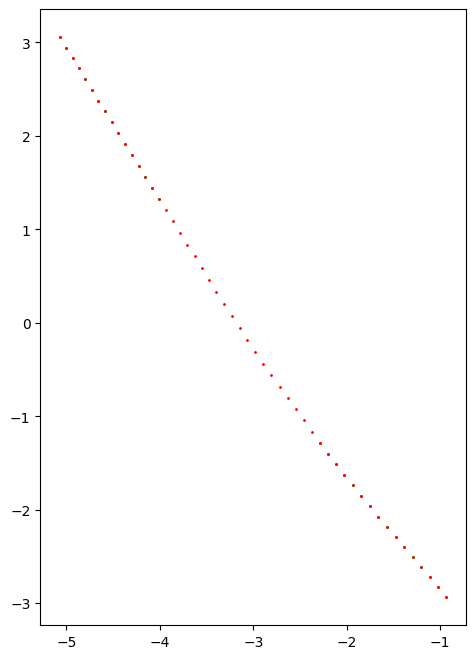

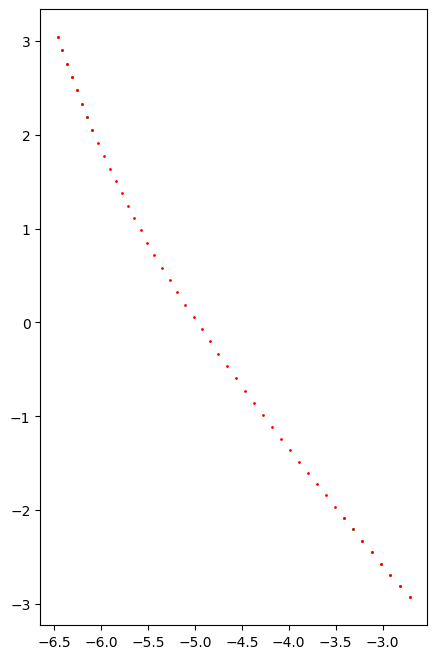

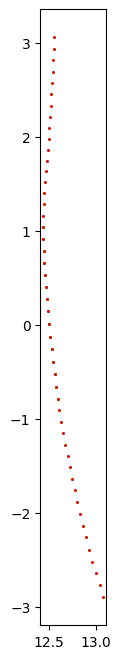

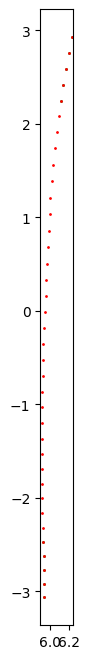

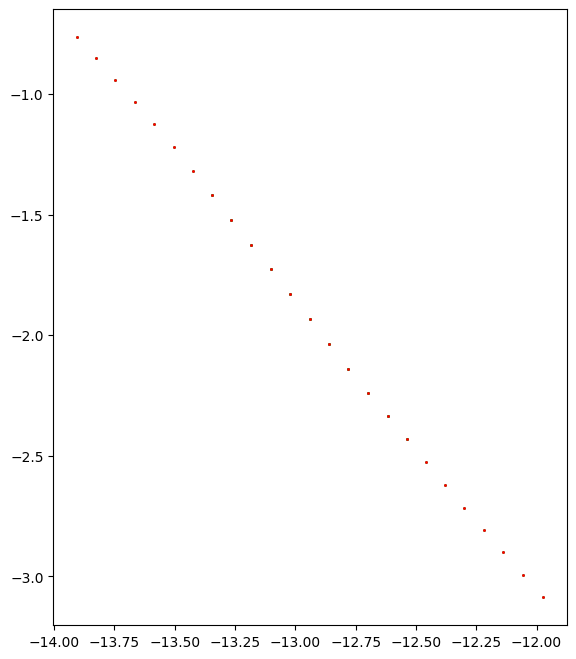

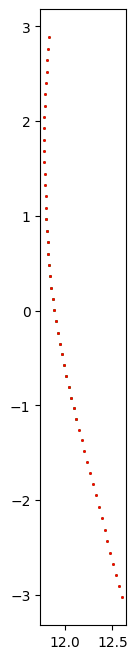

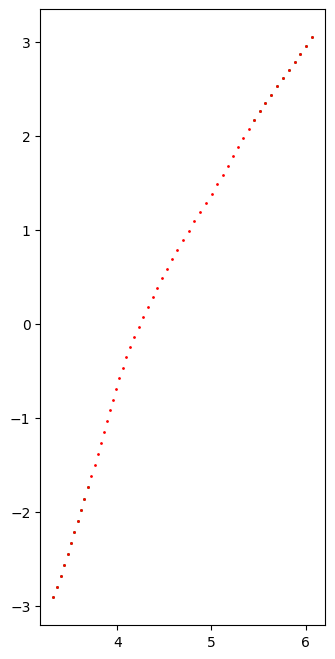

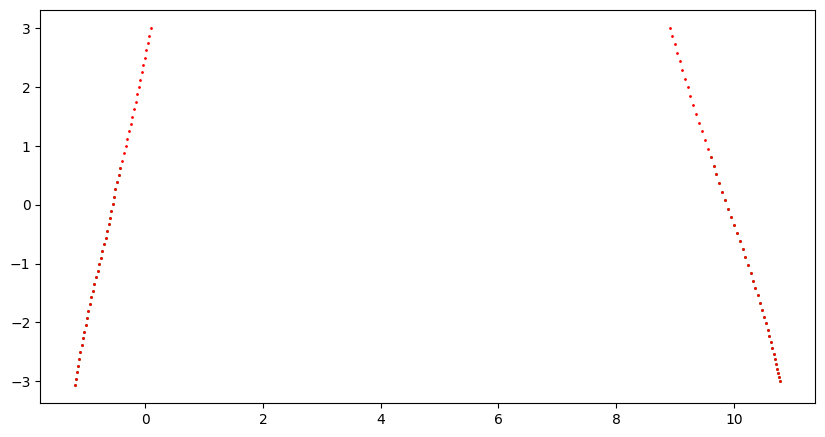

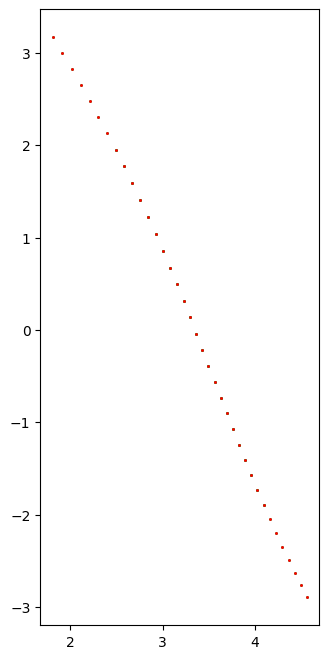

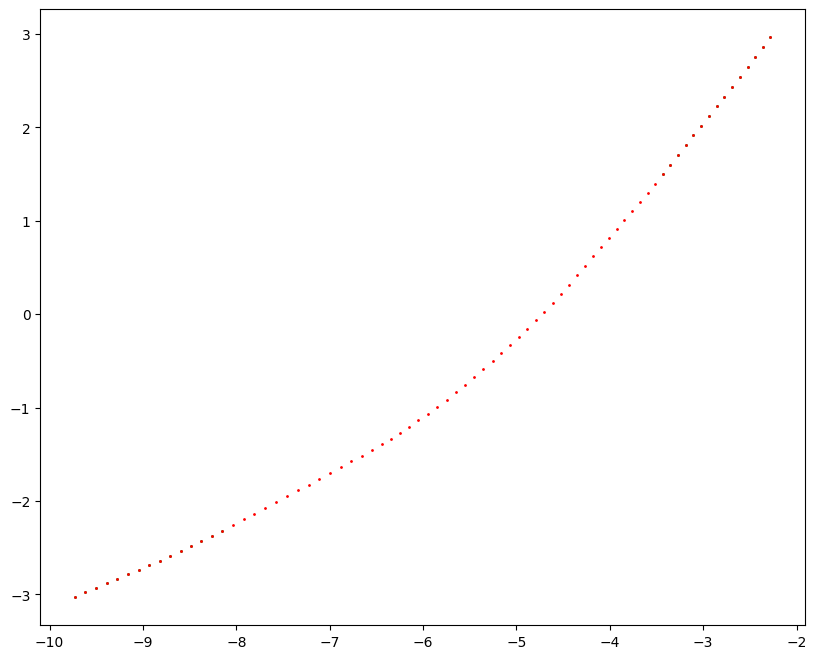

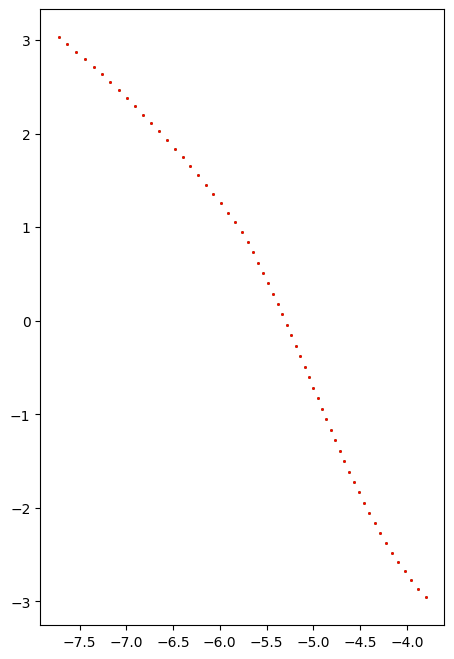

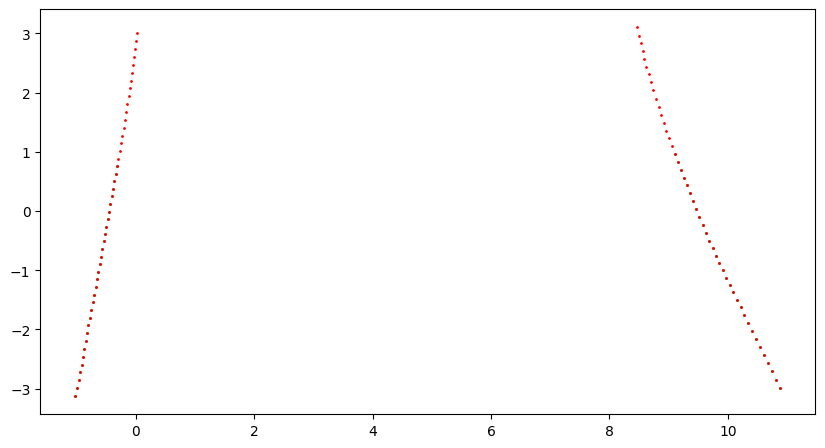

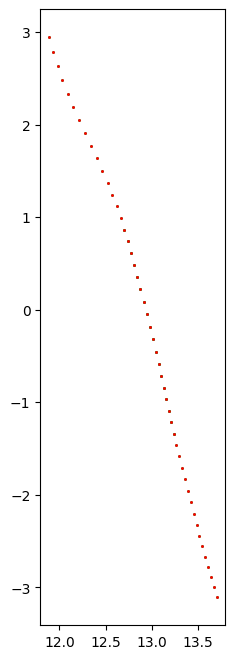

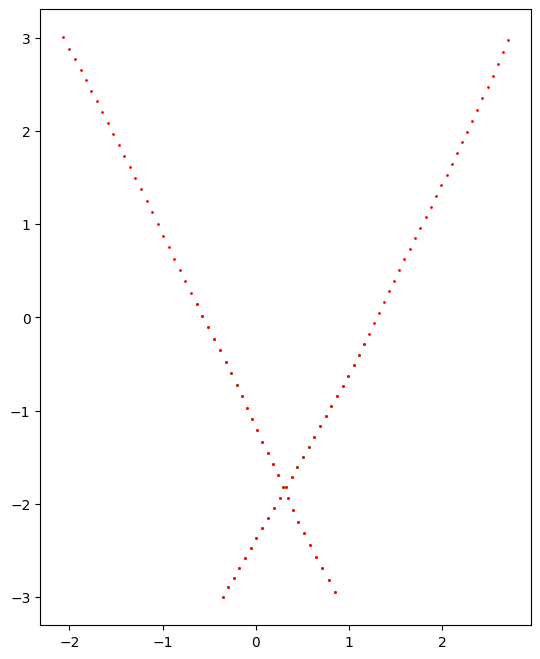

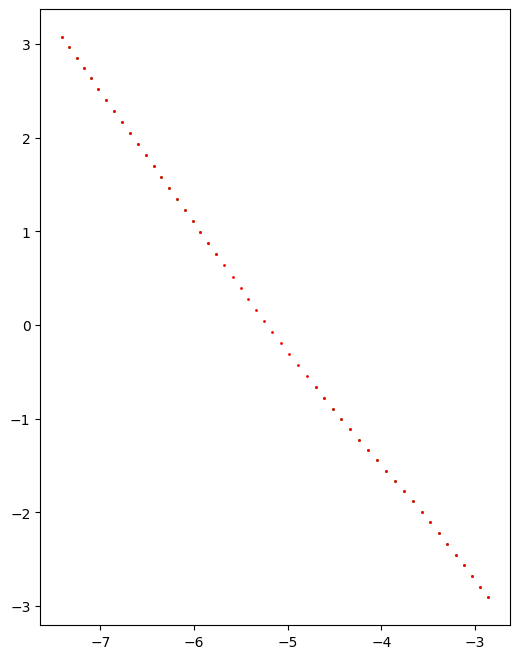

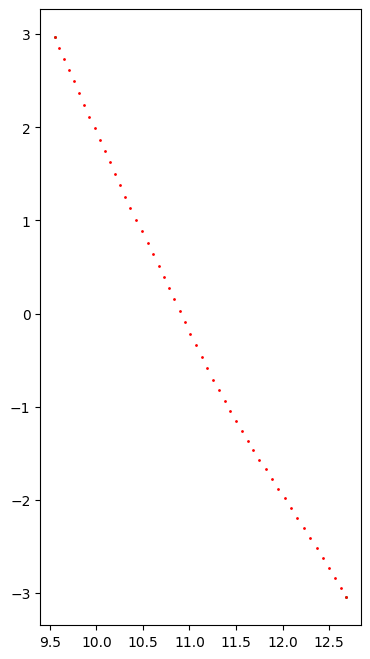

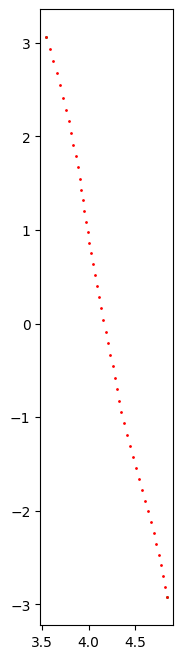

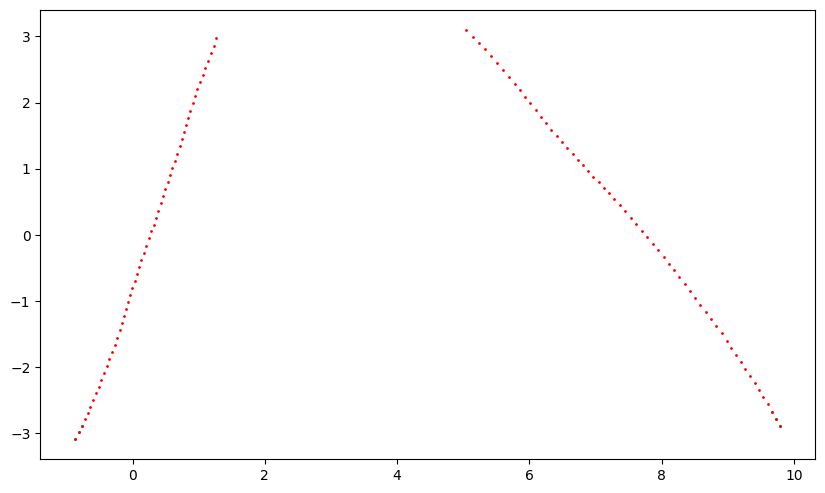

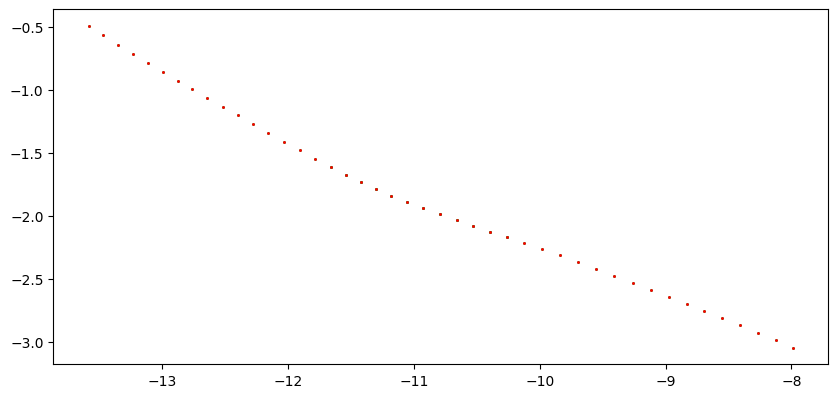

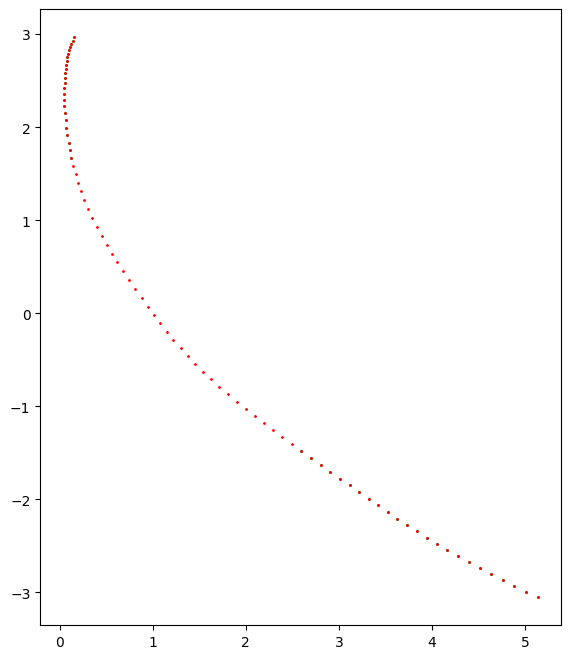

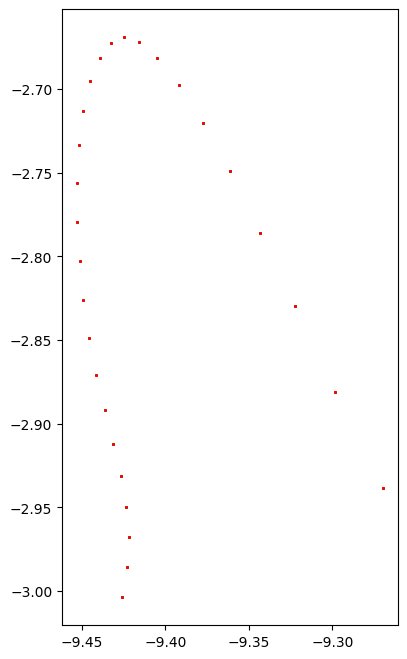

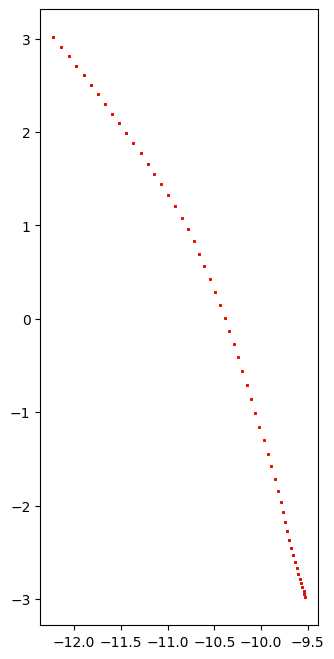

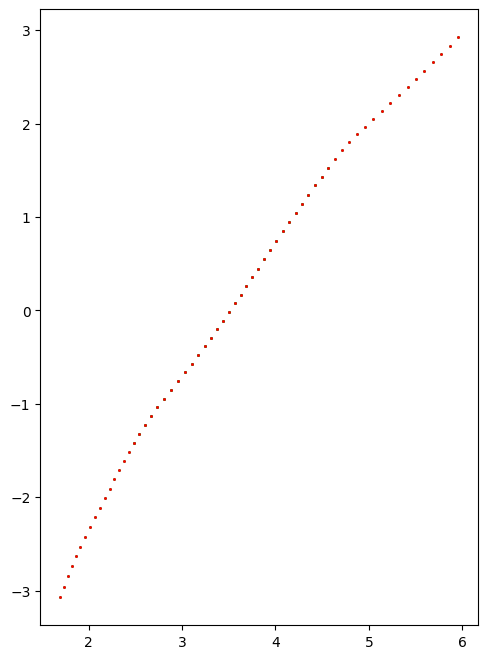

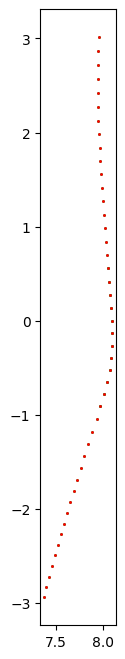

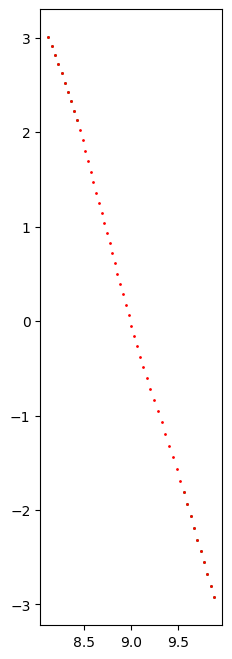

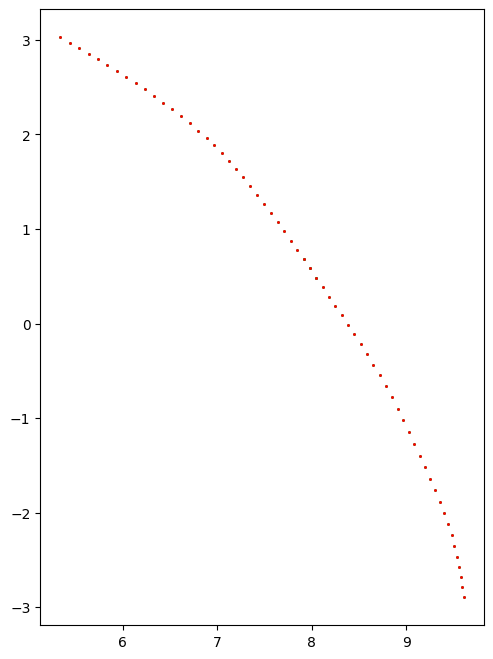

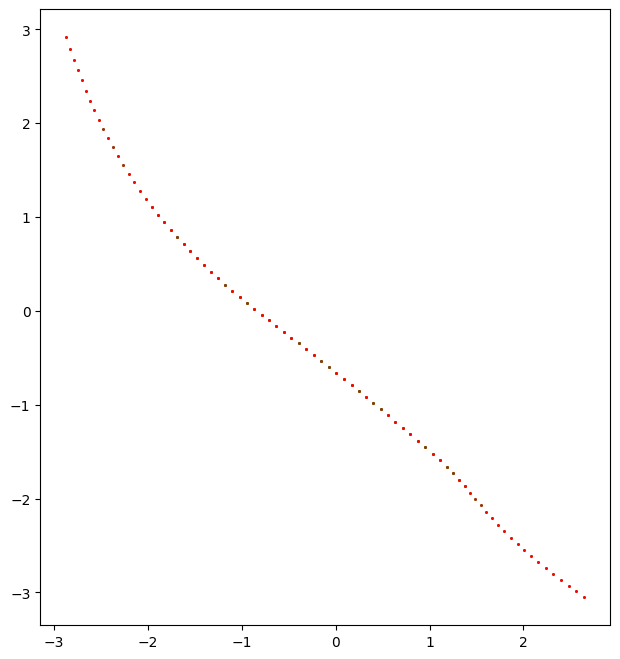

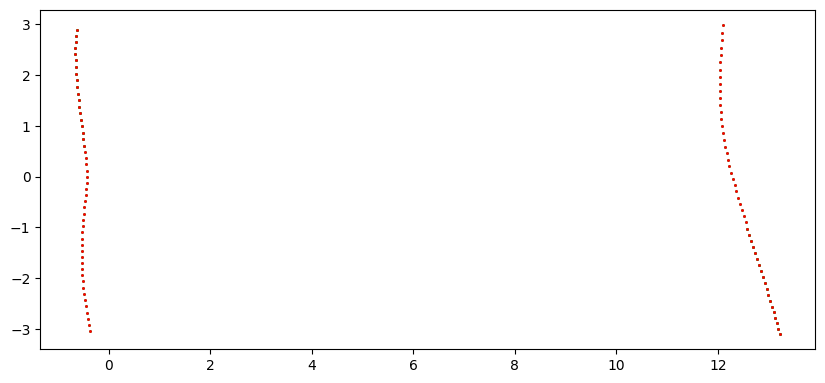

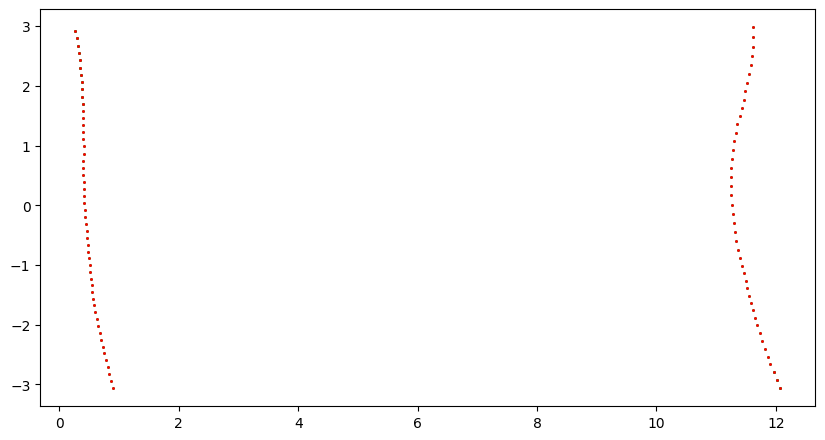

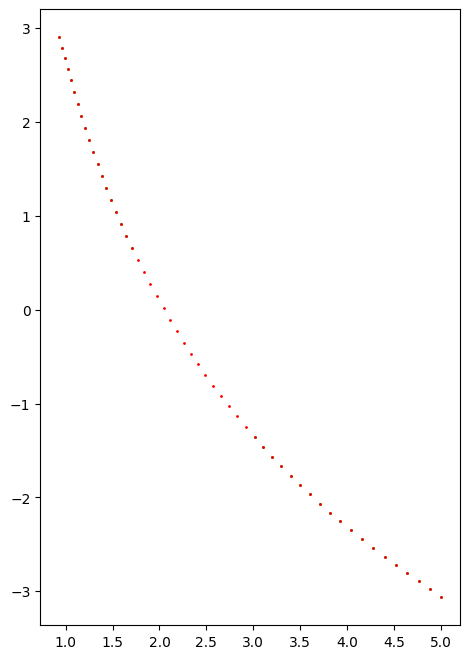

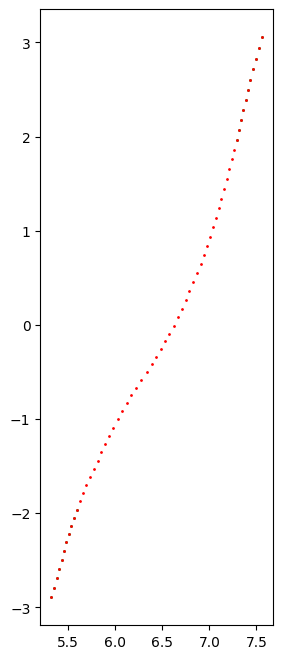

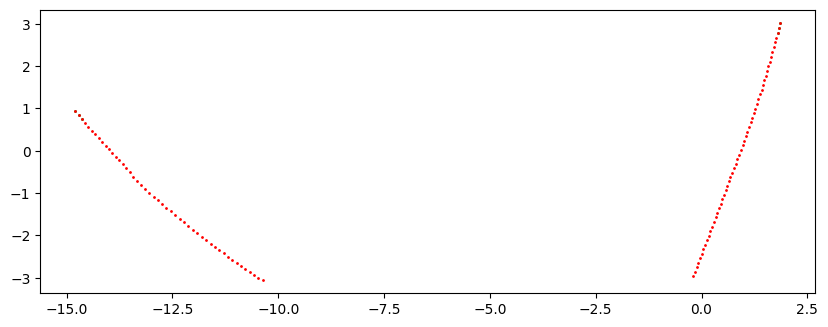

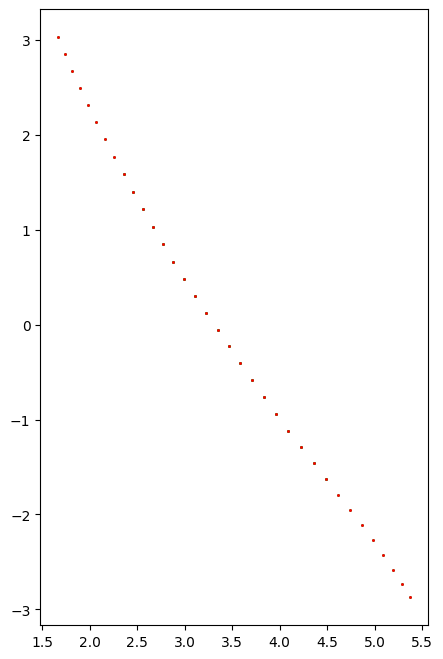

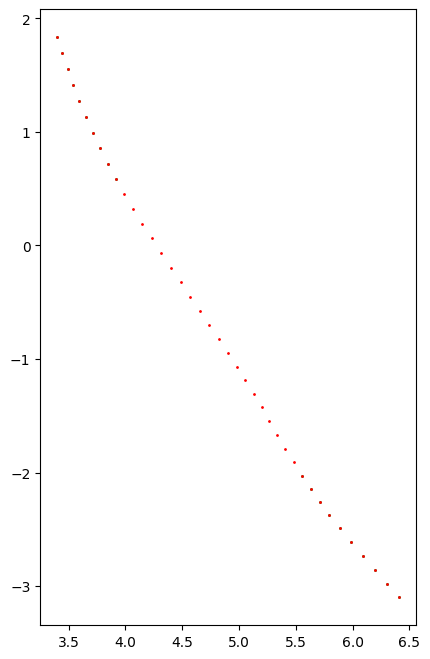

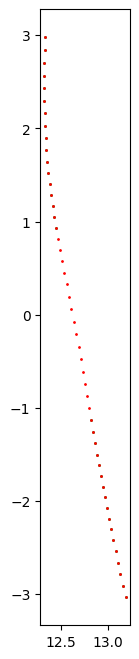

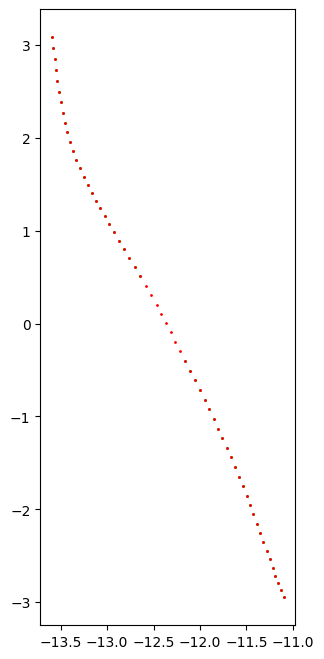

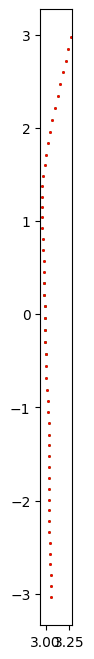

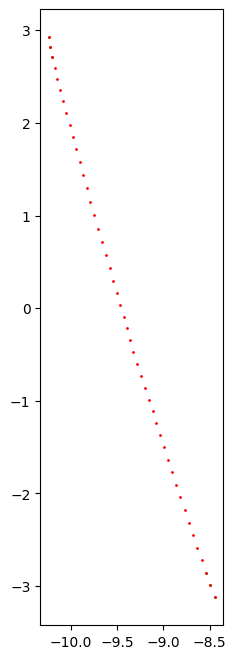

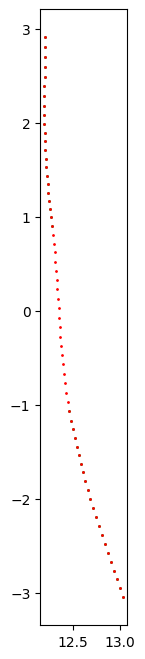

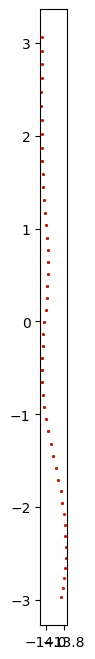

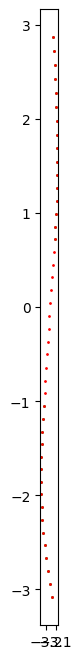

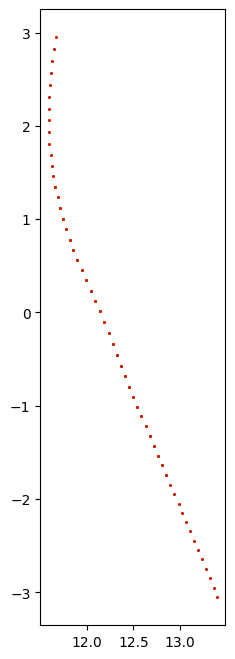

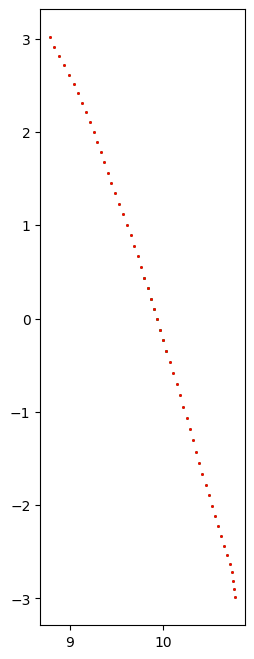

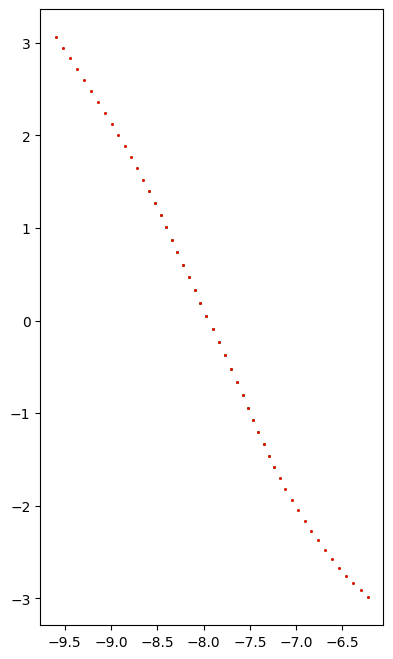

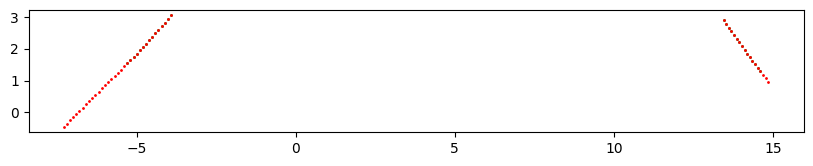

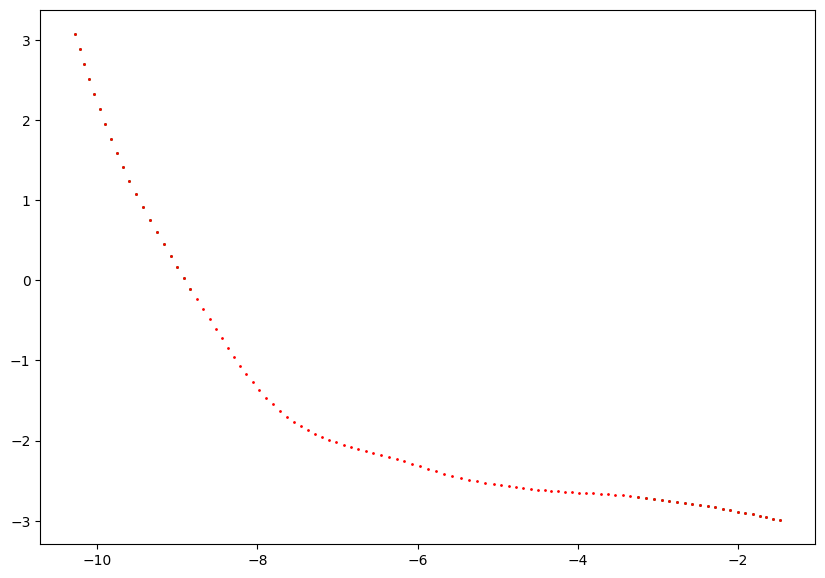

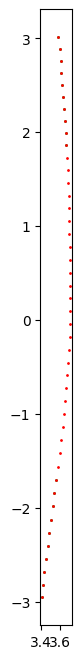

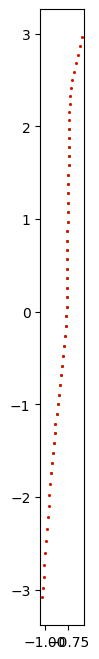

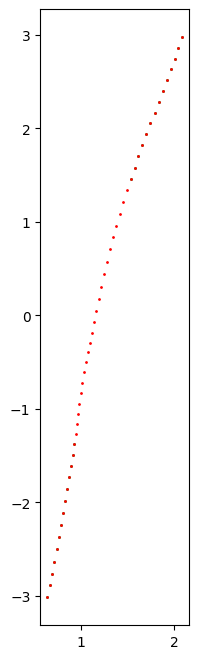

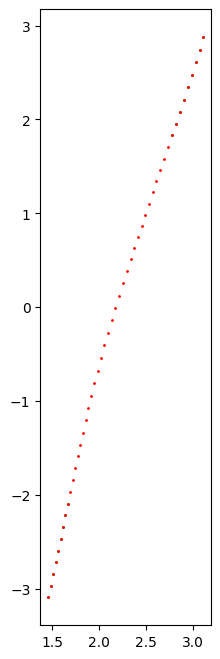

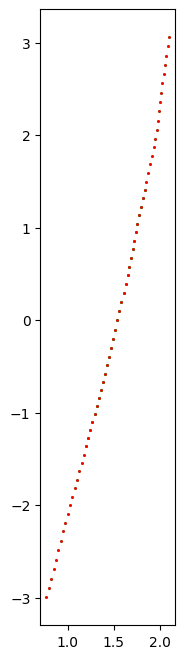

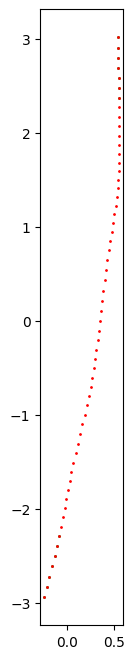

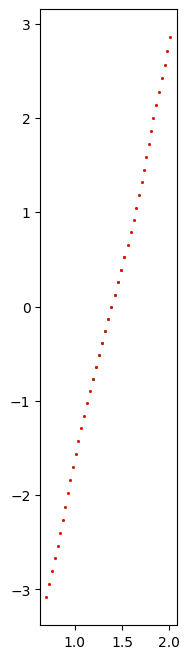

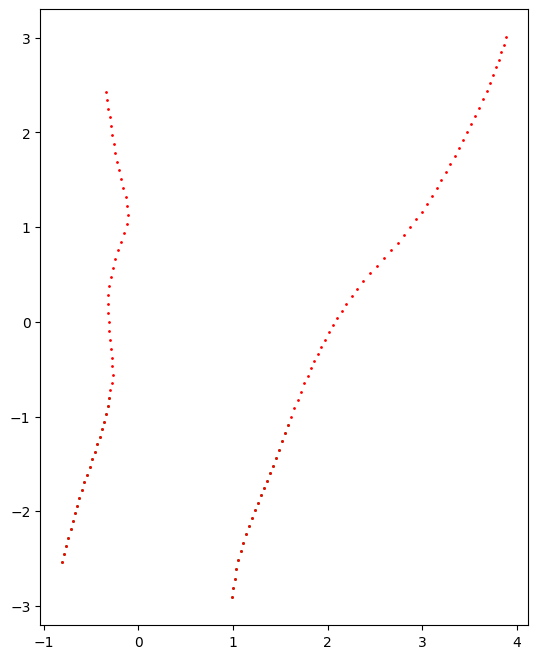

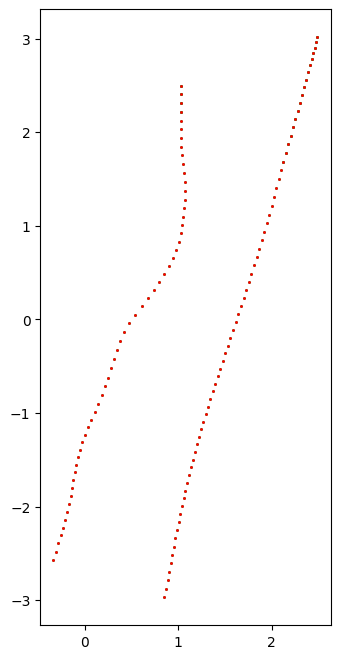

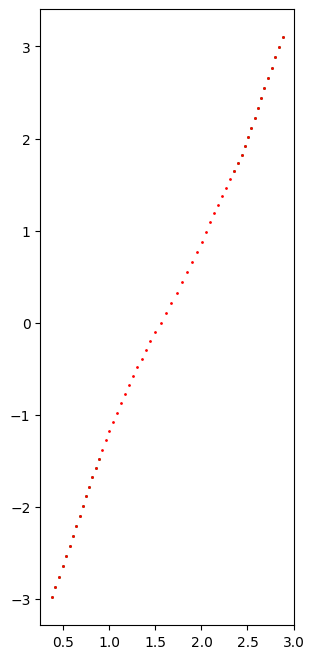

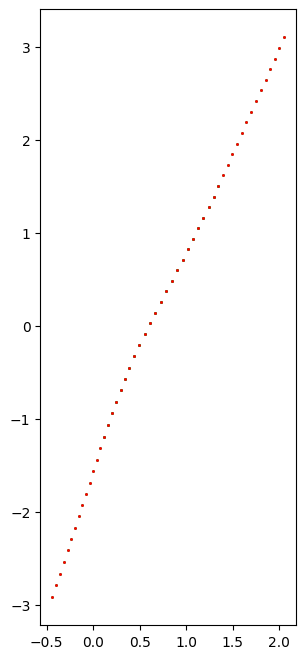

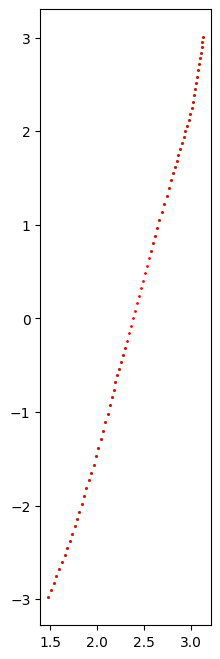

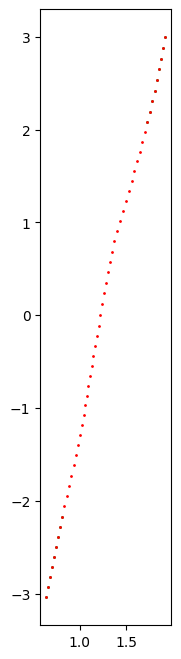

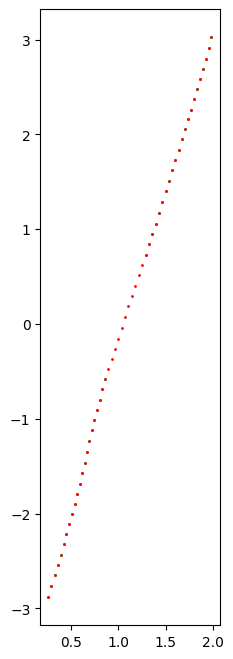

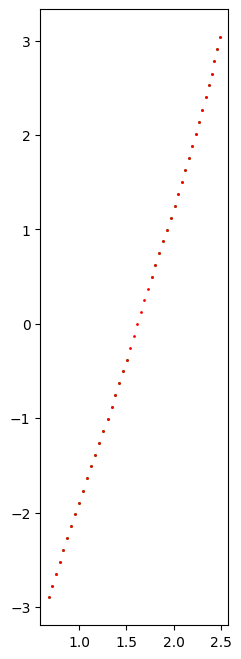

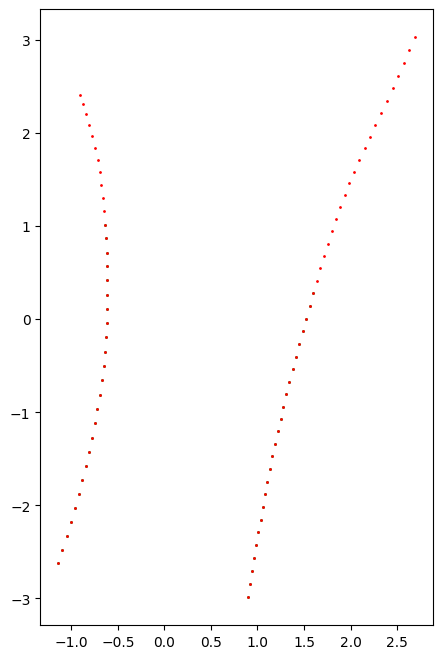

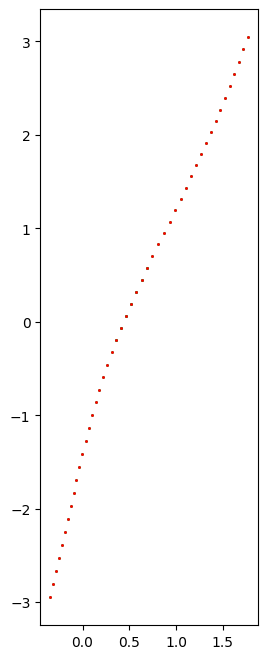

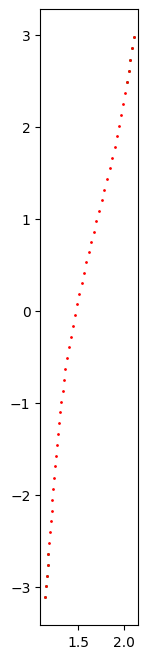

KeyboardInterrupt: 

In [177]:
import matplotlib.pyplot as plt



for track_id in complete_trajectories.keys():
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot()
    plt.scatter(incomplete_trajectories[track_id][:, 0], incomplete_trajectories[track_id][:, 1], color = "green", s=1)
    plt.scatter(complete_trajectories[track_id][:, 0], complete_trajectories[track_id][:, 1], color = "red", s=1)
    ax.set_aspect('equal', adjustable='box')
    plt.show()

In [167]:
complete_trajectories['32138']

tensor([[-0.3594, -2.9867],
        [-0.4377, -2.8560],
        [-0.5155, -2.7204],
        [-0.5917, -2.5798],
        [-0.6661, -2.4368],
        [-0.7380, -2.2922],
        [-0.8079, -2.1460],
        [-0.8760, -1.9977],
        [-0.9425, -1.8479],
        [-1.0065, -1.6981],
        [-1.0693, -1.5497],
        [-1.1305, -1.4031],
        [-1.1899, -1.2574],
        [-1.2487, -1.1125],
        [-1.3057, -0.9692],
        [-1.3609, -0.8274],
        [-1.4148, -0.6860],
        [-1.4682, -0.5446],
        [-1.5213, -0.4032],
        [-1.5733, -0.2628],
        [-1.6240, -0.1245],
        [-1.6739,  0.0123],
        [-1.7247,  0.1443],
        [-1.7752,  0.2751],
        [-1.8255,  0.4045],
        [-1.8749,  0.5323],
        [-1.9234,  0.6587],
        [-1.9718,  0.7847],
        [-2.0211,  0.9114],
        [-2.0714,  1.0385],
        [-2.1220,  1.1645],
        [-2.1732,  1.2895],
        [-2.2245,  1.4142],
        [-2.2768,  1.5395],
        [-2.3302,  1.6650],
        [-2.3843,  1